# Table of Contents

1. [Import stuff](#import_everything)
2. [Set whether these analyses are done for this analysis or not](#set_whether_these_analyses_are_done_for_this_analysis_or_not)
3. [Load data](#os.path.exists_checkpoint_fig_dir_load_data)
    1. [Set values for indexing](#Set_some_values_for_indexing_etc)
    2. [Rearranging data](#Rearranging_data)
4. [Start Analyses](#Start_Analyses)
5. [Learning Accuracy (SSE ) over time](#Learning_Accuracy_SSE_over_time)
    1. [Print checkpoint](#Checkpoint_0:_istheoutputoutputshowncorrectlythroughoutthelearningtask)
    2. [Visualize the output layer at each epoch](#Visualizetheoutputlayerateachepoch)
6. [Correlation Analysis](#Correlation_AnalysisFirstsetupcorrelationmatricesforfinalepochineachtask)
    1. [Plot Within Pair Correlation Over Time](#Plot_Within_Pair_Correlation_Over_Time)
    2. [Is the low/med/high within pair correlation in the right order in the output layer?](#is_the_low/med/high_within_pair_correlation_in_the_right_order_in_the_output_layer?)
    3. [Is the low/med/high within pair correlation in the right order in the hidden layer?](#is_the_low/med/high_within_pair_correlation_in_the_right_order_in_the_hidden_layer?)
    4. [Before vs After correlation](#before_vs_after_correlation)
    5. [MDS](#MDS)
7. [Plot # of shared units in hidden layer](#Plot_#_shared_units_in_hidden_layer)
8. [Difference score](#within-pair_correlation_minus_across-pair_correlation._Done_in_the_hidden_layer._)
9. [Center of mass](#CENTER_OF_MASS)
10. [Analyze Scene Layer in Association Task](#Scene_Association_Task)
11. [Analyze Pop Up Over Time](#Analyze_Pop_Up_Over_Time)
    1. [Define functions to plot cycles](#Define_functions_to_plot_cycles)
    2. [Checkpoint for scene layer pop up](#checkpoint_for_scene_layer_pop_up.)
    3. [Output Layer: Pop Up](#Output_Layer:_Pop_Up)
    4. [Hidden Layer: Pop Up](#Hidden_Layer:_Pop_Up) 
        1. [Assign units by initial activation](#First,_Assign_units_by_initial_activation)
        2. [How many units in each category](#How_Many_in_each_category)
        3. [Plot the hidden layer pop up](#Plot_the_hidden_layer_pop_up)
        4. [Hidden Layer Pop Up over cycles PROPORTIONALLY](#Hidden_Layer_Pop_Up_over_cycles_PROPORTIONALLY)

12. [XCAL](#XCAL)
    1. [Some necessary setup for AvgSLrn](#XCAL)
    2. [Plot the AvgSLrn in each layer for target, competitor, and shared units in first epoch of Output Recall Task](#Plot_the_AvgSLrn_in_each_layer_for_target,_competitor,_and_shared_units_in_first_epoch_of_Color_Recall_Task)
    3. [Checkpoint for avgSLrn](#Checkpoint_for_avgSLrn)
    4. [Calculate NMPH Learning curve](#calc NMPH curve)
    4. [Print out param sheet for each projection type to easily paste into output_diff.go](#Print_out_param_sheet_for_each_projection_type_to_easily_paste_into_output_diff.go)
    5. [Plot scatter plot of DWt vs. AvgSLrn coproducts](#plot_scatter_plot_DWt_vs_AvgSLrn_coproducts)
13. [Add necessary checkpoint info](#Add_necessary_checkpoint_info)
14. [Save](#Save)



## Imports
<a id='import_everything'></a>

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from matplotlib.backends.backend_pdf import PdfPages
import os as os
import sys as sys
from collections import defaultdict
from sklearn.manifold import MDS
from matplotlib.lines import Line2D
from IPython.display import display, Image

import scipy.stats as stats
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# from statsmodels.stats.multicomp import MultiComparison
import traceback
import pprint
import cProfile, pstats, io
codeprofiler = cProfile.Profile()

pp = pprint.PrettyPrinter(indent=4)

idx = pd.IndexSlice

sns.set_style(style='white')
pd.set_option('display.max_columns', 30)


In [2]:
print('Number of arguments:', len(sys.argv), 'arguments.')
print('Argument List:', str(sys.argv))
print('---')
from_cmdLine = sys.argv[-1]
print(from_cmdLine)

print('---')


Number of arguments: 3 arguments.
Argument List: ['/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/ipykernel_launcher.py', '-f', '/Users/alng/Library/Jupyter/runtime/kernel-233ca365-ab32-471a-aa83-74bb51bafe5b.json']
---
/Users/alng/Library/Jupyter/runtime/kernel-233ca365-ab32-471a-aa83-74bb51bafe5b.json
---


In [3]:
if from_cmdLine == 'cmd' :
    data_file = sys.argv[-2]
    print('using command line to set data')
    dataDir = data_file + '/'
else :
    print('using script to set data')

    #Set the date of the data we want to look at:

    data_file = '2021-06-24-22-50-48' #2 runs
#     data_file = '2021-05-31-16-41-55' #same trial, 20 runs
#     data_file = '2021-05-31-16-46-29' #different trial, 20 runs

    data_file = '2021-08-07-18-15-15'
#     data_file = 'test_same_diff/different/'

    data_file = '2021-10-25-11-36-57' # blocked, strong = .6
    data_file = '2021-10-25-13-17-08' #interleaved
    
    
#     data_file = '2021_10_25_int_blocked/interleaved' # interleaved after osc fix
    data_file = '2021_10_25_int_blocked/blocked' # blocked, strong = .6 (after osc fix)
    data_file = '2022-02-02-16-49-35'
    dataDir = 'data/' + data_file + '/'
#     dataDir = data_file


using script to set data


In [4]:
dataDir

'data/2022-02-02-16-49-35/'

### set whether these analyses are done for this analysis or not
<a id='set_whether_these_analyses_are_done_for_this_analysis_or_not'></a>

In [5]:
test_trial_done = 1
train_trial_done = 1
test_cycle_done = 0
train_cycle_done = 0

#Do you want this code to spit out a good NMPH curve based on the activity? 
#For regular analyses, that code chunk should get skipped.
calculate_learning_curve = 0



# Load Data
<a id='os.path.exists_checkpoint_fig_dir_load_data'></a>

In [6]:

figDir = dataDir + 'fig/'
checkpoint_fig_dir = figDir + 'checkpoints/'
results_fig_dir = figDir + 'results/'
eps_dir = results_fig_dir + 'eps_files/'

if not os.path.exists(figDir) :
    os.mkdir(figDir)
    
if not os.path.exists(results_fig_dir) :
    os.mkdir(results_fig_dir)
    
if not os.path.exists(checkpoint_fig_dir) :
    os.mkdir(checkpoint_fig_dir)

if not os.path.exists(eps_dir) :
    os.mkdir(eps_dir)
if not os.path.exists(checkpoint_fig_dir + 'cycle_plots/') :
    os.mkdir(checkpoint_fig_dir + 'cycle_plots/')
    
    

In [7]:
# data_run = pd.read_csv(dataDir + 'output_diff_Base_run.csv', sep = '\t')
# print('max run: ' + str(data_run.iloc[-1]['|Run']))

# data_run.iloc[:,:]

In [8]:
# data_run["#Seed"].to_numpy().std()

In [9]:
codeprofiler.enable()

In [10]:
data_epc = pd.read_csv(dataDir + 'schlichting_Base_epc.csv', sep = '\t')
# data_epc

In [11]:
if (test_trial_done == 1) :
    print('loading test trial data')
    
    data_test = pd.read_csv(dataDir + 'schlichting_Base_tsttrl.csv', sep = '\t')
    data_test = data_test[data_test['|Run'] != '|Run'] ## because of error where header line is repeated. remove that one lne
    assert set(data_test['$TrialName']) == {'med1', 'med2'}, "Trial name must be either med1 or med2"
    print('done')
    
data_test[(data_test["|Epoch"] <1)]

loading test trial data
done


,|Run,|Epoch,$CurrentTask,$CurrentTest,|Trial,$TrialName,#Scene_Err,#Scene_SSE,#Scene_AvgSSE,#Scene_CosDiff,#Category_Err,#Category_SSE,#Category_AvgSSE,#Category_CosDiff,#Output_Err,...,"#OutActP[2:0,35]","#OutActP[2:0,36]","#OutActP[2:0,37]","#OutActP[2:0,38]","#OutActP[2:0,39]","#OutActP[2:0,40]","#OutActP[2:0,41]","#OutActP[2:0,42]","#OutActP[2:0,43]","#OutActP[2:0,44]","#OutActP[2:0,45]","#OutActP[2:0,46]","#OutActP[2:0,47]","#OutActP[2:0,48]","#OutActP[2:0,49]"
0,0,-1,TaskColorWOOsc,TestColorAll,0,med1,0,0,0,0.9911,0,0,0,1,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45
1,0,-1,TaskColorWOOsc,TestColorAll,1,med2,0,0,0,1.0000,0,0,0,1,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45
2,0,0,TaskColorRecall,TestColorAll,0,med1,0,0,0,1.0000,0,0,0,1,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45
3,0,0,TaskColorRecall,TestColorAll,1,med2,0,0,0,1.0000,0,0,0,1,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45
42,1,-1,TaskColorWOOsc,TestColorAll,0,med1,0,0,0,0.9998,0,0,0,1,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,18,0,TaskColorRecall,TestColorAll,1,med2,0,0,0,1.0000,0,0,0,1,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45
798,19,-1,TaskColorWOOsc,TestColorAll,0,med1,0,0,0,1.0000,0,0,0,1,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45
799,19,-1,TaskColorWOOsc,TestColorAll,1,med2,0,0,0,1.0000,0,0,0,1,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45
800,19,0,TaskColorRecall,TestColorAll,0,med1,0,0,0,1.0000,0,0,0,1,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45


In [12]:
def fill_dummy_stim(data_test, task_type) :
    
#     remaining_columns = [c for c in data_test.columns if c not in ['|Run', '|Epoch', '$CurrentTask', '$CurrentTest', '$TrialName']]
#     fake_data = data_test[data_test['$TrialName'] == 'med1'].reset_index(drop = True)

#     dummy_df = pd.DataFrame()
#     for loc in range(max(fake_data.index) + 1) : 
#         dummy_trial = 2
#         for trialType in ['low1','low2', 'high1', 'high2'] :
#             temp = fake_data.loc[[loc]]
#             temp[remaining_columns] = 0
#             temp['$TrialName'] = trialType
#             temp['|Trial'] = dummy_trial
#             dummy_trial += 1
#             dummy_df = dummy_df.append(temp)

#     dummy_df
    
#     data_test = data_test.append(dummy_df)
# #     return(data_test)


    if task_type == 'test' :
        first_columns = [c for c in data_test.columns if c in ['|Run', '|Epoch', '$CurrentTask', '$CurrentTest']]
        remaining_columns = [c for c in data_test.columns if c not in ['|Run', '|Epoch', '$CurrentTask', '$CurrentTest', '|Trial', '$TrialName']]

    elif task_type == 'train':
        first_columns = [c for c in data_test.columns if c in ['|Run', '|Epoch', '$CurrentTask', ]]
        remaining_columns = [c for c in data_test.columns if c not in ['|Run', '|Epoch', '$CurrentTask', '|Trial', '$TrialName']]

    numeric_columns = [c for c in remaining_columns if c not in ['|Run', '|Epoch', '$CurrentTask', '$CurrentTest', '$TrialName']]
    ### DF 1:
    #make a df with the columns that we want to be not-zero for our dummy values
    df_1 = data_test[first_columns].drop_duplicates()

    #add a dummy column so that we can do an outer merge later
    df_1['dummy'] = 1
    
    ### DF2 :
    #make a second df with just the trial number, trial names, and all the columns that will be zero
    df_2 = pd.DataFrame(columns = remaining_columns)
    
    #add the rows taht are zeroed out for each of our fake stimuli
    df_2 = df_2.append(pd.Series(0, index=df_2.columns), ignore_index=True)
    df_2 = df_2.append(pd.Series(0, index=df_2.columns), ignore_index=True)
    df_2 = df_2.append(pd.Series(0, index=df_2.columns), ignore_index=True)
    df_2 = df_2.append(pd.Series(0, index=df_2.columns), ignore_index=True)


    #add in a column with the values of each stim. This df now has 4 rows (one for each of our fake stim)
    df_2.insert(0, "$TrialName", ['low1','low2','high1','high2'], False) 
    df_2.insert(0, "|Trial", [2,3,4,5], False) 
    
    #add a dummy column so that we can do an outer merge
    df_2['dummy'] = 1
    df_2[numeric_columns] = df_2[numeric_columns].apply(pd.to_numeric)
    #do an outer merge of the two dfs. This is everything we need for the fake stim.
    fake_stim = pd.merge(df_1, df_2, on = 'dummy', how = 'outer')
    fake_stim = fake_stim.drop(['dummy'], axis = 1)


    #set everything to be numeric because for some reason it sets it not as numeric:
#     fake_stim[numeric_columns] = fake_stim[numeric_columns].apply(pd.to_numeric)

    #append to orginal dataframe. Sort.
    data_test = data_test.append(fake_stim)
    data_test = data_test.sort_values(by = ['|Run', '|Epoch', '|Trial']).reset_index(drop = True)

    return data_test


In [13]:
if 'high1' in data_test['$TrialName'].unique() :
        ;
else :
    print('LOOKS LIKE NOT ALL THE VARIABLES ARE HERE. MAKING DUMMY STIMULI')

    data_test = fill_dummy_stim(data_test, 'test')



LOOKS LIKE NOT ALL THE VARIABLES ARE HERE. MAKING DUMMY STIMULI


In [14]:
data_test

,|Run,|Epoch,$CurrentTask,$CurrentTest,|Trial,$TrialName,#Scene_Err,#Scene_SSE,#Scene_AvgSSE,#Scene_CosDiff,#Category_Err,#Category_SSE,#Category_AvgSSE,#Category_CosDiff,#Output_Err,...,"#OutActP[2:0,35]","#OutActP[2:0,36]","#OutActP[2:0,37]","#OutActP[2:0,38]","#OutActP[2:0,39]","#OutActP[2:0,40]","#OutActP[2:0,41]","#OutActP[2:0,42]","#OutActP[2:0,43]","#OutActP[2:0,44]","#OutActP[2:0,45]","#OutActP[2:0,46]","#OutActP[2:0,47]","#OutActP[2:0,48]","#OutActP[2:0,49]"
0,0,-1,TaskColorWOOsc,TestColorAll,0,med1,0,0,0,0.9911,0,0,0,1,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45
1,0,-1,TaskColorWOOsc,TestColorAll,1,med2,0,0,0,1.0000,0,0,0,1,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45
2,0,-1,TaskColorWOOsc,TestColorAll,2,low1,0,0,0,0.0000,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0,-1,TaskColorWOOsc,TestColorAll,3,low2,0,0,0,0.0000,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0,-1,TaskColorWOOsc,TestColorAll,4,high1,0,0,0,0.0000,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,19,19,TaskColorRecall,TestColorAll,1,med2,0,0,0,1.0000,0,0,0,1,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45
2516,19,19,TaskColorRecall,TestColorAll,2,low1,0,0,0,0.0000,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2517,19,19,TaskColorRecall,TestColorAll,3,low2,0,0,0,0.0000,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2518,19,19,TaskColorRecall,TestColorAll,4,high1,0,0,0,0.0000,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [15]:
if (train_trial_done == 1) :
    print('loading train trial data')
    
    data_train = pd.read_csv(dataDir + 'schlichting_Base_trntrl.csv', sep = '\t')
    data_train = data_train[data_train['|Run'] != '|Run'] ## because of error where header line is repeated. remove that one lne

    print('done')
    
data_train

loading train trial data
done


,|Run,|Epoch,$CurrentTask,|Trial,$TrialName,#Scene_Err,#Scene_SSE,#Scene_AvgSSE,#Scene_CosDiff,#Category_Err,#Category_SSE,#Category_AvgSSE,#Category_CosDiff,#Output_Err,#Output_SSE,...,"#OutActP[2:0,35]","#OutActP[2:0,36]","#OutActP[2:0,37]","#OutActP[2:0,38]","#OutActP[2:0,39]","#OutActP[2:0,40]","#OutActP[2:0,41]","#OutActP[2:0,42]","#OutActP[2:0,43]","#OutActP[2:0,44]","#OutActP[2:0,45]","#OutActP[2:0,46]","#OutActP[2:0,47]","#OutActP[2:0,48]","#OutActP[2:0,49]"
0,0,0,TaskColorRecall,0,med2,0,0,0,0.9593,0,0,0,1,0,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45
1,0,1,TaskColorRecall,1,med2,0,0,0,1.0000,0,0,0,1,0,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45
2,0,2,TaskColorRecall,1,med2,0,0,0,0.9999,0,0,0,1,0,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45
3,0,3,TaskColorRecall,1,med2,0,0,0,1.0000,0,0,0,1,0,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45
4,0,4,TaskColorRecall,0,med2,0,0,0,1.0000,0,0,0,1,0,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,19,15,TaskColorRecall,1,med2,0,0,0,0.9990,0,0,0,1,0,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45
396,19,16,TaskColorRecall,0,med2,0,0,0,0.9990,0,0,0,1,0,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45
397,19,17,TaskColorRecall,1,med2,0,0,0,0.9990,0,0,0,1,0,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45
398,19,18,TaskColorRecall,0,med2,0,0,0,0.9990,0,0,0,1,0,0,...,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45,1.401000e-45


In [16]:
if 'high1' in data_train['$TrialName'].unique() :
        ;
else :
    print('LOOKS LIKE NOT ALL THE VARIABLES ARE HERE. MAKING DUMMY STIMULI')

    data_train = fill_dummy_stim(data_train, 'train')


LOOKS LIKE NOT ALL THE VARIABLES ARE HERE. MAKING DUMMY STIMULI


In [17]:
if (train_cycle_done == 1) :
    print('loading train cycle data')
    data_trn_cyc = pd.read_csv(dataDir + 'schlichting_Base_trncyc.csv', sep = '\t')
    data_trn_cyc.head(200)
    print('done')


In [18]:
if (test_cycle_done == 1) : 
    print('loading test cycle data')
    data_tst_cyc = pd.read_csv(dataDir +'schlichting_Base_tstcyc.csv', sep = '\t')
    data_tst_cyc.head(200)
    print('done')

In [19]:
codeprofiler.disable()


In [20]:
data_train['#OutActM[2:0,0]<2:1,50>']

0       1.401000e-45
1       0.000000e+00
2       0.000000e+00
3       0.000000e+00
4       0.000000e+00
            ...     
1995    1.401000e-45
1996    0.000000e+00
1997    0.000000e+00
1998    0.000000e+00
1999    0.000000e+00
Name: #OutActM[2:0,0]<2:1,50>, Length: 2000, dtype: float64

#### Set some values for indexing etc
<a id='Set_some_values_for_indexing_etc'></a>

In [21]:
#set values for start and endpoints of output layer and hidden layer to use for indexing
numPairs = 3

scene_Start_AvgSLrn = '#SceneAvgSLrn[4:0,0,0,0]<4:2,1,1,3>'
scene_End_AvgSLrn = '#SceneAvgSLrn[4:1,0,0,2]'

outputM_Start = '#OutActM[2:0,0]<2:1,50>'
outputM_End = '#OutActM[2:0,49]'


sceneM_Start = '#SceneActM[4:0,0,0,0]<4:2,1,1,3>'
sceneM_End = '#SceneActM[4:1,0,0,2]'

output_Start = '#OutAct[2:0,0]<2:1,50>'
output_End = '#OutAct[2:0,49]'

output_Start_AvgS = '#OutAvgS[2:0,0]<2:1,50>'
output_End_AvgS = '#OutAvgS[2:0,49]'

output_Start_AvgM = '#OutAvgM[2:0,0]<2:1,50>'
output_End_AvgM = '#OutAvgM[2:0,49]'

output_Start_AvgSLrn = '#OutAvgSLrn[2:0,0]<2:1,50>'
output_End_AvgSLrn = '#OutAvgSLrn[2:0,49]'

filter_outM = [col for col in data_train if col.startswith('#OutActM[')]
filter_HiddM = [col for col in data_train if col.startswith('#HiddenActM[')]
filter_out_AvgSLrn = [col for col in data_train if col.startswith('#OutAvgSLrn[')]
filter_Hidden_AvgSLrn = [col for col in data_train if col.startswith('#HiddenAvgSLrn[')]
filter_outP = [col for col in data_train if col.startswith('#OutActP[')]
filter_HiddenP = [col for col in data_train if col.startswith('#HiddenActP[')]
if 'data_trn_cyc' in locals():
    filter_out = [col for col in data_trn_cyc if col.startswith('#OutAct[')]
    filter_scene = [col for col in data_trn_cyc if col.startswith('#SceneAct[')]


hidden_dimensions = 1

if hidden_dimensions == 1 :
    study_task_run = 0;
elif hidden_dimensions == 2 :
    study_task_run = 1;
    
if hidden_dimensions == 2 :
    
    hiddenM_Start = '#HiddenActM[2:0,0]<2:10,10>'    
    hiddenM_End = '#HiddenActM[2:9,9]'

    hidden_Start = '#HiddenAct[2:0,0]<2:10,10>'    
    hidden_End = '#HiddenAct[2:9,9]'

    hidden_Start_AvgL = '#HiddenAvgL[2:0,0]<2:10,10>'    
    hidden_End_AvgL = '#HiddenAvgL[2:9,9]'

    hidden_Start_AvgM = '#HiddenAvgM[2:0,0]<2:10,10>'    
    hidden_End_AvgM = '#HiddenAvgM[2:9,9]'

    hidden_Start_AvgS = '#HiddenAvgS[2:0,0]<2:10,10>'    
    hidden_End_AvgS = '#HiddenAvgS[2:9,9]'

    hidden_Start_AvgSLrn = '#HiddenAvgSLrn[2:0,0]<2:10,10>'    
    hidden_End_AvgSLrn = '#HiddenAvgSLrn[2:9,9]'
    
    
elif hidden_dimensions == 1 :
    
    hiddenM_Start = '#HiddenActM[2:0,0]<2:1,50>'  
    hiddenM_End = '#HiddenActM[2:0,49]'

    hidden_Start = '#HiddenAct[2:0,0]<2:1,50>'  
    hidden_End = '#HiddenAct[2:0,49]'

    hidden_Start_AvgL = '#HiddenAvgL[2:0,0]<2:1,50>'   
    hidden_End_AvgL = '#HiddenAvgL[2:0,49]'

    hidden_Start_AvgM = '#HiddenAvgM[2:0,0]<2:1,50>'    
    hidden_End_AvgM = '#HiddenAvgM[2:0,49]'

    hidden_Start_AvgS = '#HiddenAvgS[2:0,0]<2:1,50>'    
    hidden_End_AvgS = '#HiddenAvgS[2:0,49]'

    hidden_Start_AvgSLrn = '#HiddenAvgSLrn[2:0,0]<2:1,50>'  
    hidden_End_AvgSLrn = '#HiddenAvgSLrn[2:0,49]'



hidden_to_hidden_weights_Start = '#HiddentoHiddenWeights[1:0]<1:9900>'
hidden_to_hidden_weights_End = '#HiddentoHiddenWeights[1:9899]'

output_to_hidden_weights_Start = '#OutputtoHiddenWeights[1:0]<1:5000>'
output_to_hidden_weights_End = '#OutputtoHiddenWeights[1:4999]'

hidden_to_output_weights_Start = '#HiddentoOutputWeights[1:0]<1:5000>'
hidden_to_output_weights_End = '#HiddentoOutputWeights[1:4999]'

hidden_to_hidden_DWt_Start = '#HiddentoHiddenDWt[1:0]<1:9900>'
hidden_to_hidden_DWt_End = '#HiddentoHiddenDWt[1:9899]'

output_to_hidden_DWt_Start = '#OutputtoHiddenDWt[1:0]<1:5000>'
output_to_hidden_DWt_End = '#OutputtoHiddenDWt[1:4999]'

hidden_to_output_DWt_Start = '#HiddentoOutputDWt[1:0]<1:5000>'
hidden_to_output_DWt_End = '#HiddentoOutputDWt[1:4999]'

scene_to_hidden_DWt_Start = '#ScenetoHiddenDWt[1:0]<1:600>'
scene_to_hidden_DWt_End = '#ScenetoHiddenDWt[1:599]'

hidden_to_scene_DWt_Start = '#HiddentoSceneDWt[1:0]<1:600>'
hidden_to_scene_DWt_End = '#HiddentoSceneDWt[1:599]'

obj_Start = '#ObjAct[2:0,0]<2:1,3>'
obj_End = '#ObjAct[2:0,2]'

#hidden net input:
hidden_ge_start = '#HiddenGe[2:0,0]<2:10,10>'
hidden_ge_end = '#HiddenGe[2:9,9]'

if (numPairs == 2) :
    stim_names = ['small1', 'small2', 'small3', 'small4']
    
elif (numPairs == 3) :
    stim_names = ['low1','low2','med1', 'med2', 'high1','high2']
    
    
medium_only_analysis = True

if medium_only_analysis == True :
    stim_names = ['med1', 'med2']

if (numPairs == 2) :
    #post- pools:

    scene_Start = '#SceneAct[4:0,0,0,0]<4:2,1,1,2>'
    scene_End = '#SceneAct[4:1,0,0,1]'

    #scene net input:
    scene_ge_start = '#SceneGe[4:0,0,0,0]<4:2,1,1,2>'
    scene_ge_end = '#SceneGe[4:1,0,0,1]'

elif (numPairs==3) :
    scene_Start = '#SceneAct[4:0,0,0,0]<4:2,1,1,3>'
    scene_End = '#SceneAct[4:1,0,0,2]'

    #scene net input:
    scene_ge_start = '#SceneGe[4:0,0,0,0]<4:2,1,1,3>'
    scene_ge_end = '#SceneGe[4:1,0,0,2]'


#dictionary for scene layer to use for later analyses

if (numPairs == 2) :
    
    sceneKey = {'#SceneAct[4:0,0,0,0]<4:2,1,1,2>' : 'small2', '#SceneAct[4:0,0,0,1]' : 'small4', '#SceneAct[4:1,0,0,0]': 'small1', '#SceneAct[4:1,0,0,1]': 'small3'}
    sceneKey_ge = {'#SceneGe[4:0,0,0,0]<4:2,1,1,2>' : 'small2 Ge', '#SceneGe[4:0,0,0,1]' : 'small4 Ge', '#SceneGe[4:1,0,0,0]': 'small1 Ge', '#SceneGe[4:1,0,0,1]': 'small3 Ge'}

elif (numPairs ==3) :
    sceneKey = {'#SceneAct[4:0,0,0,0]<4:2,1,1,3>' : 'low2', '#SceneAct[4:0,0,0,1]' : 'med2', '#SceneAct[4:1,0,0,0]': 'low1', '#SceneAct[4:1,0,0,1]': 'med1', '#SceneAct[4:1,0,0,2]': 'high1', '#SceneAct[4:0,0,0,2]': 'high2'}
    sceneKey_ge = {'#SceneGe[4:0,0,0,0]<4:2,1,1,3>' : 'low2 Ge', '#SceneGe[4:0,0,0,1]' : 'med2 Ge', '#SceneGe[4:1,0,0,0]': 'low1 Ge', '#SceneGe[4:1,0,0,1]': 'med1 Ge', '#SceneGe[4:1,0,0,2]': 'high1 Ge', '#SceneGe[4:0,0,0,2]': 'high2 Ge'}
    sceneKeyM = {'#SceneActM[4:0,0,0,0]<4:2,1,1,3>' : 'low2_ActM', '#SceneActM[4:0,0,0,1]' : 'med2_ActM', '#SceneActM[4:1,0,0,0]': 'low1_ActM', '#SceneActM[4:1,0,0,1]': 'med1_ActM', '#SceneActM[4:1,0,0,2]': 'high1_ActM', '#SceneActM[4:0,0,0,2]': 'high2_ActM'}
    
sceneKey_AvgSLrn = {key.replace("Act", "AvgSLrn"): value for key, value in sceneKey.items()}

    
nepochs = max(data_test['|Epoch'])
nruns = max(data_test[data_test['|Epoch']==nepochs]['|Run']) # only get maximum run that reached the end. 

try: 
    epoch_end_ColorWOOsc = max(data_test[data_test['$CurrentTask'] == 'TaskColorWOOsc']['|Epoch'])
except:
    epoch_end_ColorWOOsc = 0
    print('could not find any ColorWOOSC trials. May want to check this out.')

# epoch_end_Scene = max(data_test[data_test['$CurrentTask'] == 'TaskSceneRecall']['|Epoch'])
# epoch_end_initial = max(epoch_end_ColorWOOsc,epoch_end_Scene)
epoch_end_initial = -1 # was epoch_end_ColorWOOsc

if (numPairs == 2) :
    scene_palette = {'small1' : (0.6, .3, .6), 
                       'small2' : (0.8, .5, .8), 
                       'small3' : (0.3, .5, .6),
                       'small4' : (0.5, .7, .8)}

    scene_palette_ge = {'small1 Ge' : (0.6, .3, .6), 
                       'small2 Ge' : (0.8, .5, .8), 
                       'small3 Ge' : (0.3, .5, .6),
                       'small4 Ge' : (0.5, .7, .8)}
    
    hidden_palette = {'small1' : (0.6, .3, .6), 
                      'small2' : (0.8, .5, .8), 
                      'small12': (1, .7, 1),
                      'small3' : (0., .5, .6),
                      'small4' : (0.5, .7, .8),
                      'small34' : (0.6, .85, .95),
                      'cross-pair': (.7, .5, .5),
                     'not active': (0.5, .5, .5)
                     }
    hidd_order=["small1", "small2", "small12", 'small3','small4','small34','cross-pair', 'not active']
    
elif (numPairs == 3) :
    scene_palette = {'low1' : (0.6, .3, .6), 
                   'low2' : (0.8, .5, .8), 
                   'med1' : (0.2, .3, .6),
                   'med2' : (0.4, .5, .8),
                   'high1': (.4, .7, .4),
                   'high2' : (.6, .9, .6)}

    scene_palette_ge = {'low1 Ge' : (0.6, .3, .6), 
                   'low2 Ge' : (0.8, .5, .8), 
                   'med1 Ge' : (0.2, .3, .6),
                   'med2 Ge' : (0.4, .5, .8),
                   'high1 Ge': (.4, .7, .4),
                   'high2 Ge' : (.6, .9, .6)}
    
    category_palette = {'low' : (.7, .4, .7),
                       'med': (.3, .4, .7),
                       'high': (.5, .8, .5)}
    hidden_palette = {'low1' : (0.6, .3, .6), 
                      'low2' : (0.8, .5, .8), 
                      'low1+2': (1, .7, 1),
                      'med1' : (0.2, .3, .6),
                      'med2' : (0.4, .5, .8),
                      'med1+2' : (0.6, .7, .9),
                      'high1' : (0.4, .7, .4),
                      'high2' : (0.6, .9, .6),
                      'high1+2' : (0.8, 1, .8),
                      'cross-pair': (.7, .5, .5),
                     'not active': (0.5, .5, .5)
                     }
    
    correl_palette = {'high1-high2': (.5, .8, .5),
                      'med1-med2' : (0.6, .7, .9),
                      'low1-low2' : (.7, .4, .7),
                      'across': (.7, .5, .5)
        
    }

    hidd_order=["low1", "low2", "low1+2", 'med1','med2','med1+2','high1','high2','high1+2','cross-pair', 'not active']



In [22]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys

def competitor_trial(trial_name) :
# if you have med1 as an input argument, it will return med2

    overlap_type = trial_name[:-1]
    pair_unit = int(trial_name[-1])
    other_unit = pair_unit % 2 + 1
    other_trial = overlap_type + str(other_unit)
    return other_trial

def get_parameter_values():
    params_file = dataDir + "schlichting_Base_Params_TaskColorRecall.csv"
    Layer_ThrP_NMPH_dict = {}
    Layer_Drev_dict = {}
    Layer_DThr_dict = {}
    LTD_mult_TaskColorRecall = None
    Layer_OscAmnt_dict = {}
    Layer_Gi_dict = {}
    overlap_dict = {}
    
    parameter_values = {}

    with open(params_file, 'r') as f:
        for line in f.readlines():
            if line[:6] == "Layer:": # get layer name
                layername = line.split(" ")[-1][:-1]

            if line[:5] == "Prjn:": # get layer name
                prjnname = line.split(" ")[-1][:-1]
                

                
            if "OscAmnt" in line: # get oscAmnt
                Layer_OscAmnt_dict[layername] = float(line.split(" ")[-2])
            if "Layer" in line and "Gi" in line:
                Layer_Gi_dict[layername] = float(line.split(" ")[9])
                
            if "ThrP_NMPH" in line: # get AveL value (only occurs 4 times in csv file)
                Layer_ThrP_NMPH_dict[prjnname] = float(line.split(" ")[-8])
            if "DRev_NMPH" in line: # get AveL value (only occurs 4 times in csv file)
                Layer_Drev_dict[prjnname] = float(line.split(" ")[-20])
            if (LTD_mult_TaskColorRecall == None) and ('LTD_mult' in line):
                LTD_mult_TaskColorRecall = float(line.split(" ")[-2])
            if "DThr_NMPH" in line:
                Layer_DThr_dict[prjnname] = float(line.split(" ")[-23])
                
            if 'SameDiffCondition' in line:
                if prjnname == 'HiddenToOutput':
                        line_split = line.split(" ")
                        parameter_values['same_diff_condition'] = str(line_split[[i for i, x in enumerate(line_split) if "SameDiffCondition" in x][0] + 1])
                        
            if 'BlockedInterleaveCondition' in line:
                if prjnname == 'HiddenToOutput':
                        line_split = line.split(" ")
                        parameter_values['blocked_interleaved'] = str(line_split[[i for i, x in enumerate(line_split) if "BlockedInterleaveCondition" in x][0] + 1])
                       
                        if parameter_values['blocked_interleaved'][-1:] == '\n' :
                            parameter_values['blocked_interleaved'] = parameter_values['blocked_interleaved'][:-1]

    Color_to_Hidden_wt_scale = {}
    with open(params_file, 'r') as f:
        for line in f.readlines():
            if line[:5] == "Prjn:": # get layer name
                prjnname = line.split(" ")[-1][:-1]
            if "Rel:" in line: # get AveL value (only occurs 4 times in csv file)
                Color_to_Hidden_wt_scale[prjnname] = float(line.split(" ")[-1])
            if "NumOverlapUnits" in line:
                print(line)
                line_split = line.split(" ")
                indices = int([i for i, x in enumerate(line_split) if "NumTotalUnits" in x][0])

                
                overlap_dict['numOverlapUnits'] = int(line_split[[i for i, x in enumerate(line_split) if "NumOverlapUnits" in x][0] + 1])
                overlap_dict['numTotalUnits'] = int(line_split[[i for i, x in enumerate(line_split) if "NumTotalUnits" in x][0] + 1])
                overlap_dict['overlapType'] = str(overlap_dict['numOverlapUnits']) + '/' + str(overlap_dict['numTotalUnits'])

    parameter_values['ThrP_NMPH'] = Layer_ThrP_NMPH_dict
    parameter_values['DRev_NMPH'] = Layer_Drev_dict
    parameter_values['DThr_NMPH'] = Layer_DThr_dict

    parameter_values['LTD_mult'] = LTD_mult_TaskColorRecall
    parameter_values['Wt_Scale'] = Color_to_Hidden_wt_scale
    parameter_values['OscAmnt'] = Layer_OscAmnt_dict
    parameter_values['Gi'] = Layer_Gi_dict
    
    parameter_values['Num_units_per_layer'] = {
        'Object': 2, 'Scene': 6, 'Output': 50
    }
    if hidden_dimensions == 1:
        parameter_values['Num_units_per_layer']['Hidden'] = 50
    elif hidden_dimensions == 2:
        parameter_values['Num_units_per_layer']['Hidden'] = 100

    parameter_values['overlap'] = overlap_dict
    return parameter_values

# def get_parameter_values():
#     params_file = dataDir + "output_diff_Base_Params_TaskColorWOOsc.csv"
#     Color_to_Hidden_wt_scale = {}

#     with open(params_file, 'r') as f:
#         for line in f.readlines():
#             if line[:5] == "Prjn:": # get layer name
#                 prjnname = line.split(" ")[-1][:-1]
#             if "Rel:" in line: # get AveL value (only occurs 4 times in csv file)
#                 Color_to_Hidden_wt_scale[prjnname] = float(line.split(" ")[-1])

#     parameter_values = {}
#     parameter_values['Wt_Scale'] = Color_to_Hidden_wt_scale
#     return parameter_values


parameter_values = get_parameter_values() 

  Dist: Uniform Mean: 0.02 Var: 0.01 Par: 0 Sym: true InitStrategy: Rand NumOverlapUnits: 2 NumTotalUnits: 6 SameDiffCondition:  SparseMix: 0 SecondModeMean: 0 SecondModeVar: 0 BlockedInterleaveCondition:  StrongConnection: 0 WeakConnection: 0

  Dist: Uniform Mean: 0.5 Var: 0.05 Par: 0 Sym: true InitStrategy: Rand NumOverlapUnits: 2 NumTotalUnits: 6 SameDiffCondition:  SparseMix: 0 SecondModeMean: 0 SecondModeVar: 0 BlockedInterleaveCondition:  StrongConnection: 0 WeakConnection: 0

  Dist: Uniform Mean: 0.5 Var: 0.05 Par: 0 Sym: true InitStrategy: MedShared NumOverlapUnits: 2 NumTotalUnits: 6 SameDiffCondition:  SparseMix: 0 SecondModeMean: 0 SecondModeVar: 0 BlockedInterleaveCondition:  StrongConnection: 0 WeakConnection: 0

  Dist: Uniform Mean: 0.02 Var: 0.01 Par: 0 Sym: true InitStrategy: CategoryToHidden NumOverlapUnits: 2 NumTotalUnits: 6 SameDiffCondition:  SparseMix: 0 SecondModeMean: 0 SecondModeVar: 0 BlockedInterleaveCondition:  StrongConnection: 0 WeakConnection: 0

  Dis

In [23]:
if parameter_values['blocked_interleaved'] == 'Interleave' :
    parameter_values['blocked_interleaved'] = 'Interleaved'


In [24]:
# data_train.loc[:, slice(output_to_hidden_DWt_Start, output_to_hidden_DWt_End)].to_numpy().sum()

In [25]:
# data_train.loc[:, slice(hidden_to_output_DWt_Start, hidden_to_output_DWt_End)].to_numpy().sum()

In [26]:
# data_train.loc[:, slice(scene_to_hidden_DWt_Start, scene_to_hidden_DWt_End)].to_numpy()

In [27]:
parameter_values

{'same_diff_condition': '',
 'blocked_interleaved': 'Blocked',
 'ThrP_NMPH': {'HiddenToCategory': 0.46,
  'HiddenToScene': 0.4,
  'SceneToHidden': 0.4,
  'CategoryToHidden': 0.46,
  'OutputToHidden': 0.4,
  'HiddenToHidden': 0.4,
  'HiddenToOutput': 0.4},
 'DRev_NMPH': {'HiddenToCategory': 0.3,
  'HiddenToScene': 0.23,
  'SceneToHidden': 0.23,
  'CategoryToHidden': 0.3,
  'OutputToHidden': 0.23,
  'HiddenToHidden': 0.23,
  'HiddenToOutput': 0.23},
 'DThr_NMPH': {'HiddenToCategory': 0.2,
  'HiddenToScene': 0.11,
  'SceneToHidden': 0.11,
  'CategoryToHidden': 0.2,
  'OutputToHidden': 0.11,
  'HiddenToHidden': 0.11,
  'HiddenToOutput': 0.11},
 'LTD_mult': 0.11111112,
 'Wt_Scale': {'HiddenToCategory': 1.0,
  'HiddenToScene': 1.0,
  'SceneToHidden': 1.0,
  'CategoryToHidden': 1.0,
  'OutputToHidden': 1.0,
  'HiddenToHidden': 1.0,
  'HiddenToOutput': 1.0},
 'OscAmnt': {'Category': 0.0,
  'Scene': 0.156,
  'Hidden': 0.0623,
  'Output': 0.03},
 'Gi': {'Category': 1.8, 'Scene': 0.9, 'Hidden': 1

# Re arranging data
<a id='Rearranging_data'></a>


### Stacked Test and Cycle data
Most of the analyses can be done with these two stacked dataframes. They're arranged so that the columns are the 4 trials, and all the values for each trial are in rows. 

It's a hierarchical dataframe, with multiple indices

for data_test_stacked, the indices are Run, |Epoch, $CurrentTask, and then a column for all the value names. NOTE-- NEED TO ADD IN TITLE FOR THAT COLUMN. 

for data_test_stacked, the indices are Run, |Epoch, |Cycle, $CurrentTask, and then a column for all the value names. NOTE-- NEED TO ADD IN TITLE FOR THAT COLUMN. 

You can get a subset by using .loc with each index. i.e.
#### To get the hidden layer activity in the final task for just the first (0th) run, that would be:
    data_test_stacked.loc[('0', 'TaskColorRecall', slice(hidden_Start, hidden_End)),:]
    
#### To get the output layer activity in the baseline task for EACH run, that would be:
    data_test_stacked.loc[(slice(None), 'TaskColorWOOsc', slice(outputM_Start, outputM_End)),:]
    
#### To get the SSE in the final task for EACH run, that would be:
    data_test_stacked.loc[(slice(None), 'TaskColorRecall', '#SSE'),:]

In [28]:
codeprofiler.enable()


In [29]:
if (test_cycle_done == 1) :
    #make stacked data for cycles. Explanation below.
    data_tst_cyc_stacked = data_tst_cyc.set_index(['|Run', '|Epoch', '|Cycle', '$TrialName', '$CurrentTask', '$CurrentTest']).stack().unstack(level='$TrialName')
    data_tst_cyc_stacked.index.names = ['|Run', '|Epoch', '|Cycle', '$CurrentTask', '$CurrentTest','key']

    data_tst_cyc_stacked


In [30]:
if (train_cycle_done == 1 ) :
    #make stacked data for cycles. Explanation below.
    data_trn_cyc_stacked = data_trn_cyc.set_index(['|Run', '|Epoch', '|Cycle', '$TrialName', '$CurrentTask']).stack().unstack(level='$TrialName')
    data_trn_cyc_stacked.index.names = ['|Run', '|Epoch', '|Cycle', '$CurrentTask', 'key']


In [31]:
if (test_trial_done == 1) :
    #make stacked data. Explanation below.
    data_test_stacked = data_test.set_index(['|Run', '|Epoch', '$TrialName', '$CurrentTask', '$CurrentTest']).stack().unstack(level='$TrialName')

    data_test_stacked.head()
    data_test_stacked.index.names = ['|Run', '|Epoch', '$CurrentTask', '$CurrentTest', 'key']
    # data_test_stacked = pd.DataFrame(currData.stack())# data_test_stacked.index.names = ['|Run', '|Epoch', '$CurrentTask', 'key']
    data_test_stacked

In [32]:
data_test[data_test.duplicated(subset= ['|Run','|Epoch','$CurrentTask', '$TrialName'])]

,|Run,|Epoch,$CurrentTask,$CurrentTest,|Trial,$TrialName,#Scene_Err,#Scene_SSE,#Scene_AvgSSE,#Scene_CosDiff,#Category_Err,#Category_SSE,#Category_AvgSSE,#Category_CosDiff,#Output_Err,...,"#OutActP[2:0,35]","#OutActP[2:0,36]","#OutActP[2:0,37]","#OutActP[2:0,38]","#OutActP[2:0,39]","#OutActP[2:0,40]","#OutActP[2:0,41]","#OutActP[2:0,42]","#OutActP[2:0,43]","#OutActP[2:0,44]","#OutActP[2:0,45]","#OutActP[2:0,46]","#OutActP[2:0,47]","#OutActP[2:0,48]","#OutActP[2:0,49]"


In [33]:
a = data_test.set_index(['|Run', '|Epoch', '$TrialName', '$CurrentTask', '$CurrentTest']).stack().reset_index()
b = data_train_stacked = data_train.set_index(['|Run', '|Epoch', '$TrialName', '$CurrentTask']).stack().reset_index()


In [34]:
a[a['level_5'] == '#Hidden_ActM.Avg'].head(15)

,|Run,|Epoch,$TrialName,$CurrentTask,$CurrentTest,level_5,0
15,0,-1,med1,TaskColorWOOsc,TestColorAll,#Hidden_ActM.Avg,0.1072
249,0,-1,med2,TaskColorWOOsc,TestColorAll,#Hidden_ActM.Avg,0.1031
483,0,-1,low1,TaskColorWOOsc,TestColorAll,#Hidden_ActM.Avg,0.0000
717,0,-1,low2,TaskColorWOOsc,TestColorAll,#Hidden_ActM.Avg,0.0000
951,0,-1,high1,TaskColorWOOsc,TestColorAll,#Hidden_ActM.Avg,0.0000
1185,0,-1,high2,TaskColorWOOsc,TestColorAll,#Hidden_ActM.Avg,0.0000
1419,0,0,med1,TaskColorRecall,TestColorAll,#Hidden_ActM.Avg,0.1931
1653,0,0,med2,TaskColorRecall,TestColorAll,#Hidden_ActM.Avg,0.1938
1887,0,0,low1,TaskColorRecall,TestColorAll,#Hidden_ActM.Avg,0.0000
2121,0,0,low2,TaskColorRecall,TestColorAll,#Hidden_ActM.Avg,0.0000


In [35]:
b[b['level_4'] == '#Hidden_ActM.Avg'].head(10)

,|Run,|Epoch,$TrialName,$CurrentTask,level_4,0
15,0,0,med2,TaskColorRecall,#Hidden_ActM.Avg,0.1031
21502,0,0,low1,TaskColorRecall,#Hidden_ActM.Avg,0.0000
42989,0,0,low2,TaskColorRecall,#Hidden_ActM.Avg,0.0000
64476,0,0,high1,TaskColorRecall,#Hidden_ActM.Avg,0.0000
85963,0,0,high2,TaskColorRecall,#Hidden_ActM.Avg,0.0000
107450,0,1,med2,TaskColorRecall,#Hidden_ActM.Avg,0.1938
128937,0,1,low1,TaskColorRecall,#Hidden_ActM.Avg,0.0000
150424,0,1,low2,TaskColorRecall,#Hidden_ActM.Avg,0.0000
171911,0,1,high1,TaskColorRecall,#Hidden_ActM.Avg,0.0000
193398,0,1,high2,TaskColorRecall,#Hidden_ActM.Avg,0.0000


In [36]:
a.dtypes

|Run              int64
|Epoch            int64
$TrialName       object
$CurrentTask     object
$CurrentTest     object
level_5          object
0               float64
dtype: object

In [37]:
if (train_trial_done == 1) :
    #make stacked data. Explanation below.
    data_train_stacked = data_train.set_index(['|Run', '|Epoch', '$TrialName', '$CurrentTask']).stack().unstack(level='$TrialName')

    data_train_stacked.head()
    data_train_stacked.index.names = ['|Run', '|Epoch', '$CurrentTask', 'key']
    data_train_stacked

In [38]:
data_train_stacked.head()

$TrialName                                  high1  high2  low1  low2    med2
|Run |Epoch $CurrentTask    key                                             
0    0      TaskColorRecall |Trial            4.0    5.0   2.0   3.0  0.0000
                            #Scene_Err        0.0    0.0   0.0   0.0  0.0000
                            #Scene_SSE        0.0    0.0   0.0   0.0  0.0000
                            #Scene_AvgSSE     0.0    0.0   0.0   0.0  0.0000
                            #Scene_CosDiff    0.0    0.0   0.0   0.0  0.9593

In [39]:
#make stacked data epoch. Explanation below.

data_epc_stacked = pd.DataFrame(data_epc.set_index(['|Run', '|Epoch', '$CurrentTask']).stack())
data_epc_stacked.index.names = ['|Run', '|Epoch', '$CurrentTask','key']
data_epc_stacked.rename(columns = {0: 'value'});


In [40]:
### Some potentially useful other ways of arranging the test data
#### Really this can be updated, but these dfs were made first for some of the correlation analyses...

# get the task specific data

#data after outputs are learned:
data_baseline_all = data_test[data_test['$CurrentTask'] == 'TaskColorWOOsc']

## get just the last epoch for this task
data_baseline = data_test[(data_test['$CurrentTask'] == 'TaskColorWOOsc') & (data_test['|Epoch'] == epoch_end_initial)]

#data after oscillations:

data_final_all = data_test[data_test['$CurrentTask'] == 'TaskColorRecall']

## get just the last epoch for this task
try:
    max_final_epoch = max(data_test[data_test['$CurrentTask'] == 'TaskColorRecall']['|Epoch'])
except: ## sometimes we don't have TaskColorRecall for testing purposes
    traceback.print_exc()

    max_final_epoch = max(data_test[data_test['$CurrentTask'] == 'TaskColorWOOsc']['|Epoch'])
data_final = data_test[(data_test['$CurrentTask'] == 'TaskColorRecall') & (data_test['|Epoch'] == max_final_epoch)]



### GET ORDER

In [41]:

## Get the initial order: 

if parameter_values['blocked_interleaved'] == 'Blocked' :
    print('blocked, setting order since only C item is shown')
    
    data_train_order_med2 = pd.DataFrame({'|Run': np.arange(nruns+1), '$TrialName': 'med2', 'order': 'first'})
    data_train_order_med1 = pd.DataFrame({'|Run': np.arange(nruns+1), '$TrialName': 'med1', 'order': 'none'})

    data_train_order = pd.concat([data_train_order_med2, data_train_order_med1]).sort_values('|Run')
    data_train_order
    ;
    
else :
    

    data_train_order = data_train.copy()
    data_train_order= data_train_order[['|Run','|Epoch', '$CurrentTask', '|Trial', '$TrialName']]
    data_train_order = data_train_order[data_train_order['$CurrentTask'] == 'TaskColorRecall']
    data_train_order = data_train_order[data_train_order['$TrialName'].isin(['med1','med2'])]


    data_train_order = data_train_order[data_train_order['|Epoch'] == min(data_train_order['|Epoch']) ]
    print(data_train_order)

    order_map_dict = {0: 'first', 1:'second'}
    data_train_order['order'] = data_train_order['|Trial'].map(order_map_dict)
    data_train_order = data_train_order[['|Run', '$TrialName', 'order']]

    

blocked, setting order since only C item is shown


In [42]:
data_train_order

,|Run,$TrialName,order
0,0,med2,first
0,0,med1,none
1,1,med2,first
1,1,med1,none
2,2,med2,first
2,2,med1,none
3,3,med2,first
3,3,med1,none
4,4,med2,first
4,4,med1,none


# Start Analyses
<a id='Start_Analyses'></a>

In [43]:
checkpoints_df = pd.DataFrame(columns = ['checkpoint', 'TF', 'Value', 'Info'])
results_df = pd.DataFrame(columns = ['result', 'TF', 'Value', 'Info'])
analyses_df = pd.DataFrame(columns = ['analysis', 'TF', 'Info'])
    
def add_analysis_to_analyses_df(analyses_df, title, true_or_false, info = ""):
    """
    First argument: analyses_df data frame
    Second argument: name of the analysis that was executed
    Third argument: whether the analysis succeeded
    Fourth argument: info -- any extra information can be added as a string
    """
    temp_series = pd.Series([title, true_or_false, ""], index = analyses_df.columns)
    return analyses_df.append(temp_series, ignore_index = True)
    
    
# temp = ['first', True, .5]
# temp_series = pd.Series(temp, index = results_df.columns)
# temp_series
# results_df.append(temp_series, ignore_index = True)

# Learning Accuracy (SSE ) over time
<a id='Learning_Accuracy_SSE_over_time'></a>

In [44]:
def plotSSE(data, taskType, testOrTrain, palette_type, analyses_df):
    title = 'SSE in Output Layer During ' + testOrTrain.capitalize() + 'ing'
    try:
        if (testOrTrain == 'Test') :
            currData = data.loc[(slice(None), slice(None), slice(None),taskType, '#Output_AvgSSE'),:]

        elif (testOrTrain == 'Train') :
            currData = data.loc[(slice(None), slice(None), taskType, '#Output_AvgSSE'),:]


        currData = pd.DataFrame(currData.stack()) # get a column of just the SSE
        currData = currData.rename(columns = {0: 'SSE'})
        currData = currData.reset_index()

        print(currData['$CurrentTask'].unique())
        plt.clf
        plt.axhline(y=0, color='k', linestyle='-')

        g = sns.lineplot(x="|Epoch", y="SSE", palette = palette_type,
               data=currData)

    #     g.set_ylim(-1, 1)


        if (taskType == 'TestColorAll') or (taskType == 'TaskColorWOOsc') or (taskType == 'TaskColorRecall'):
            learningType = 'Color'
        elif (taskType == 'TestSceneAll') or (taskType == 'TaskSceneRecall') :
            learningType = 'Scene'


        minX = min(data.index.levels[1])
        maxX = max(data.index.levels[1])

        plt.xlim(minX,maxX)
        plt.ylim(0, 2)
        
        plt.title(title)
        plt.savefig(checkpoint_fig_dir + title +'.png', bbox_inches = "tight")
        plt.show()
        
        analyses_df = add_analysis_to_analyses_df(analyses_df, title, True) 

    except:
        traceback.print_exc()

        analyses_df = add_analysis_to_analyses_df(analyses_df, title, False) 
    return analyses_df



In [45]:
#Look at SSE split by overlap type
def plotSSEbyCat(data, testOrTrain, palette_type, analyses_df) :
    title = 'SSE in Output Layer During ' + testOrTrain.capitalize() + 'ing by Overlap'
    plt.clf()
    try:
        if testOrTrain == 'train' :
            sse = data.loc[idx[:,:,:,'#Output_AvgSSE'],:].reset_index().drop(columns= 'key')
        elif testOrTrain == 'test' :
            sse = data.loc[idx[:,:,:,'TestColorAll', '#Output_AvgSSE'],:].reset_index().drop(columns= ['$CurrentTest','key'])

    #     sse = sse.reset_index().drop(columns= 'key')
        sse_melt = pd.melt(sse, id_vars = ['|Run', '|Epoch', '$CurrentTask'], var_name = 'trial_type', value_name = 'SSE')

        sse_melt['Overlap'] = sse_melt.trial_type.str[:-1]

        g = sns.lineplot(x = '|Epoch', y = 'SSE', hue = 'Overlap', palette = palette_type, data = sse_melt)
        
        plt.title(title)
        plt.ylim(0, 1)
        plt.xlim(-1,40)
        plt.savefig(checkpoint_fig_dir + title +'.png', bbox_inches = "tight")
        plt.show()
        
        
        analyses_df = add_analysis_to_analyses_df(analyses_df, title, True)
    except:
        traceback.print_exc()

        analyses_df = add_analysis_to_analyses_df(analyses_df, title, False)
    return analyses_df


In [46]:
data = data_train_stacked
testOrTrain = 'train'
palette_type = category_palette
if testOrTrain == 'train' :
    sse = data.loc[idx[:,:,:,'#Output_AvgSSE'],:].reset_index().drop(columns= 'key')
elif testOrTrain == 'test' :
    sse = data.loc[idx[:,:,:,'TestColorAll', '#Output_AvgSSE'],:].reset_index().drop(columns= ['$CurrentTest','key'])

#     sse = sse.reset_index().drop(columns= 'key')
sse_melt = pd.melt(sse, id_vars = ['|Run', '|Epoch', '$CurrentTask'], var_name = 'trial_type', value_name = 'SSE')

# sse_melt['Overlap'] = sse_melt.trial_type.str[:-1]

# sse_melt
# g = sns.lineplot(x = '|Epoch', y = 'SSE', hue = 'Overlap', palette = palette_type, data = sse_melt)
# title = 'SSE in Output Layer During ' + testOrTrain.capitalize() + 'ing by Overlap'
# plt.title(title)
# plt.ylim(0, 1)
# plt.savefig(checkpoint_fig_dir + title +'.png', bbox_inches = "tight")
# plt.show()

In [47]:
data = data_train_stacked
testOrTrain = 'train'
palette_type = category_palette
if testOrTrain == 'train' :
    sse = data.loc[idx[:,:,:,'#Output_AvgSSE'],:].reset_index().drop(columns= 'key')
elif testOrTrain == 'test' :
    sse = data.loc[idx[:,:,:,'TestColorAll', '#Output_AvgSSE'],:].reset_index().drop(columns= ['$CurrentTest','key'])

#     sse = sse.reset_index().drop(columns= 'key')
sse_melt = pd.melt(sse, id_vars = ['|Run', '|Epoch', '$CurrentTask'], var_name = 'trial_type', value_name = 'SSE')

# sse_melt['Overlap'] = sse_melt.trial_type.str[:-1]

# sse_melt
# g = sns.lineplot(x = '|Epoch', y = 'SSE', hue = 'Overlap', palette = palette_type, data = sse_melt)
# title = 'SSE in Output Layer During ' + testOrTrain.capitalize() + 'ing by Overlap'
# plt.title(title)
# plt.ylim(0, 1)
# plt.savefig(checkpoint_fig_dir + title +'.png', bbox_inches = "tight")
# plt.show()

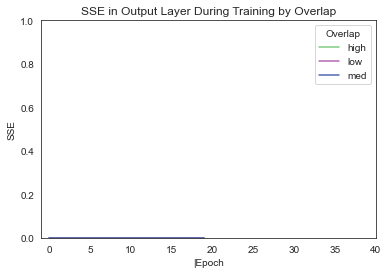

In [48]:
analyses_df = plotSSEbyCat(data_train_stacked, 'train', category_palette, analyses_df)

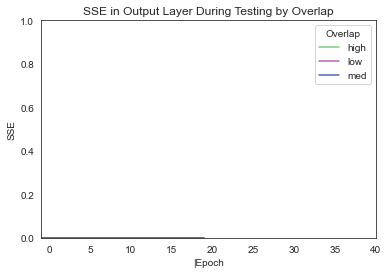

In [49]:
analyses_df = plotSSEbyCat(data_test_stacked, 'test', category_palette, analyses_df)

In [50]:
# plotSSE(data_test_stacked, 'TestSceneAll', 'Test', scene_palette, analyses_df)

In [51]:
# plotSSE(data_test_stacked, 'TestColorAll', 'Test', scene_palette, analyses_df)

In [52]:
if study_task_run == 1:
    analyses_df = plotSSE(data_train_stacked, 'TaskColorWOOsc', 'Train', scene_palette, analyses_df)

In [53]:
# plotSSE(data_train_stacked, 'TaskSceneRecall', 'Train', scene_palette, analyses_df)

['TaskColorRecall']


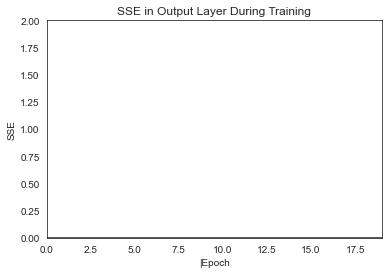

In [54]:
analyses_df = plotSSE(data_train_stacked, 'TaskColorRecall', 'Train', scene_palette, analyses_df)

## Print checkpoint
<a id='Checkpoint_0:_istheoutputoutputshowncorrectlythroughoutthelearningtask'></a>

### Output Layer


In [55]:
# Checkpoint 0: is the output output shown correctly throughout the learning task

if study_task_run == 1 :
    sse = data_train_stacked.loc[idx[:,:,:,'#Output_AvgSSE'],:]
    sse_mean_task = sse.groupby('$CurrentTask').mean()

    baseline_SSE = sse_mean_task.loc['TaskColorWOOsc']
    print(baseline_SSE.mean())

    if baseline_SSE.mean() < .001 :
        checkpoint_TF = True
    else :
        checkpoint_TF = False
    temp = ['Scene SSE train', checkpoint_TF, baseline_SSE.mean(), 'is the output output shown correctly throughout the learning task - value ']
    temp_series = pd.Series(temp, index = checkpoints_df.columns)
    checkpoints_df = checkpoints_df.append(temp_series, ignore_index = True)


In [56]:
#checkpoint 1 : is the object input correctly shown throughout the learning and recall phase?
## ADD THIS

In [57]:
sse = data_train_stacked.loc[idx[:,:,:,'#Category_AvgSSE'],:]
# sse_mean_task = sse.groupby('$CurrentTask').mean()
sse_mean = sse.mean(axis = 1).mean(axis = 0)
sse_mean 

if sse_mean < .001 :
    checkpoint_TF = True
else :
    checkpoint_TF = False
temp = ['Category SSE train', checkpoint_TF, sse_mean, 'is the object input correctly shown throughout the learning and recall phase?']
temp_series = pd.Series(temp, index = checkpoints_df.columns)
checkpoints_df = checkpoints_df.append(temp_series, ignore_index = True)

In [58]:
#checkpoint 2: is the scene input correctly shown throughout the learning and recall phase?
## ADD THIS

In [59]:
sse = data_train_stacked.loc[idx[:,:,:,'#Scene_AvgSSE'],:]
# sse_mean_task = sse.groupby('$CurrentTask').mean()
sse_mean = sse.mean(axis = 1).mean(axis = 0)
sse_mean 

if sse_mean < .001 :
    checkpoint_TF = True
else :
    checkpoint_TF = False
temp = ['scene SSE train', checkpoint_TF, sse_mean, 'is the scene input correctly shown throughout the learning and recall phase?']
temp_series = pd.Series(temp, index = checkpoints_df.columns)
checkpoints_df = checkpoints_df.append(temp_series, ignore_index = True)

In [60]:
#checkpoint 3: are the outputs learned by the end of the study phase?

In [61]:
if study_task_run == 1 :
    sse = data_test_stacked.loc[idx[:,epoch_end_initial,'TaskColorWOOsc', 'TestColorAll','#Output_AvgSSE'],:]

    final_learning_SSE_per_run = sse.mean(axis = 1)
    final_learning_SSE = final_learning_SSE_per_run.mean()
    print(final_learning_SSE)

    if final_learning_SSE < .015 :
        checkpoint_TF = True
    else :
        checkpoint_TF = False
    temp = ['scene learned at baseline', checkpoint_TF, final_learning_SSE, 'are the scenes learned by the end of the study phase?']
    temp_series = pd.Series(temp, index = checkpoints_df.columns)
    checkpoints_df = checkpoints_df.append(temp_series, ignore_index=True)

    checkpoints_df

### Visualize the output layer at each epoch
<a id='Visualizetheoutputlayerateachepoch'></a>

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

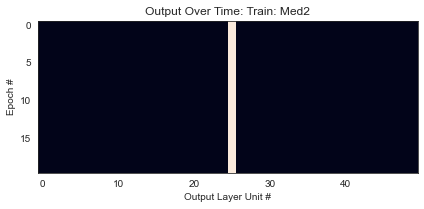

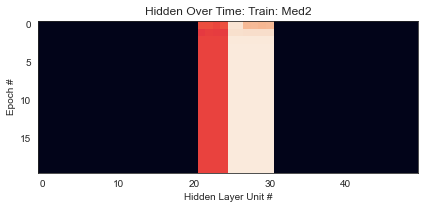

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

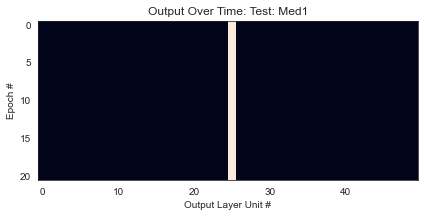

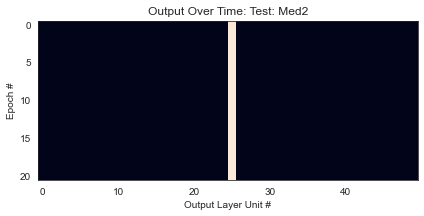

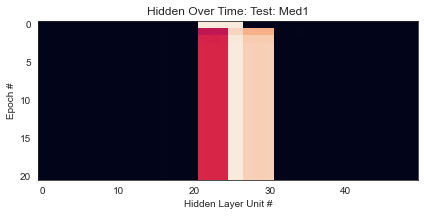

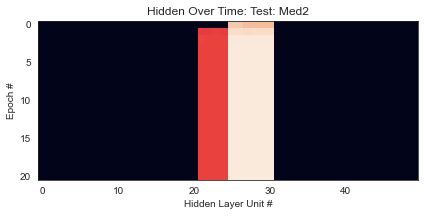

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

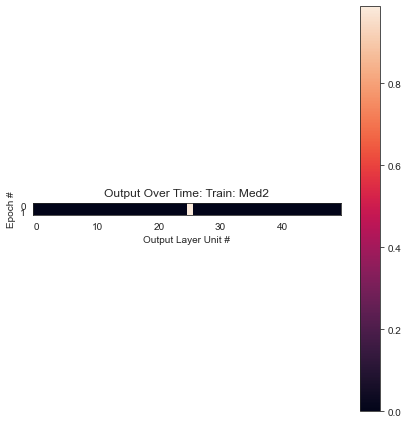

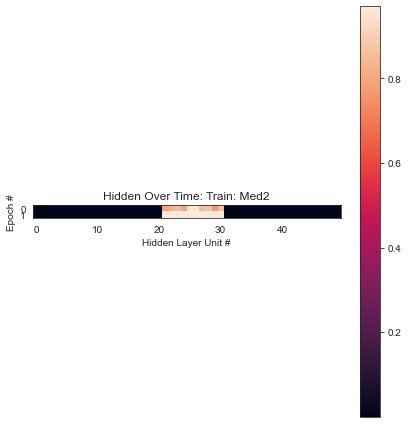

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

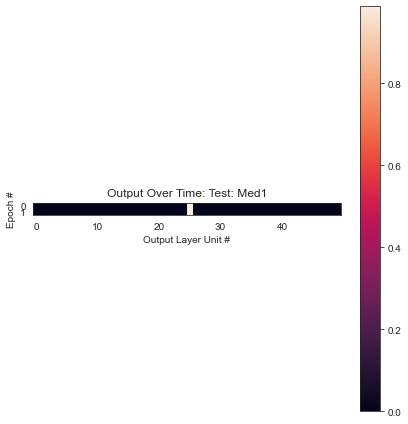

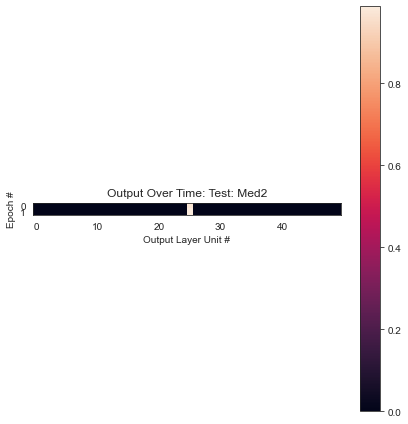

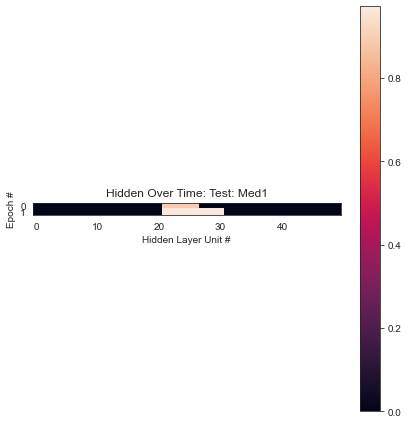

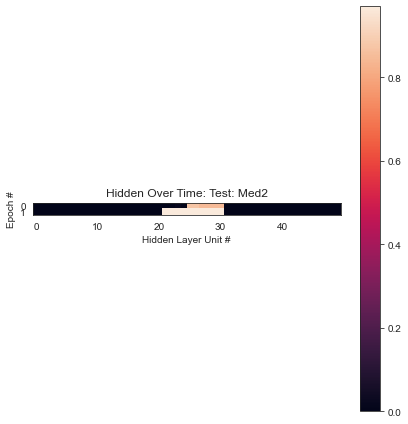

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

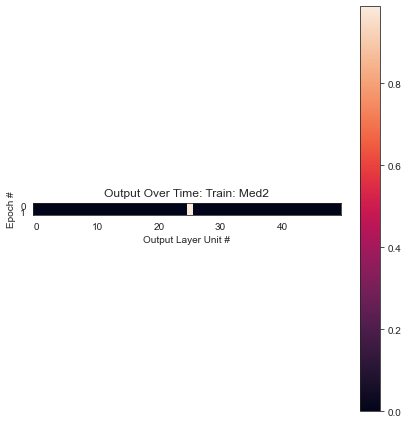

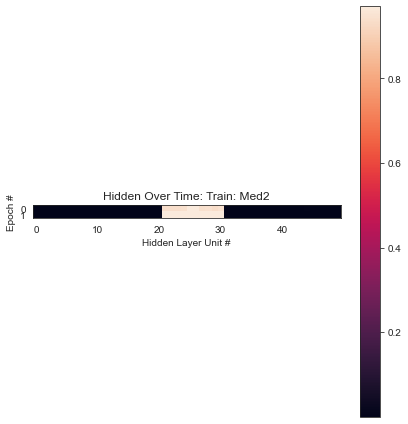

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

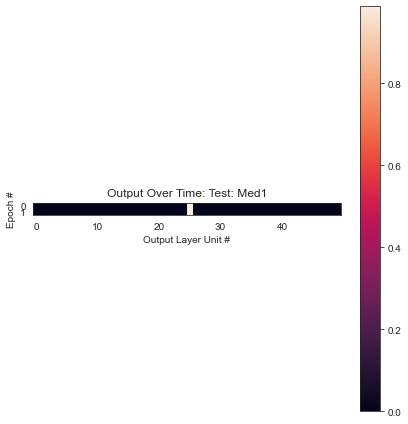

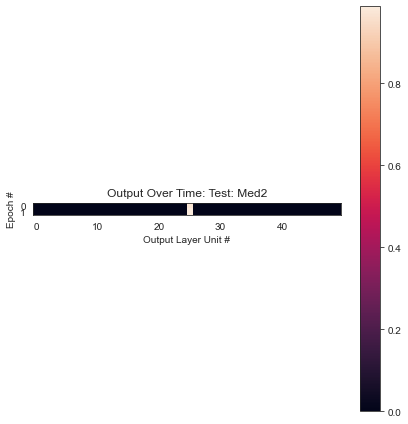

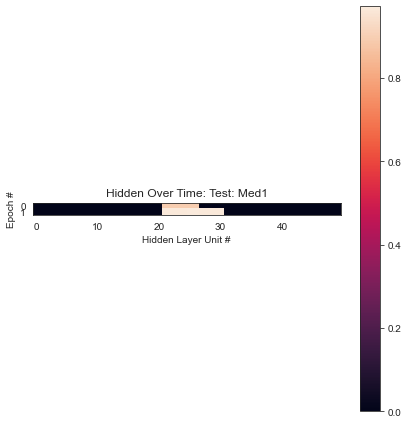

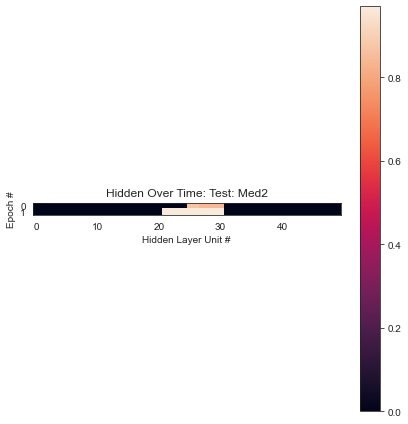

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

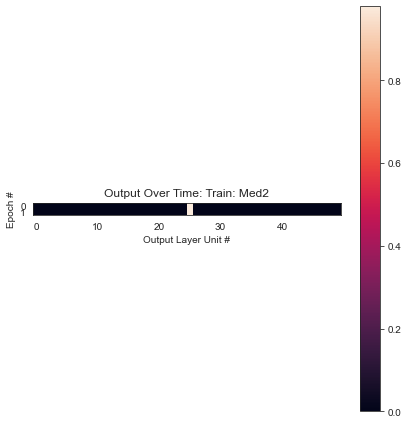

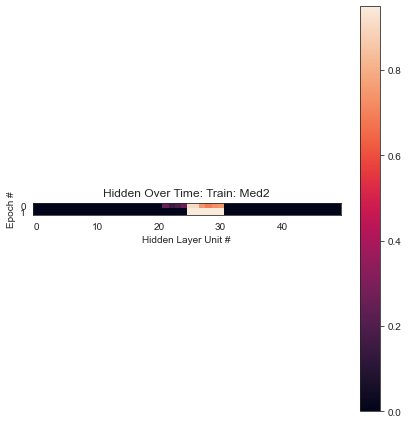

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

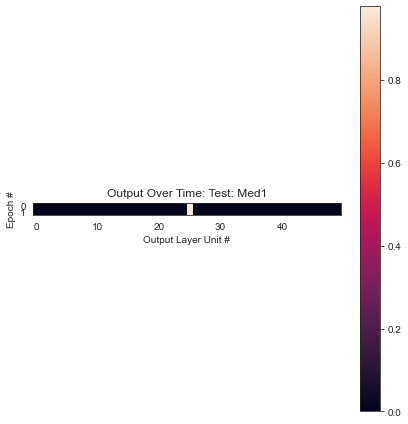

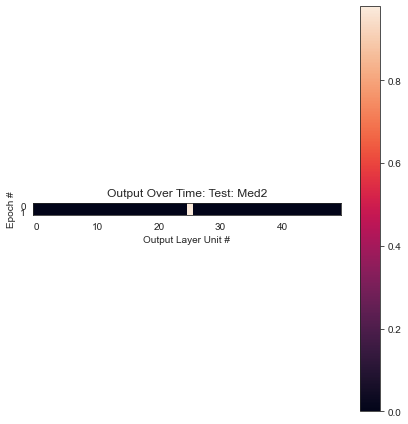

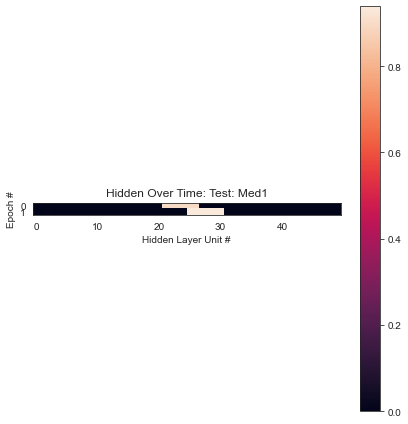

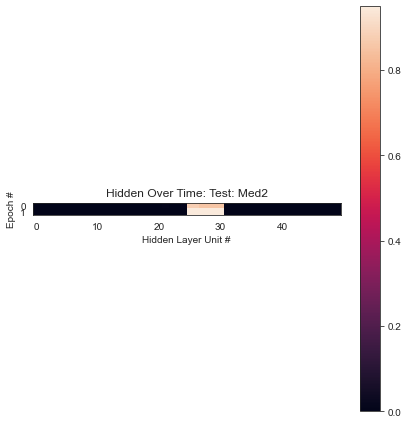

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

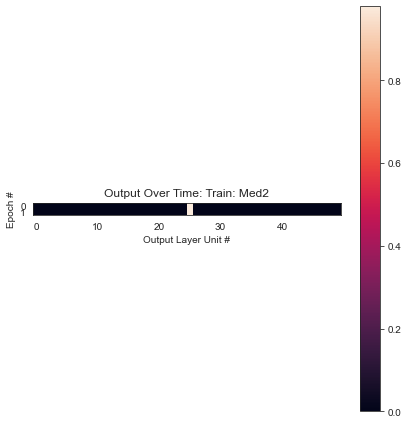

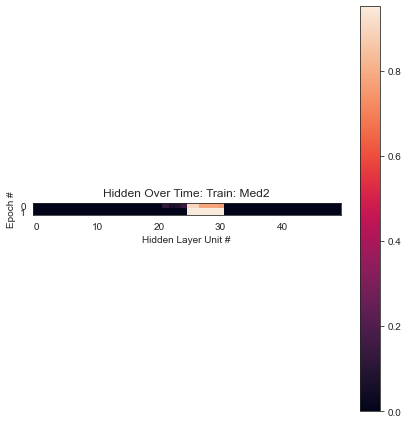

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

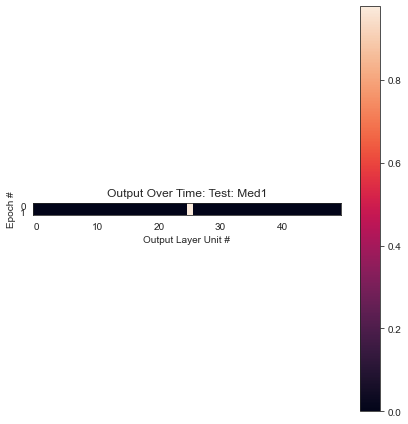

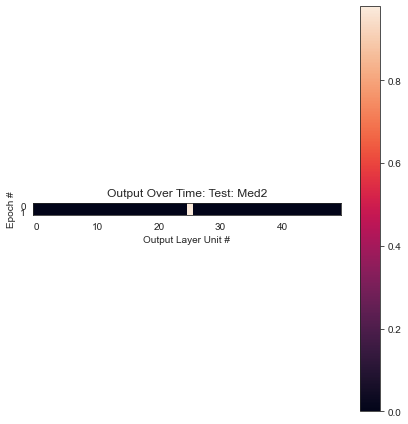

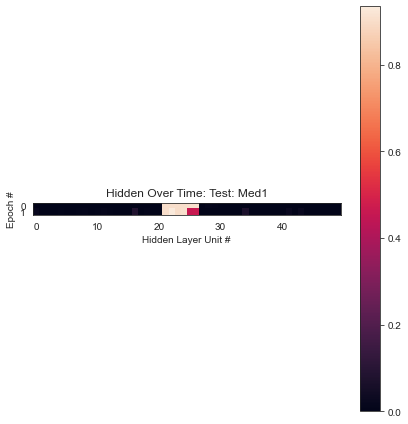

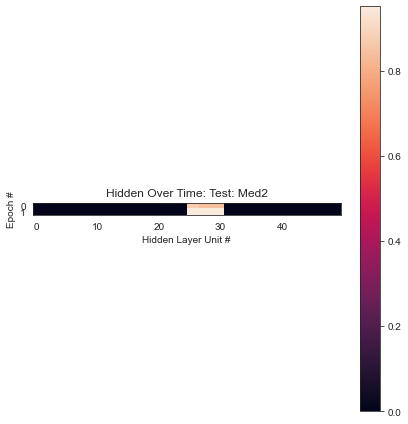

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

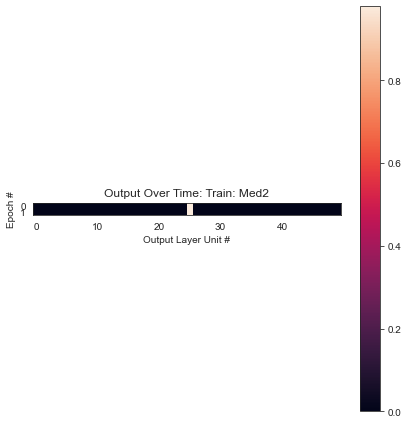

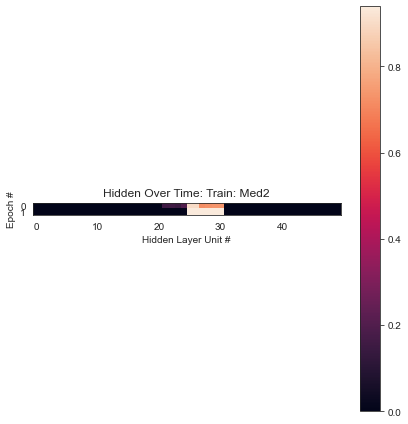

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

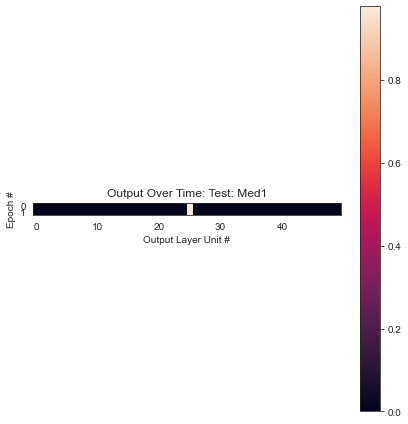

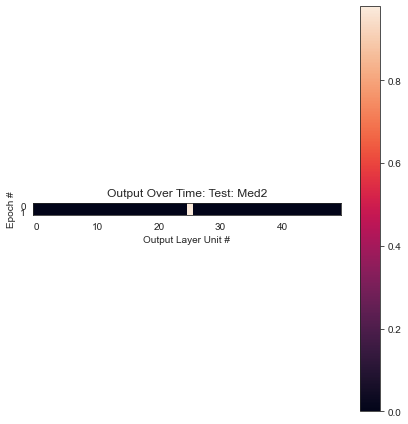

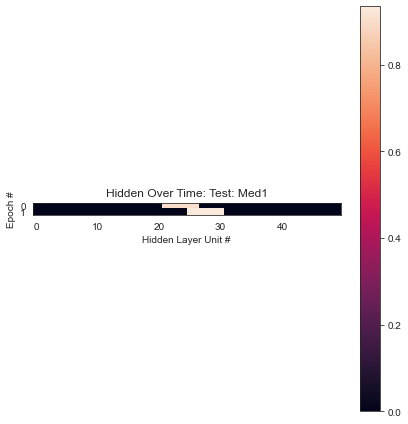

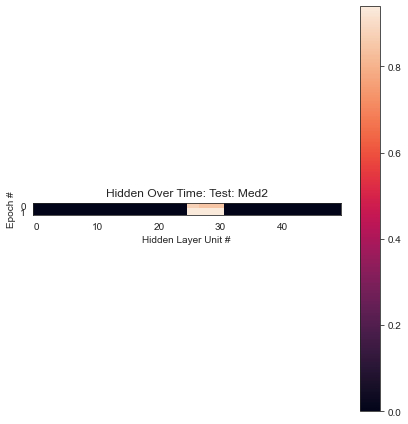

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

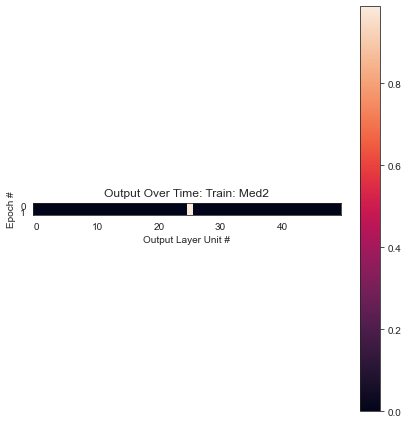

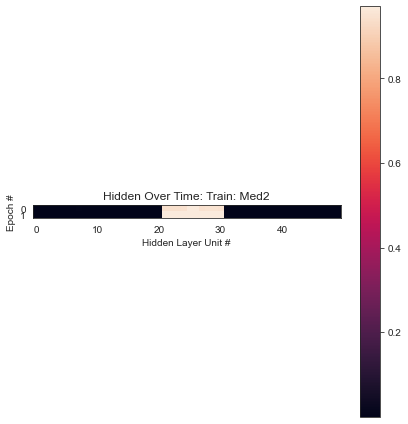

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

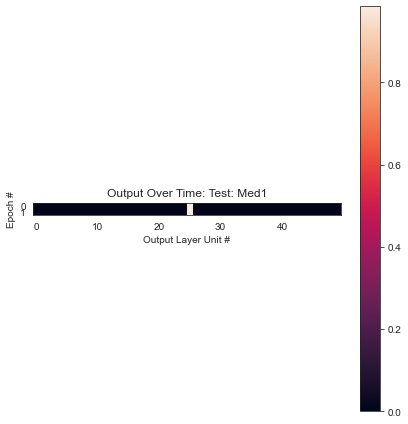

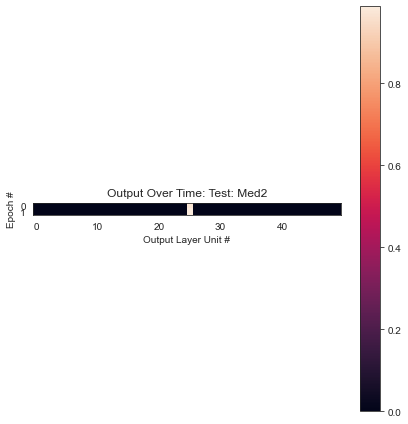

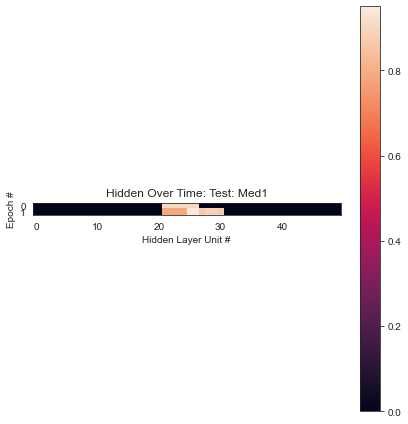

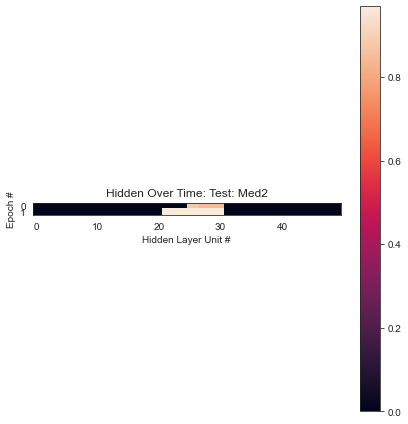

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

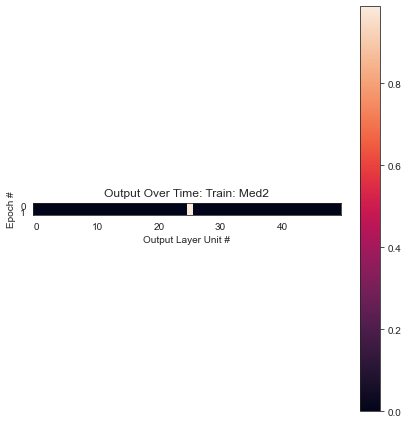

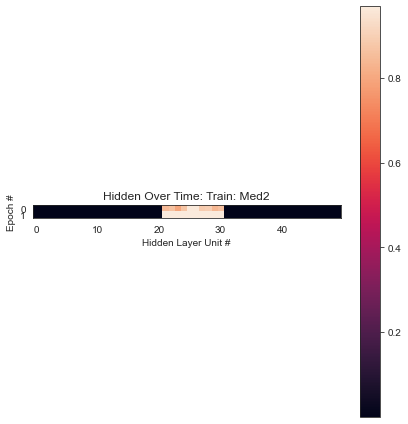

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

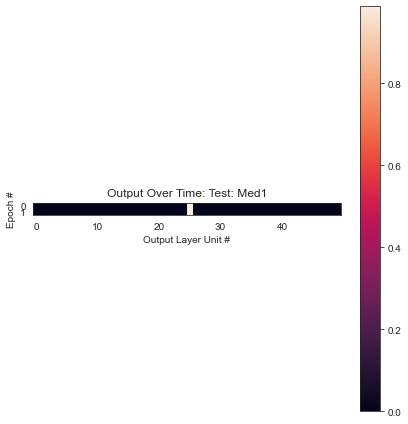

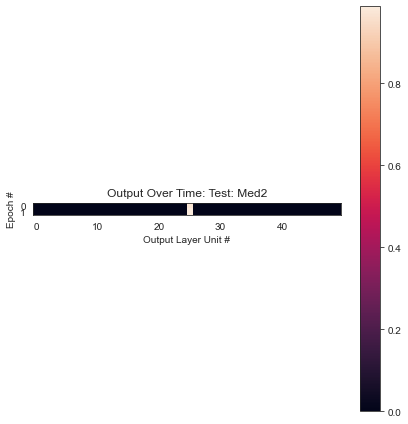

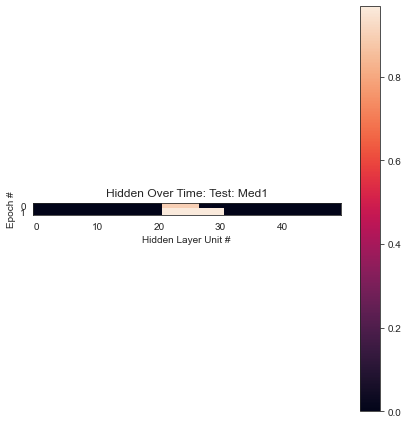

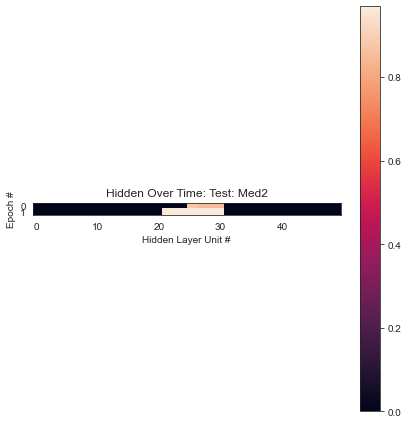

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

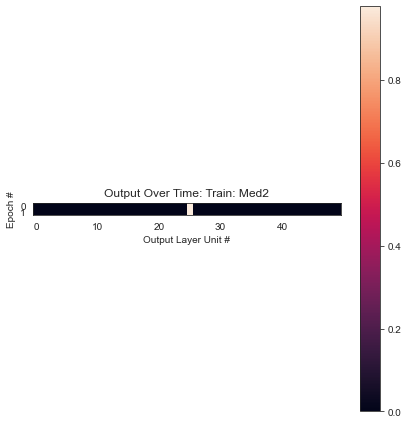

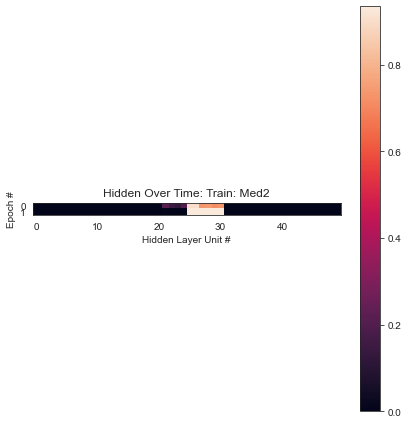

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

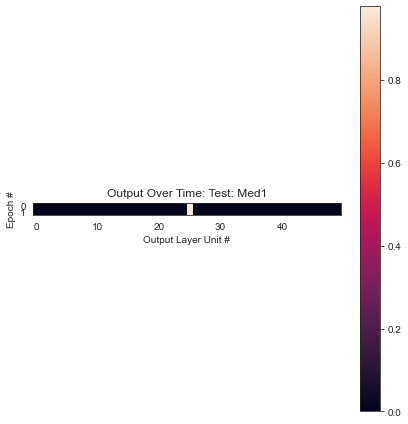

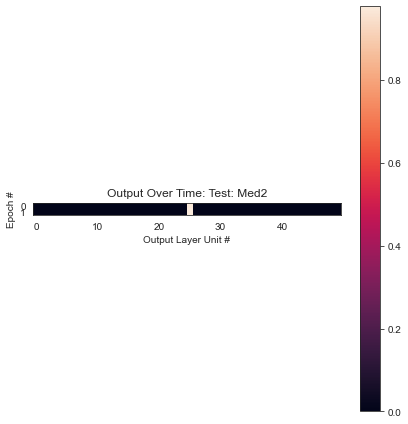

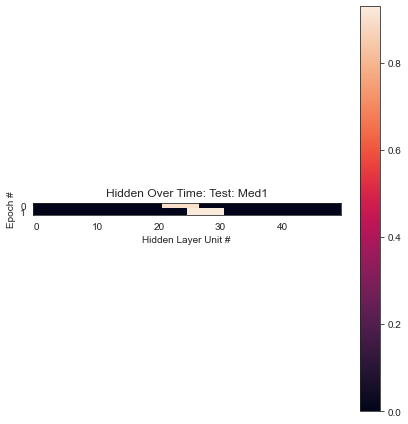

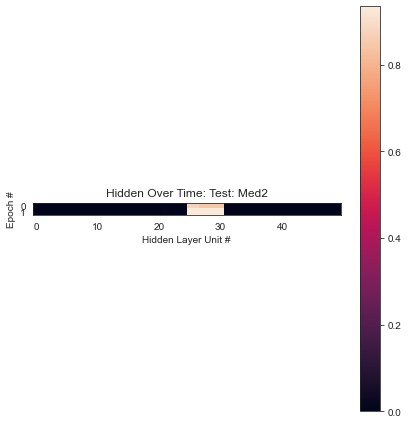

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

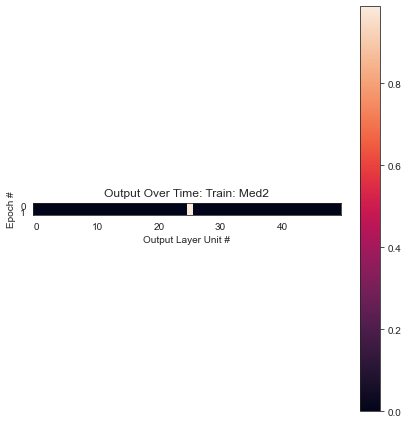

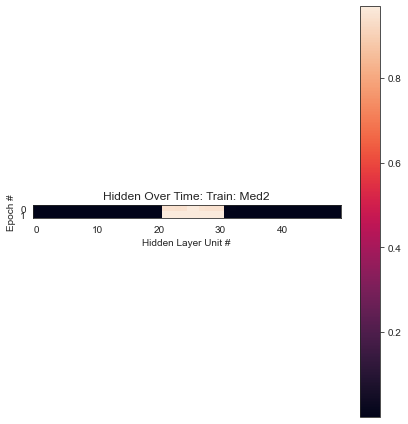

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

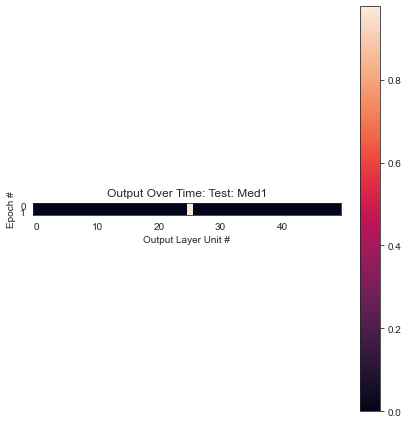

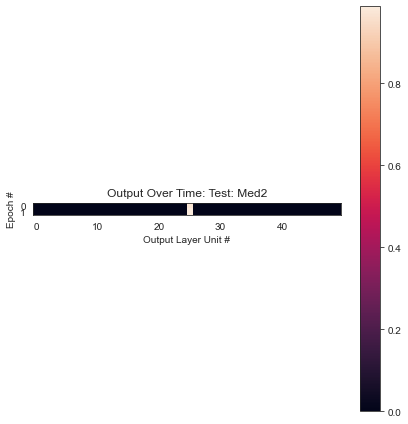

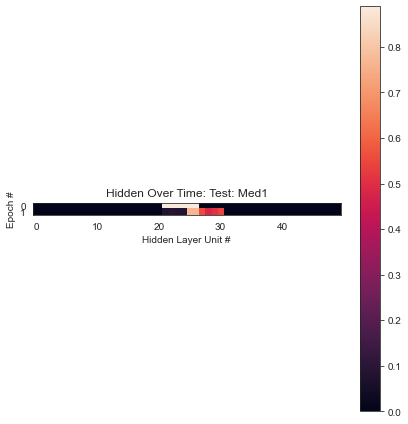

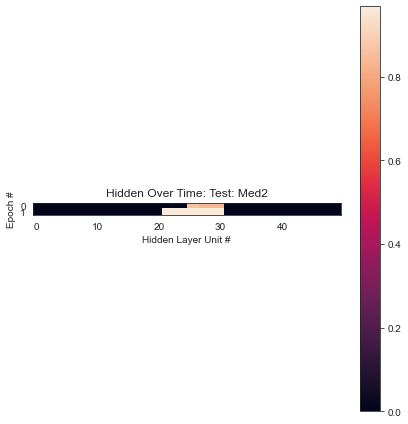

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

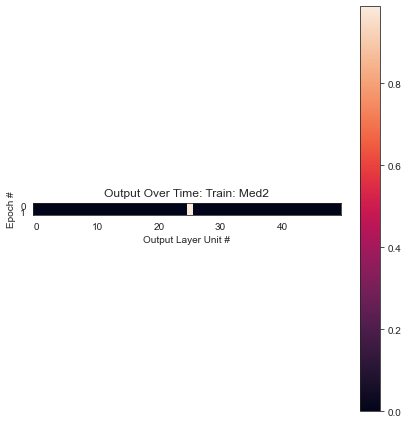

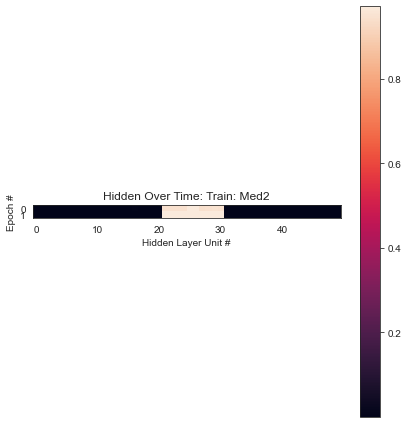

['med1', 'med2']
------------------


<Figure size 432x288 with 0 Axes>

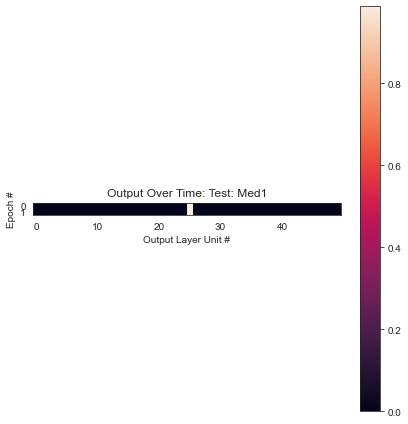

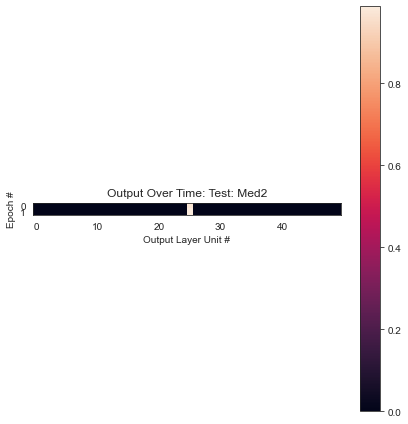

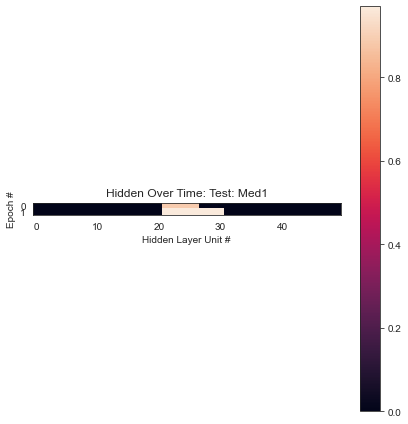

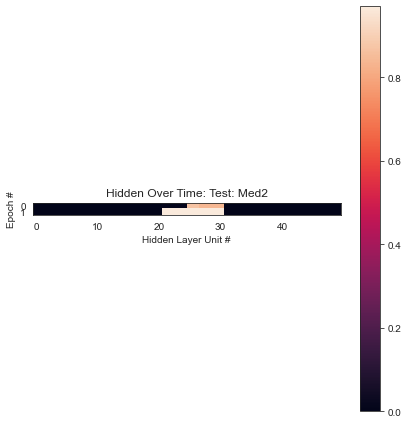

In [62]:

def prep_output_output_test(data, name, test_or_train, filter_outM, run) : 
    #run can be 'all' or a specific integer for a run to look at. 
    
    if name == 'TestColorAll' :
        data = data.loc[(slice(None), slice(None), slice(None), name, filter_outM),:]
    elif name == 'TaskColorRecall' :


        data = data.loc[(slice(None), slice(None), name, filter_outM),:]


    data = data.reset_index()

    if (run == 'all') :

        data = data.groupby(['|Epoch', 'key']).mean().drop(['|Run'], axis = 1).stack().unstack('key')

    else : ## specific run

        data = data[data['|Run'] == run]
        data = data.drop(columns= ['|Run', '$CurrentTask', test_or_train])
        data = data.set_index(['|Epoch', 'key']).stack().unstack(level = 'key')

    data = data[filter_outM] #put columns back in the correct order

    return data


# # plot the output layer at test
# for stim in stim_names :
#     data = prep_output_output_test(data_test_stacked, 'TestColorAll', '$CurrentTest', filter_outM, 'all')
#     plt.figure(figsize=(6,6))
#     plt.imshow(data.loc[(slice(None), stim),:])
#     title = 'Output Representation Over Time: ' + stim.capitalize()
#     plt.title(title)
#     plt.ylabel('Epoch #')
#     plt.xlabel('Output Layer Unit #')
#     plt.savefig(results_fig_dir + title + '.png', bbox_inches = "tight")
#     plt.show()
#     analyses_df = add_analysis_to_analyses_df(analyses_df, title, True)



# for stim in stim_names :
#     data = prep_output_output_test(data_train_stacked, 'TaskColorRecall', '$CurrentTask', filter_outM, 'all')
#     plt.figure(figsize=(6,6))
#     plt.imshow(data.loc[(slice(None), stim),:])
#     title = 'Output Representation Over Time: ' + stim.capitalize()
#     plt.title(title)
#     plt.ylabel('Epoch #')
#     plt.xlabel('Output Layer Unit #')
#     plt.savefig(results_fig_dir + title + '.png', bbox_inches = "tight")
#     plt.show()
#     analyses_df = add_analysis_to_analyses_df(analyses_df, title, True)

filter_HiddM
filter_out_AvgSLrn
# plot the output layer at train
def plot_visual_layer(runN, analyses_df, all_epochs = True):

    for type_run in ['Train', 'Test'] :
        plt.clf()
        relevant_trials = stim_names.copy()

        print(relevant_trials)
        if type_run == 'Train':
            try:
                relevant_trials.remove('med1')
            except: 
                pass
        print('------------------')
        if type_run == 'Test' :
            data_t= data_test_stacked
            name = 'TestColorAll'
            test_or_train = '$CurrentTest'
        elif type_run == 'Train' :
            data_t = data_train_stacked
            name = 'TaskColorRecall'
            test_or_train = '$CurrentTask'

        for layer in ['Output', 'Hidden'] : 
            if layer == 'Output' :
                if type_run == 'Train' :
                    units = filter_outP
                else:
                    units = filter_outM
            elif layer == 'Hidden' :
                if type_run == 'Train' :
                    units = filter_HiddenP
                else:
                    units = filter_HiddM

            for stim in relevant_trials :

                data = prep_output_output_test(data_t, name, test_or_train, units, runN)
                plt.figure(figsize=(6,6))
                plt.clf()

                if all_epochs==False:
                    min_epoch = data.reset_index()['|Epoch'].min()
                    max_epoch = data.reset_index()['|Epoch'].max()

                    plt.imshow(data.loc[([min_epoch,max_epoch], stim),:])
                    plt.colorbar()

                if all_epochs==True:
                    plt.imshow(data.loc[(slice(None), stim),:])
                title = layer + ' Over Time: ' + type_run + ': ' + stim.capitalize()
                plt.title(title)
                plt.ylabel('Epoch #')
                plt.xlabel(layer + ' Layer Unit #')
                plt.tight_layout()


                if all_epochs ==True:

                    plt.savefig(results_fig_dir + title + '.pdf', bbox_inches = "tight")
                else:
                    plt.savefig(eps_dir + 'run '+ str(runN) + title + '.eps', bbox_inches = "tight")

                if from_cmdLine != 'cmd' :
                    plt.show()
                analyses_df = add_analysis_to_analyses_df(analyses_df, title, True)

                if layer == 'Hidden' :
                    if type_run == 'Test':
                        data2 = data
                plt.close()
                        

plot_visual_layer('all', analyses_df, all_epochs = True)

if nruns < 10:
    num_runs_to_save_act = nruns
    
else:
    num_runs_to_save_act = 10

for r in range(num_runs_to_save_act):
    plot_visual_layer(r, analyses_df, all_epochs = False)



# Correlation Analysis
<a id='Correlation_AnalysisFirstsetupcorrelationmatricesforfinalepochineachtask'></a>

## First set up correlation matrices for final epoch in each task


In [63]:

hiddenData = data_test_stacked.loc[(slice(None), slice(None), slice(None),slice(None),slice(hiddenM_Start, hiddenM_End)),:]

outputData = data_test_stacked.loc[(slice(None),  slice(None), slice(None),slice(None), slice(outputM_Start, outputM_End)),:]


## Plot Within Pair Correlation Over Time
<a id='Plot_Within_Pair_Correlation_Over_Time'></a>

In [64]:
def make_corr_long(dataframe, LayerType, testType, numPairs) :

    df = dataframe.loc[(slice(None),  slice(None), slice(None),slice(testType), slice(None)),:]
    df_corr = df.groupby(['|Run','|Epoch','$CurrentTask', '$CurrentTest']).corr()

    df_corr.index.names = ['|Run', '|Epoch', '$CurrentTask', '$CurrentTest', 'firstItem']
    df_corr_long = pd.DataFrame(df_corr.stack())
    df_corr_long.head()
    df_corr_long.index.names = ['|Run', '|Epoch', '$CurrentTask','$CurrentTest', 'firstItem', 'secondItem']
    df_corr_long = df_corr_long.rename(columns = {0: 'correlation'})
    df_corr_long = df_corr_long.reset_index()
    df_corr_long['pair'] = df_corr_long[['firstItem', 'secondItem']].apply(lambda x: '-'.join(x), axis = 1)

    df_corr_long


    if (numPairs ==2) :
        pairtypeDict = {'small1-small1': 'identity', 
                   'small1-small2': 'within',
                   'small1-small3': 'across',
                   'small1-small4': 'across',
                   'small2-small1': 'redundant',
                   'small2-small2': 'identity',
                   'small2-small3': 'across',
                   'small2-small4': 'across',
                   'small3-small1': 'redundant',
                   'small3-small2': 'redundant',
                   'small3-small3': 'identity',
                   'small3-small4': 'within',
                   'small4-small1': 'redundant',
                   'small4-small2': 'redundant',
                   'small4-small3': 'redundant',
                   'small4-small4': 'identity'}
        
    elif (numPairs == 3) :
        pairtypeDict = {'low1-low1': 'identity',
                       'low1-low2': 'low1-low2',
                       'low1-med1': 'across', 
                       'low1-med2': 'across',
                       'low1-high1': 'across',
                       'low1-high2': 'across',
                       'low2-low1': 'redundant',
                       'low2-low2': 'identity',
                       'low2-med1': 'across',
                       'low2-med2': 'across',
                       'low2-high1': 'across',
                       'low2-high2': 'across',
                        'med1-low1': 'redundant',
                        'med1-low2': 'redundant',
                        'med1-med1': 'identity',
                        'med1-med2': 'med1-med2',
                        'med1-high1': 'across',
                        'med1-high2': 'across',
                        'med2-low1': 'redundant',
                        'med2-low2': 'redundant',
                        'med2-med1': 'redundant',
                        'med2-med2': 'identity',
                        'med2-high1': 'across',
                        'med2-high2': 'across',
                        'high1-low1': 'redundant',
                        'high1-low2': 'redundant',
                        'high1-med1': 'redundant',
                        'high1-med2': 'redundant',
                        'high1-high1': 'identity',
                        'high1-high2': 'high1-high2',
                        'high2-low1': 'redundant',
                        'high2-low2': 'redundant',
                        'high2-med1': 'redundant',
                        'high2-med2': 'redundant',
                        'high2-high1': 'redundant',
                        'high2-high2': 'identity',
                       }


    df_corr_long['pair_type'] = df_corr_long['pair'].map(pairtypeDict)
    return df_corr_long



In [65]:
def plot_correlation_over_time(dataframe, LayerType, testType, numPairs, analyses_df) :
    #dataframe_corr is either outputData_corr_long or hiddenData_corr_long. 
    #layer type is for the plot title - hidden or output.
    #testType is TestColorAll or TestSceneAll
    
    title = 'Pair Correlation (' + LayerType + ' Layer)'
    try:
        plt.clf()
        if (numPairs == 2) :
            df_corr_long_plot = dataframe[dataframe['pair_type'].isin(['within', 'across'])]
        elif (numPairs == 3) :
            df_corr_long_plot = dataframe[dataframe['pair_type'].isin(['low1-low2','med1-med2', 'high1-high2', 'across'])]
        #plot!
    #     plt.figure(figsize=(8,8))
        sns.set_palette("husl", 2)

        g = sns.lineplot(x="|Epoch", y="correlation",
        hue="pair_type", palette = correl_palette, 
                 data=df_corr_long_plot)
            
        if study_task_run == 1 :
            g = sns.lineplot(x="|Epoch", y="correlation",
                    hue="pair_type",  style = "$CurrentTask", palette = correl_palette, 
                             data=df_corr_long_plot)
        elif study_task_run == 0 : 
            g = sns.lineplot(x="|Epoch", y="correlation",
            hue="pair_type", palette = correl_palette, 
                 data=df_corr_long_plot)

#         print(df_corr_long_plot.head())
        g.set_xlabel('Time (Epoch #)')
        g.set_ylim(-1, 1.1)
        plt.title(title)
        g.axhline(0, ls='-', color = 'gray')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        plt.savefig(results_fig_dir + title + '.png', bbox_inches = "tight")

        plt.show()

        analyses_df = add_analysis_to_analyses_df(analyses_df, title, True) 
    except:
        traceback.print_exc()
        analyses_df = add_analysis_to_analyses_df(analyses_df, title, False) 
    return analyses_df
        
    
    




In [66]:
def plot_final_correlation_over_time(dataframe, LayerType, analyses_df) :
    title = 'final within pair correlation by type : ' + LayerType + ' Layer'
    try:
        plt.clf()
        temp = dataframe[dataframe['pair_type'].isin(['med1-med2', 'low1-low2','high1-high2'])]
        final_corr = temp[temp['|Epoch'] == max_final_epoch]
    #     sns.swarmplot(x = 'pair_type', y = 'correlation', data=final_corr)
        sns.boxplot(x = 'pair_type', y = 'correlation', order = ['low1-low2', 'med1-med2', 'high1-high2'],
                    palette = correl_palette, data=final_corr)
        plt.ylim(-1.1,1.1)
        plt.axhline(0, ls='-', color ='gray')
        plt.title(title)
        plt.show()


        sns.swarmplot(x = 'pair_type', y = 'correlation',  order = ['low1-low2', 'med1-med2', 'high1-high2'], 
                       palette = correl_palette, data=final_corr)
        plt.ylim(-1.1,1.1)
        plt.axhline(0, ls='-', color = 'gray')
        title = 'final within pair correlation by type : ' + LayerType + ' Layer'
        plt.title(title)
        plt.savefig(results_fig_dir + title + '.png')
        plt.show()
        analyses_df = add_analysis_to_analyses_df(analyses_df, title, True) 
        return final_corr, analyses_df
    except:
        traceback.print_exc()
        analyses_df = add_analysis_to_analyses_df(analyses_df, title, False) 
        return "error", analyses_df
    
    
    # sns.swarm(x=)



In [67]:
def analyze_within_pair_correlation(final_corr_df) :
    
    # this takes output_just_main_corr or hidden_just_main_corr as inputs, which are output from plot_final_correlation_over_time
    
    
    
    # high_corr = final_corr_df[final_corr_df['pair_type'] == 'high1-high2']['correlation']
    # low_corr = final_corr_df[final_corr_df['pair_type'] == 'low1-low2']['correlation']
    # med_corr = final_corr_df[final_corr_df['pair_type'] == 'med1-med2']['correlation']

    # stats.f_oneway(high_corr, med_corr, low_corr)

    ##################

    mod = ols('correlation ~ C(pair_type)', data = final_corr_df).fit()
    print(mod.summary())

    print('-------------------')
    aov_table = sm.stats.anova_lm(mod, typ=2)
    print('HERE')
    print(aov_table)

    print('\n\n\n -------------------\n')
    print("IS THERE A SIGNIFICANT DIFFERENCE BETWEEN GROUPS? \n\n")
    if aov_table.iloc[0]['PR(>F)'] < .05 :
        print('yes, p = ' + str(aov_table.iloc[0]['PR(>F)']) +'\n')

        mc = MultiComparison(final_corr_df['correlation'], final_corr_df['pair_type'])
        mc_results = mc.tukeyhsd()
        print(mc_results)
        group_diff = True
    else :
        print('no')
        group_diff = False


    #########
    print('\n\n ARE THE MEAN WITHIN PAIR CORRELATIONS IN TH ORDER MED < LOW < HIGH? \n\n')
    corr_mean = final_corr_df.groupby('pair_type').mean()

    if corr_mean.loc['med1-med2', 'correlation'] < corr_mean.loc['low1-low2', 'correlation'] and corr_mean.loc['low1-low2', 'correlation'] < corr_mean.loc['high1-high2', 'correlation']:
        print('yes\n')
        group_order = True
    else: 
        print('no\n')
        sortedmeans = corr_mean.sort_values(by=['correlation']).index.get_level_values(0)
        print(list(sortedmeans))
        group_order = False


    #########

    high_corr = final_corr_df[final_corr_df['pair_type'] == 'high1-high2']['correlation']
    low_corr = final_corr_df[final_corr_df['pair_type'] == 'low1-low2']['correlation']
    med_corr = final_corr_df[final_corr_df['pair_type'] == 'med1-med2']['correlation']

    if med_corr.mean() < 0 :
        print('\n\n IS MEDIUM PAIR WITHIN CORRELATION SIGNIFICANTLY BELOW 0?')
        result = stats.ttest_1samp(med_corr, 0)
        print('t : ' + str(result[0]) + 'p : ' + str(result[1]))
        if result[1] < .05 :
            print('yes')

        else :
            print('no')


    if high_corr.mean() >0 :
        print('\n\n IS HIGH PAIR WITHIN CORRELATION SIGNIFICANTLY ABOVE 0?')
        result = stats.ttest_1samp(high_corr, 0)
        print('t : ' + str(result[0]) + 'p : ' + str(result[1]))
        if result[1] < .05 :
            print('yes')

        else :
            print('no')

    return mod, group_diff, group_order


In [68]:
def plot_correlation_comparison(dataframe, LayerType, analyses_df) :
    try:
        plt.clf()
        temp = dataframe[dataframe['pair_type'].isin(['med1-med2', 'low1-low2','high1-high2'])]
        final_corr = temp[temp['|Epoch'].isin([epoch_end_initial, max_final_epoch])]
        g = sns.FacetGrid(final_corr, col = "pair_type", hue = '|Run', col_order = ['low1-low2', 'med1-med2', 'high1-high2'])
        g.map(sns.pointplot, "|Epoch", "correlation", color="xkcd:plum", alpha = .5);

        title = 'correlation before and after: ' + LayerType + ' Layer'
        plt.subplots_adjust(top=0.8)
        g.fig.suptitle(title.title()) # can also get the figure from plt.gcf()
        axes = g.axes.flatten()
        axes[0].set_title("Low")
        axes[1].set_title("Medium")
        axes[2].set_title("High")
        g.set(ylim=(-1.1, 1.1))

        for col in range(numPairs) :
            g.axes[0][col].axhline(y = 0, color='black', ls='--', linewidth=2, alpha=.7)

        plt.savefig(results_fig_dir + title + '.png')


        plt.show()

        g = sns.FacetGrid(final_corr, col = "pair_type", col_order = ['low1-low2', 'med1-med2', 'high1-high2'])
        g.map(sns.pointplot, "|Epoch", "correlation", color="xkcd:plum");

        title = 'correlation before and after Ave: ' + LayerType + ' Layer'
        plt.subplots_adjust(top=0.8)
        g.fig.suptitle(title.title()) # can also get the figure from plt.gcf()
        axes = g.axes.flatten()
        axes[0].set_title("Low")
        axes[1].set_title("Medium")
        axes[2].set_title("High")
        g.set(ylim=(-1.1, 1.1))

        for col in range(numPairs) :
            g.axes[0][col].axhline(y = 0, color='black', ls='--', linewidth=2, alpha=.7)

        plt.savefig(results_fig_dir + title + '.png')

        plt.show()

    #     sns.violinplot(x = 'pair_type', y = 'correlation',  order = ['low1-low2', 'med1-med2', 'high1-high2'], 
    #         hue = '|Epoch', data=final_corr)
    #     plt.show()
        analyses_df = add_analysis_to_analyses_df(analyses_df, title, True) 
        return final_corr, analyses_df
    except:
        traceback.print_exc()
        analyses_df = add_analysis_to_analyses_df(analyses_df, title, False) 
        return "error", analyses_df
    
    



### Output Layer: Is the low/med/high within pair correlation in the right order in the color layer?

<a id='is_the_low/med/high_within_pair_correlation_in_the_right_order_in_the_output_layer?'></a>

In [69]:
output_corr_long = make_corr_long(outputData, 'Color', 'TestColorAll', numPairs)

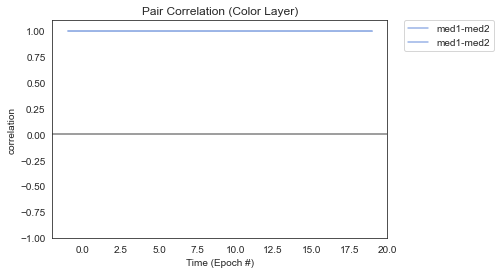

In [70]:
plt.clf()
analyses_df = plot_correlation_over_time(output_corr_long, 'Color', 'TestColorAll', numPairs, analyses_df)




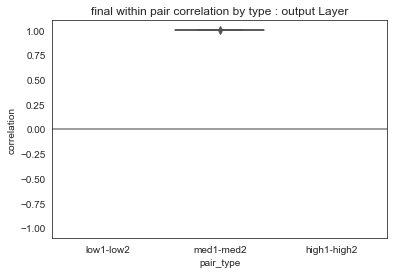

/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


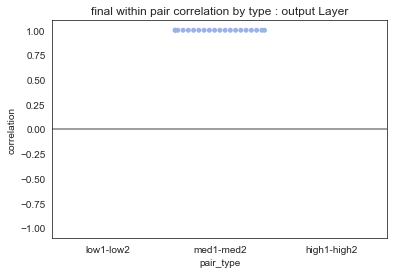

In [71]:
plt.clf()
output_just_main_corr, analyses_df = plot_final_correlation_over_time(output_corr_long, 'output', analyses_df) 

/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 432x288 with 0 Axes>

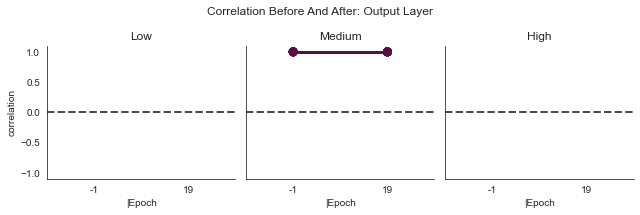

/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


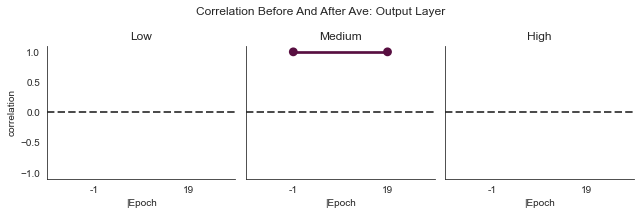

In [72]:
plt.clf()
output_just_main_corr, analyses_df = plot_correlation_comparison(output_corr_long, 'output', analyses_df) 


In [73]:
## Use try except block to not break the script if there's an error
## This is useful for the Post_analyses.py where sometimes we run test parameter searches 

title = "is the low/med/high within pair correlation in the right order in the output layer?"
try:

    print('-------------------')
    
    if study_task_run == 1 :
        aov_table = sm.stats.anova_lm(mod, typ=2)

        mod, group_diff, group_order = analyze_within_pair_correlation(output_just_main_corr)

        ## is the model significant? i.e. is low / med / high different?
        temp = ['Output w_corr difference', group_diff, 0, 'Output within pair correlation-- is there a difference between low/med/high']
        temp_series = pd.Series(temp, index = results_df.columns)
        results_df = results_df.append(temp_series, ignore_index = True)



        ## is the low/med/high within pair correlation in the right order?
        temp = ['Output w_corr order', group_order, 0, 'Output within pair correlation-- is low/med/high in the right order']
        temp_series = pd.Series(temp, index = results_df.columns)
        results_df = results_df.append(temp_series, ignore_index = True)

        analyses_df = add_analysis_to_analyses_df(analyses_df, title, True) 
except:
    traceback.print_exc()
    
    
    
    analyses_df = add_analysis_to_analyses_df(analyses_df, title, False) 

-------------------


### Hidden Layer: Is the low/med/high within pair correlation in the right order in the color layer?
<a id='is_the_low/med/high_within_pair_correlation_in_the_right_order_in_the_hidden_layer?'></a>

In [74]:
hidden_corr_long = make_corr_long(hiddenData, 'Hidden', 'TestColorAll', numPairs)

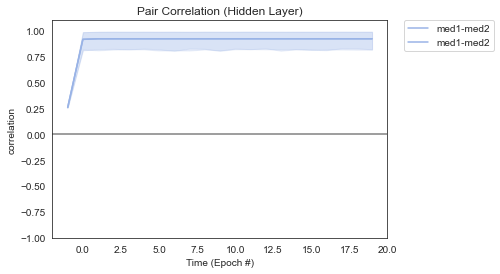

In [75]:
plt.clf()

analyses_df = plot_correlation_over_time(hidden_corr_long, 'Hidden', 'TestColorAll', numPairs, analyses_df)


In [76]:
# hidden_corr_long = plot_correlation_over_time(hiddenData, 'Hidden', 'TestSceneAll', numPairs)


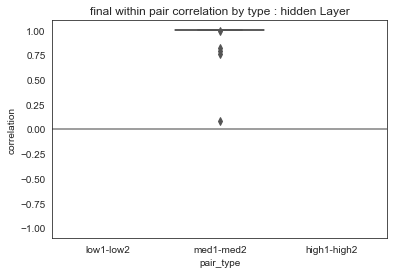

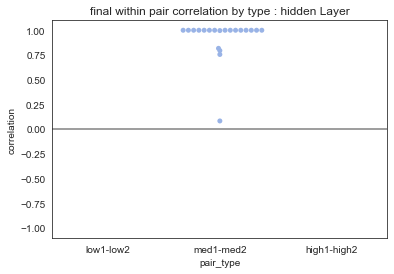

In [77]:
plt.clf()
hidden_just_main_corr, analyses_df = plot_final_correlation_over_time(hidden_corr_long, 'hidden', analyses_df) 

In [78]:
## Use try except block to not break the script if there's an error
## This is useful for the Post_analyses.py where sometimes we run test parameter searches 
title = "is the low/med/high within pair correlation in the right order in the hidden layer?"
try:

    if study_task_run == 1:
        mod, group_diff, group_order = analyze_within_pair_correlation(hidden_just_main_corr)


        ## is the model significant? i.e. is low / med / high different?
        temp = ['Hidden w_corr difference', group_diff, 0, 'Hidden within pair correlation-- is there a difference between low/med/high']
        temp_series = pd.Series(temp, index = results_df.columns)
        results_df = results_df.append(temp_series, ignore_index = True)

        ## is the low/med/high within pair correlation in the right order?
        temp = ['Hidden w_corr order', group_order, 0, 'Hidden within pair correlation-- is low/med/high in the right order']
        temp_series = pd.Series(temp, index = results_df.columns)
        results_df = results_df.append(temp_series, ignore_index = True)

        analyses_df = add_analysis_to_analyses_df(analyses_df, title, True) 
except:
    traceback.print_exc()
    analyses_df = add_analysis_to_analyses_df(analyses_df, title, False) 

/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 432x288 with 0 Axes>

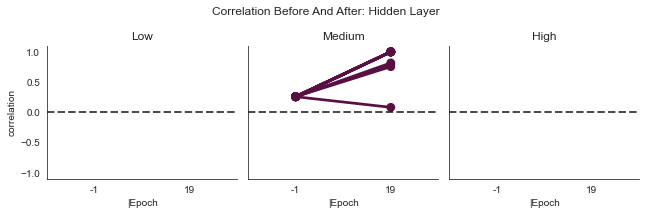

/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


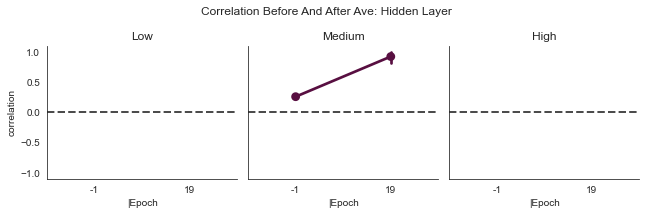

In [79]:
plt.clf()
hidden_just_main_corr, analyses_df = plot_correlation_comparison(hidden_corr_long, 'hidden', analyses_df) 

In [80]:
output_corr_long

,|Run,|Epoch,$CurrentTask,$CurrentTest,firstItem,secondItem,correlation,pair,pair_type
0,0,-1,TaskColorWOOsc,TestColorAll,med1,med1,1.0,med1-med1,identity
1,0,-1,TaskColorWOOsc,TestColorAll,med1,med2,1.0,med1-med2,med1-med2
2,0,-1,TaskColorWOOsc,TestColorAll,med2,med1,1.0,med2-med1,redundant
3,0,-1,TaskColorWOOsc,TestColorAll,med2,med2,1.0,med2-med2,identity
4,0,0,TaskColorRecall,TestColorAll,med1,med1,1.0,med1-med1,identity
...,...,...,...,...,...,...,...,...,...
1675,19,18,TaskColorRecall,TestColorAll,med2,med2,1.0,med2-med2,identity
1676,19,19,TaskColorRecall,TestColorAll,med1,med1,1.0,med1-med1,identity
1677,19,19,TaskColorRecall,TestColorAll,med1,med2,1.0,med1-med2,med1-med2
1678,19,19,TaskColorRecall,TestColorAll,med2,med1,1.0,med2-med1,redundant



# MDS
<a id='MDS'></a>

In [81]:

def find_order_data_test(row, data_train_order) :

    curr_stim = row['$TrialName']
    curr_run = row['|Run']

    order = data_train_order[(data_train_order['|Run'] == curr_run) & (data_train_order['$TrialName'] == curr_stim)]['order']   

    order = order.iloc[0]
    return order


def prepare_MDS_data(data) :
    
    run = 0
    
    col = ['|Run', '|Epoch', '$CurrentTask', '$CurrentTest', '$TrialName']
    col.extend(filter_HiddM)

#    color_task = data['$CurrentTask'] == 'TaskColorRecall'
    color_test = data['$CurrentTest'] == 'TestColorAll'



    select_data = data[color_test][col]
    select_data= select_data[select_data['$TrialName'].isin(['med1', 'med2'])]
    select_data['order'] = select_data.apply(lambda row : find_order_data_test(row, data_train_order), axis = 1)

    

    
    all_data = np.empty([0, 50])
    all_runs = np.empty([0])
    all_names = np.empty([0])
    all_trialnames = np.empty([0])
    
    for run in range(nruns + 1):

        run_data = select_data[select_data['|Run'] == run]
        
        pre = run_data['|Epoch'] == run_data['|Epoch'].min()
        
        post = run_data['|Epoch'] == run_data['|Epoch'].max()
        # display(run_data['order'])
        first = run_data['order'] == 'first'
        second = run_data['order'] != 'first'
        
        first_pre = run_data[first & pre][filter_HiddM].to_numpy()
        first_post = run_data[first & post][filter_HiddM].to_numpy()

        second_pre = run_data[second & pre][filter_HiddM].to_numpy()
        second_post = run_data[second & post][filter_HiddM].to_numpy()

        run_array = np.array([first_pre[0], first_post[0], second_pre[0], second_post[0]])


        
        all_data = np.append(all_data, run_array,0)
    
        all_runs = np.append(all_runs, np.repeat(np.round(run), 4))
        all_names = np.append(all_names, ['first_pre','first_post', 'second_pre', 'second_post'])
    
        all_trialnames = np.append(all_trialnames, 
                                   np.concatenate([np.tile(run_data[first & pre]['$TrialName'].iloc[0],2),
                                   np.tile(run_data[second & pre]['$TrialName'].iloc[0],2)]))
    
    
    
        MDS_data = {'data' : all_data, 'runs': all_runs, 'names': all_names, 'trial_names': all_trialnames} 
        

    if MDS_data['data'].shape[0] != MDS_data['runs'].shape[0] or MDS_data['data'].shape[0] != MDS_data['names'].shape[0]:
        raise ValueError
        print('Something wrong with the dimensions here')
    return select_data, MDS_data

select_data, MDS_data = prepare_MDS_data(data_test)



In [82]:
MDS_data

{'data': array([[2.219e-26, 5.843e-24, 7.726e-25, ..., 1.054e-25, 2.356e-25,
         3.881e-26],
        [3.654e-07, 1.860e-04, 1.781e-07, ..., 2.675e-07, 2.409e-07,
         1.931e-06],
        [1.743e-23, 3.477e-20, 9.168e-24, ..., 4.157e-22, 1.734e-23,
         1.115e-22],
        ...,
        [4.248e-17, 5.153e-19, 2.683e-18, ..., 2.280e-18, 5.086e-15,
         2.664e-18],
        [5.134e-23, 5.715e-23, 7.251e-23, ..., 1.671e-24, 3.847e-23,
         5.931e-23],
        [2.186e-08, 1.227e-11, 4.406e-10, ..., 3.866e-11, 2.443e-07,
         2.891e-10]]),
 'runs': array([ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,
         3.,  3.,  3.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,  6.,  6.,
         6.,  6.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,
         9., 10., 10., 10., 10., 11., 11., 11., 11., 12., 12., 12., 12.,
        13., 13., 13., 13., 14., 14., 14., 14., 15., 15., 15., 15., 16.,
        16., 16., 16., 17., 17., 17., 17., 18., 18., 18., 18., 1

In [83]:
data_run = pd.read_csv(dataDir + 'schlichting_Base_run.csv', sep = '\t')
print('max run: ' + str(data_run.iloc[-1]['|Run']))

data_run.iloc[:,:]

max run: 19


,|Run,$Seed,$Params,#FirstZero,#Scene_SSE,#Scene_AvgSSE,#Scene_PctErr,#Scene_PctCor,#Scene_CosDiff,#Category_SSE,#Category_AvgSSE,#Category_PctErr,#Category_PctCor,#Category_CosDiff,#Output_SSE,#Output_AvgSSE,#Output_PctErr,#Output_PctCor,#Output_CosDiff
0,0,1643838575235389000,Base,0,0,0,0,1,0.5000,0,0,0,1,0.5,0,0,0,1,0.5
1,1,1643838575638302000,Base,0,0,0,0,1,0.5000,0,0,0,1,0.5,0,0,0,1,0.5
2,2,1643838576044348000,Base,0,0,0,0,1,0.4993,0,0,0,1,0.5,0,0,0,1,0.5
3,3,1643838576453390000,Base,0,0,0,0,1,0.5000,0,0,0,1,0.5,0,0,0,1,0.5
4,4,1643838576864072000,Base,0,0,0,0,1,0.4993,0,0,0,1,0.5,0,0,0,1,0.5
5,5,1643838577278520000,Base,0,0,0,0,1,0.5000,0,0,0,1,0.5,0,0,0,1,0.5
6,6,1643838577776638000,Base,0,0,0,0,1,0.5000,0,0,0,1,0.5,0,0,0,1,0.5
7,7,1643838578233152000,Base,0,0,0,0,1,0.4998,0,0,0,1,0.5,0,0,0,1,0.5
8,8,1643838578675448000,Base,0,0,0,0,1,0.5000,0,0,0,1,0.5,0,0,0,1,0.5
9,9,1643838579140765000,Base,0,0,0,0,1,0.4890,0,0,0,1,0.5,0,0,0,1,0.5


In [1]:
print("running MDS analysis", flush=True)
from matplotlib.colors import LinearSegmentedColormap

import matplotlib.collections as mcoll

def multicolored_lines():
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    """

    x = np.linspace(0, 4. * np.pi, 100)
    y = np.sin(x)
    fig, ax = plt.subplots()
    lc = colorline(x, y, cmap='hsv')
    plt.colorbar(lc)
    plt.xlim(x.min(), x.max())
    plt.ylim(-1.0, 1.0)
    plt.show()

def colorline(ax,
        x, y, z=None, cmap='copper', norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    # to check for numerical input -- this is a hack
    if not hasattr(z, "__iter__"):
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    ax.add_collection(lc)

    return lc

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

def MDS_plot_procrustes(MDS_data, run, distance_func="euclidean") :
    def euclidean(x,y):
        return np.linalg.norm(x-y)
    def pearsoncorr(x,y):
        return stats.stats.pearsonr(x, y)[0]
    if distance_func == "euclidean":
        distance_metric = euclidean
    else:
        distance_metric = pearsoncorr
        
    def show_activation(data):
        plt.clf()
        plt.imshow(data, cmap='plasma')
        plt.show()
    
    def show_distance_matrices_activation_embds(data, embds):
        plt.clf()
        fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,5))
        run_distances = np.zeros((4, 4))
        for i in range(4):
            for j in range(4):
                run_distances[i, j] = distance_metric(data[i],data[j])
        ax0.imshow(run_distances, cmap='plasma')
        # We want to show all ticks...
        ax0.set_xticks(np.arange(4))
        ax0.set_yticks(np.arange(4))
        ax0.set_xticklabels(labels)
        ax0.set_yticklabels(labels)
        # Rotate the tick labels and set their alignment.
        plt.setp(ax0.get_xticklabels(), rotation=90, ha="right",
                     rotation_mode="anchor")
        for i in range(4):
            for j in range(4):
                text = ax0.text(j, i, "%.2f" %(run_distances[i, j]),
                               ha="center", va="center", color="gray")

        run_distances_copy = np.zeros((4, 4))
        for i in range(4):
            for j in range(4):
                run_distances_copy[i, j] = distance_metric(embds[i],embds[j])
        
        ax1.imshow(run_distances_copy, cmap='plasma')
        # We want to show all ticks...
        ax1.set_xticks(np.arange(4))
        ax1.set_yticks(np.arange(4))
        ax1.set_xticklabels(labels)
        ax1.set_yticklabels(labels)
        # Rotate the tick labels and set their alignment.
        plt.setp(ax1.get_xticklabels(), rotation=90, ha="right",
                     rotation_mode="anchor")
        for i in range(4):
            for j in range(4):
                text = ax1.text(j, i, "%.2f" %(run_distances[i, j]),
                               ha="center", va="center", color="gray")
                
        plt.show()
        
    def show_scatter_pre_post_transform(pre, post, names):
        plt.clf()
        fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,5))
        ax0.scatter(pre[:,0], pre[:,1], c = [color_dict[name] for name in names], 
                alpha = .9)
        ax1.scatter(post[:,0], post[:,1], c = [color_dict[name] for name in names], 
                alpha = .9)
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.show()
    
    def get_polar_angle(x, y):
        return np.arctan2(y, x) 
    
    def procrustes(data1):
        mtx1 = data1

        if mtx1.ndim != 2:
            raise ValueError("Input matrices must be two-dimensional")
        if mtx1.size == 0:
            raise ValueError("Input matrices must be >0 rows and >0 cols")
            
        # translate all the data to the origin
        
        translate = mtx1[[0]]
        temp = mtx1 - mtx1[[0]]
        theta = get_polar_angle(temp[1, 0], temp[1, 1])
        rotation_matrix = np.array([[np.cos(-theta), -np.sin(-theta)],
                                    [np.sin(-theta), np.cos(-theta)]])
        scale = np.linalg.norm(temp[1])
        
        
        return translate, rotation_matrix, scale
    color_dict = {'first_pre': [.4, .8, .3], 'first_post': [.4, .5, .9], #.4, .5, .9
                  'second_pre': [.9, .3, .3], 'second_post': [.6, .1, .6],
                 }
        

    data = MDS_data['data']
    names = MDS_data['names']
    labels = ['first_pre', 'first_post', 'second_pre', 'second_post']
    
    
    plt.clf()
    fig, ax = plt.subplots(figsize=(9, 6))
    embedding = MDS(n_components = 2)
    data = np.roll(MDS_data["data"], -1, axis=-1)
    # Flip embeddings across midline if trial starts with med2
    for run in range(nruns+1):
        if MDS_data["trial_names"][4 * run] == "med2":
            data[4 * run:4 * run+4] = np.fliplr(data[4 * run:4 * run+4])
            
    X_transformed = embedding.fit_transform(data)
    translate = X_transformed[[0]]
    X_transformed -= translate
    theta = get_polar_angle(X_transformed[2, 0], X_transformed[2, 1])
    rotation_matrix = np.array([[np.cos(-theta), -np.sin(-theta)],
                                [np.sin(-theta), np.cos(-theta)]])

    scale = np.linalg.norm(X_transformed[2])
    X_transformed =1/scale* (rotation_matrix@X_transformed.T).T + np.random.randn(*X_transformed.shape)*0.03
    
    # Flip across y-axis if most second-post points are below y-axis
    if np.mean(X_transformed[3::4, 1] > 0) < 0.5:
        X_transformed *= np.array([[1, -1]])
            
    scatter = ax.scatter(X_transformed[:,0], X_transformed[:,1], 
                         c = [color_dict[name] for name in names], 
            alpha = 1.0, marker='+', s=150,zorder=2, linewidths=1.10)
    for run in range(nruns+1):
        cm = LinearSegmentedColormap.from_list(
        "Custom", [color_dict['first_pre'], color_dict['first_post']], N=20)
        x = np.linspace(X_transformed[4*run+0,0],X_transformed[4*run+1,0],100)
        y = np.linspace(X_transformed[4*run+0,1],X_transformed[4*run+1,1],100)
        lc = colorline(ax, x, y, cmap=cm, alpha=0.1)

        cm = LinearSegmentedColormap.from_list(
        "Custom", [color_dict['second_pre'], color_dict['second_post']], N=20)
        x = np.linspace(X_transformed[4*run+2,0],X_transformed[4*run+3,0],100)
        y = np.linspace(X_transformed[4*run+2,1],X_transformed[4*run+3,1],100)
        lc = colorline(ax, x, y, cmap=cm, alpha=0.1)

    
    legend_elements = [
                   Line2D([0], [0], marker='+', color=color_dict['first_pre'], label='first_pre',
                          markersize=10, lw = 0),
                    Line2D([0], [0], marker='+', color=color_dict['first_post'], label='first_post',
                                      markersize=10, lw = 0),
                    Line2D([0], [0], marker='+', color=color_dict['second_pre'], label='second_pre',
                                      markersize=10, lw = 0),
                    Line2D([0], [0], marker='+', color=color_dict['second_post'], label='second_post',
                                      markersize=10, lw = 0)
    ]

    ax.legend(handles = legend_elements, bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0., fontsize=15)
    title = title = 'hidden data MDS rotated by run'
    ax.set_title(title)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)

    
    
    plt.xlim(-1.25, 2.25)
    plt.ylim(-1.25, 2.25)
    plt.xticks([0,1])
    plt.yticks([0,1])
    plt.tick_params(length=7.5, bottom=True, left=True, direction="in")
    plt.tight_layout()
    plt.savefig(results_fig_dir + title + '.png')
    plt.savefig(eps_dir + title + '.eps')
    plt.show()

    
# MDS_plot(MDS_data, 0)
MDS_plot_procrustes(MDS_data, 'all')



running MDS analysis


NameError: name 'plt' is not defined

<Figure size 432x288 with 0 Axes>

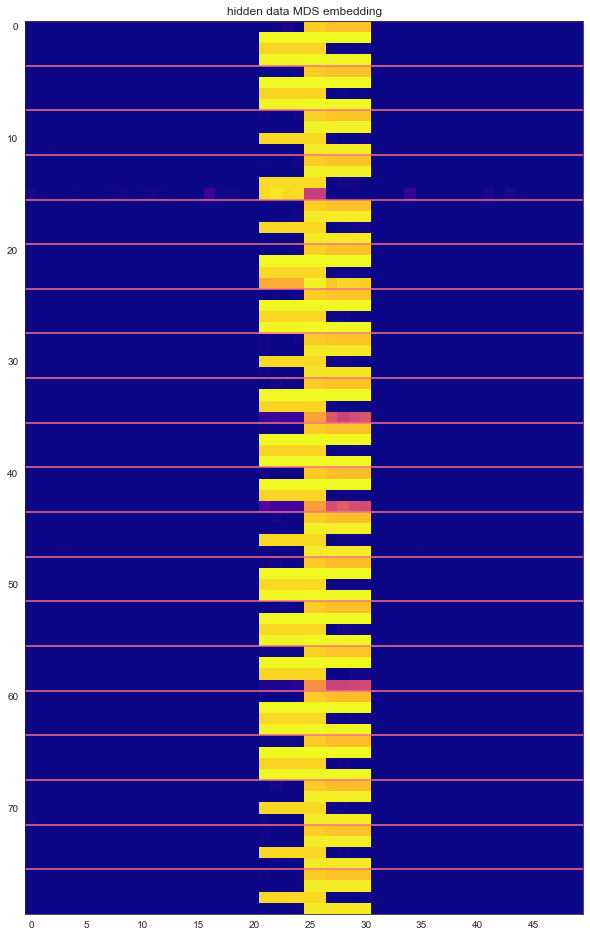

<Figure size 432x288 with 0 Axes>

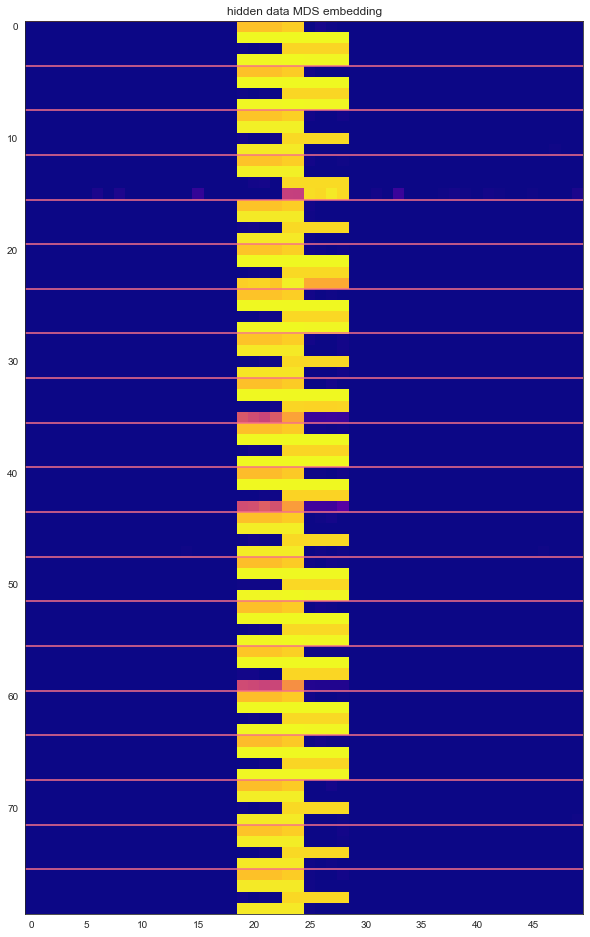

In [246]:
# plt.clf()
# fig, ax = plt.subplots(figsize = (10,20))
# plt.xticks(np.arange(0, 50, 5))
# _ = np.roll(MDS_data["data"], 0, axis=-1)
# im = ax.imshow(_, cmap='plasma')
# [plt.axhline(i*4-0.5) for i in range(20)]
# title = 'hidden data MDS embedding'
# plt.title(title)
# plt.savefig(results_fig_dir + title + '.png')
# plt.show()

plt.clf()
fig, ax = plt.subplots(figsize = (10,20))
_ = np.roll(MDS_data["data"], -1, axis=-1)
plt.xticks(np.arange(0, 50, 5))
im = ax.imshow(np.flip(_,axis=-1), cmap='plasma')
[plt.axhline(i*4-0.5) for i in range(nruns+1)]
title = 'hidden data MDS embedding'
plt.title(title)
plt.savefig(results_fig_dir + title + '.png')
plt.show()

<Figure size 432x288 with 0 Axes>

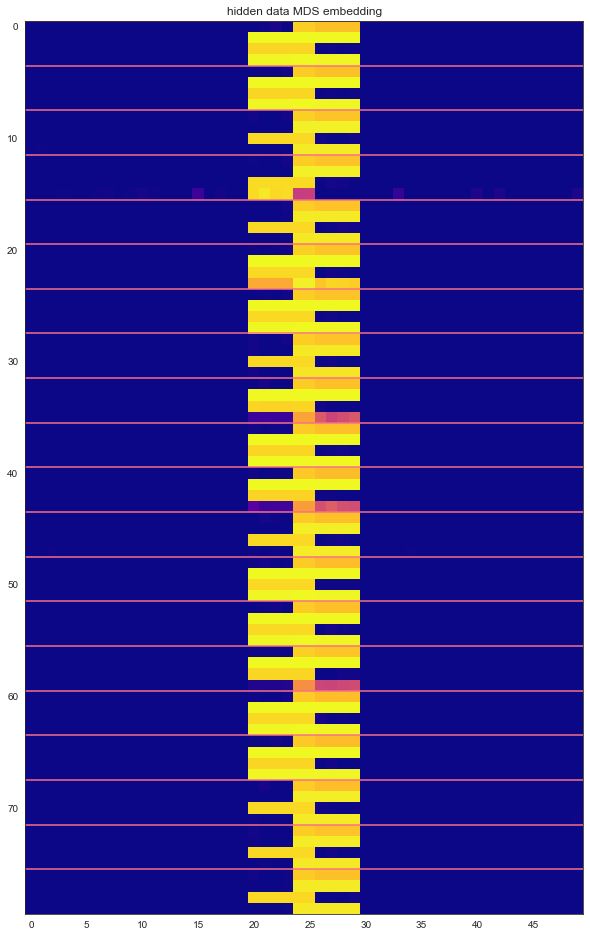

<Figure size 432x288 with 0 Axes>

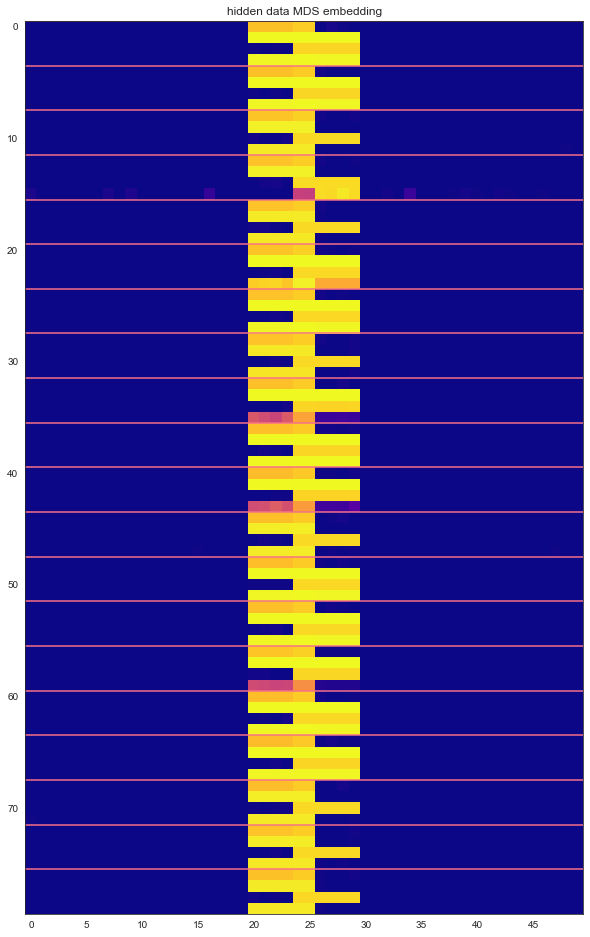

In [237]:
plt.clf()
fig, ax = plt.subplots(figsize = (10,20))
plt.xticks(np.arange(0, 50, 5))
_ = np.roll(MDS_data["data"], -1, axis=-1)
im = ax.imshow(_, cmap='plasma')
[plt.axhline(i*4-0.5) for i in range(20)]
title = 'hidden data MDS embedding'
plt.title(title)
plt.savefig(results_fig_dir + title + '.png')
plt.show()

plt.clf()
fig, ax = plt.subplots(figsize = (10,20))
plt.xticks(np.arange(0, 50, 5))
im = ax.imshow(np.flip(_,axis=-1), cmap='plasma')
[plt.axhline(i*4-0.5) for i in range(20)]
title = 'hidden data MDS embedding'
plt.title(title)
plt.savefig(results_fig_dir + title + '.png')
plt.show()

# Before vs after correlation
<a id='before_vs_after_correlation'></a>

In [86]:
data_train_order

,|Run,$TrialName,order
0,0,med2,first
0,0,med1,none
1,1,med2,first
1,1,med1,none
2,2,med2,first
2,2,med1,none
3,3,med2,first
3,3,med1,none
4,4,med2,first
4,4,med1,none


In [87]:
parameter_values['blocked_interleaved']

'Blocked'

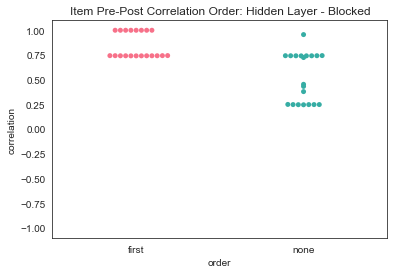

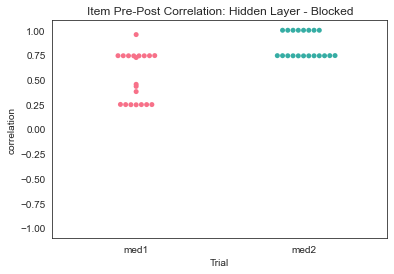

In [88]:


def plot_pre_post_correlation(data, layer):
    plt.clf()
    data=data.reset_index()


    ## get first and last epochs
    first_epoch = data['|Epoch'].min()
    last_epoch = data['|Epoch'].max()

    ## Reorganize the data frame
    data = data[data['|Epoch'].isin([first_epoch, last_epoch])]
    data = data.drop(columns = ['$CurrentTask', 'high1', 'high2', 'low1', 'low2'])
    data = data.melt(var_name='Trial', value_name='actM', value_vars=['med1', 'med2'], id_vars=['|Run', '|Epoch', '$CurrentTest', 'key'] )
    data = data.pivot(index=['|Run', '$CurrentTest', 'key', 'Trial'], columns = '|Epoch', values='actM').reset_index()
    data = data.sort_values(['|Run', '$CurrentTest', 'Trial', 'key'])

    ## Get the correlation values:
    df_pre_post_corr = data.groupby(['|Run', '$CurrentTest','Trial']).corr().reset_index()

    ## Reorganize the dataframe again:
    df_pre_post_corr = df_pre_post_corr.rename(columns={'|Epoch':'pre_post1'})
    df_pre_post_corr = df_pre_post_corr.melt(id_vars = ['|Run', '$CurrentTest', 'Trial', 'pre_post1'], var_name='pre_post2', value_vars=[first_epoch, last_epoch], value_name='correlation')

    ## We only care about correlation pre vs post:
    df_pre_post_corr = df_pre_post_corr[(df_pre_post_corr['pre_post1'] == first_epoch) & (df_pre_post_corr['pre_post2'] == last_epoch)]

    df_pre_post_corr['block'] = parameter_values['blocked_interleaved']

    ## get the order (which trial came first or second)
    df_pre_post_corr_order = pd.merge(data_train_order, df_pre_post_corr, left_on = ['|Run', '$TrialName'], right_on = ['|Run', 'Trial'])

    ## add the trial type

    ## Plot
    sns.swarmplot(x = 'order', y = 'correlation', data = df_pre_post_corr_order)
    plt.ylim(-1.1,1.1)
    title = 'Item Pre-Post Correlation Order: ' + layer.capitalize() + ' Layer - ' + parameter_values['blocked_interleaved']
    plt.title(title)

    plt.savefig(results_fig_dir + title + '.png')
    plt.show()
    
    ## Plot
    plt.clf()
    sns.swarmplot(x = 'Trial', y = 'correlation', data = df_pre_post_corr)
    plt.ylim(-1.1,1.1)
    title = 'Item Pre-Post Correlation: ' + layer.capitalize() + ' Layer - ' + parameter_values['blocked_interleaved']
    plt.title(title)

    plt.savefig(results_fig_dir + title + '.png')
    plt.show()
    return df_pre_post_corr_order


df_pre_post_corr = plot_pre_post_correlation(hiddenData, 'hidden')



In [89]:
df_pre_post_corr.head(10)

,|Run,$TrialName,order,$CurrentTest,Trial,pre_post1,pre_post2,correlation,block
0,0,med2,first,TestColorAll,med2,-1,19,0.742979,Blocked
1,0,med1,none,TestColorAll,med1,-1,19,0.742026,Blocked
2,1,med2,first,TestColorAll,med2,-1,19,0.740840,Blocked
3,1,med1,none,TestColorAll,med1,-1,19,0.740797,Blocked
4,2,med2,first,TestColorAll,med2,-1,19,0.999875,Blocked
5,2,med1,none,TestColorAll,med1,-1,19,0.245860,Blocked
6,3,med2,first,TestColorAll,med2,-1,19,0.999866,Blocked
7,3,med1,none,TestColorAll,med1,-1,19,0.956015,Blocked
8,4,med2,first,TestColorAll,med2,-1,19,0.999872,Blocked
9,4,med1,none,TestColorAll,med1,-1,19,0.249460,Blocked


# Plot # Shared units in hidden layer 
<a id = 'Plot_#_shared_units_in_hidden_layer' ></a>

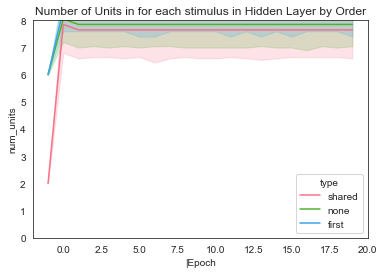

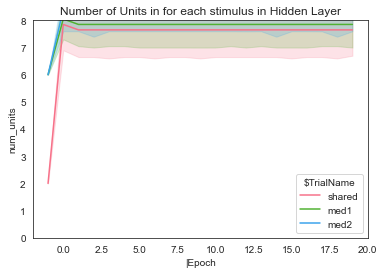

In [90]:
plt.clf()
curr_data = data_test

is_med = curr_data['$TrialName'].isin(['med1','med2'])
curr_data = curr_data[is_med]
hidden_cols = [col for col in curr_data if col.startswith('#HiddenActM[')]

column_names = ['|Run', '|Epoch', '$CurrentTask', '$CurrentTest', '$TrialName']
column_names_all = column_names + hidden_cols


curr_data = curr_data[column_names_all]

curr_data = curr_data.melt(id_vars=column_names, var_name='Unit_Name', value_name='act')
curr_data['act_bool'] = np.where(curr_data['act']> 0.1, 1,0)
curr_data = curr_data.sort_values(column_names)


curr_data_piv = curr_data.pivot(index = ['|Run', '|Epoch', '$CurrentTask', '$CurrentTest', 'Unit_Name'], columns='$TrialName', values='act_bool').reset_index()

curr_data_piv['shared'] = np.where((curr_data_piv['med1'] == 1) & (curr_data_piv['med2'] == 1), 1, 0)
shared_total = curr_data_piv.groupby(['|Run', '|Epoch'])['shared'].sum()
shared_total = shared_total.reset_index()
total_act = curr_data.groupby(['|Run', '|Epoch', '$TrialName'])['act_bool'].sum().reset_index()
total_act = total_act.pivot(index = ['|Run', '|Epoch'], columns='$TrialName', values='act_bool').reset_index()

num_shared_units_df = pd.merge(shared_total, total_act, on = ['|Run', '|Epoch'])
num_shared_units_melt_df = num_shared_units_df.melt(id_vars=['|Run', '|Epoch'], var_name='type', value_name='num_units')

# put in the correct order:
num_shared_units_melt_df = pd.merge(num_shared_units_melt_df, data_train_order, how = 'left',left_on = ['|Run', 'type'], right_on = ['|Run', '$TrialName'])
num_shared_units_melt_df['order'].fillna(num_shared_units_melt_df['type'], inplace = True)
num_shared_units_melt_df = num_shared_units_melt_df.drop(columns = '$TrialName')
num_shared_units_melt_df = num_shared_units_melt_df.rename(columns = {'type': '$TrialName', 'order': 'type'})



#Plot the # of shared vs # of total units in the representation
sns.lineplot(x = '|Epoch', y = 'num_units', data = num_shared_units_melt_df, hue = 'type')
title = 'Number of Units in for each stimulus in Hidden Layer by Order'
plt.title(title)
plt.ylim([0,8])
plt.savefig(results_fig_dir + title + '.png')
plt.show()

#Plot the # of shared vs # of total units in the representation
sns.lineplot(x = '|Epoch', y = 'num_units', data = num_shared_units_melt_df, hue = '$TrialName')
title = 'Number of Units in for each stimulus in Hidden Layer'
plt.title(title)
plt.ylim([0,8])
plt.savefig(results_fig_dir + title + '.png')
plt.show()

num_shared_units_df['blocked_interleaved'] = parameter_values['blocked_interleaved'] 

## Difference score
<a id='within-pair_correlation_minus_across-pair_correlation._Done_in_the_hidden_layer._'></a>
#### within-pair correlation minus across-pair correlation. Done in the hidden layer. 
as in Favila et al 2016, we expect that by the end, the high competition group should have a positive score indicating that the representations are more similar to each other than to other items. Medium overlap should have a negative score, and low overlap should be near zero. 

In [91]:
if medium_only_analysis == False :

    def diff_score(data, layer, analyses_df) :
        title = 'Correlation Difference Score in ' + layer + ' Layer'
        try:
            plt.clf()
            df_diff_score = pd.DataFrame(columns = ['run', 'epoch', 'pair', 'diff_score'])

            #Difference score 
            names = data['firstItem'].unique()
            names = [n[:-1] for n in names]
            names = list(set(names))
            epochs_to_compare = [epoch_end_initial, max_final_epoch]
            for run in range(data_train['|Run'].max()) :
                #for loop run
                for epoch in epochs_to_compare :

                    for cat_overlap in names : 

                        first_item = cat_overlap + '1'
                        second_item = cat_overlap + '2'
                        pair = [first_item, second_item]

                        is_run = data['|Run'] == run
                        is_last_epoch  = data['|Epoch'] == epoch
                        is_first_trial = data['firstItem'] == first_item
                        is_second_trial = data['firstItem'] == second_item


                        #first pairmate, all correlations
                        first_item_all = data[is_first_trial & is_run & is_last_epoch]

                        #within pair correlation
                        within = first_item_all[first_item_all['secondItem'] == second_item]
                        within = within.iloc[0]['correlation']

                        #second pairmate, all correlations
                        second_item_all = data[is_second_trial & is_run & is_last_epoch]

                        #first pairmate, non pair correlations
                        other1 = first_item_all[-first_item_all['secondItem'].isin(pair)]
                        #second pairmate, non pair correlations
                        other2 = second_item_all[-second_item_all['secondItem'].isin(pair)]

                        #put them together and take mean
                        other = other1.append(other2)
                        other_corr_mean = other['correlation'].mean()

                        #calculate difference score
                        difference_score = within - other_corr_mean


                        #add to dataframe
                        temp = [run, epoch, cat_overlap, difference_score]
                        temp_series = pd.Series(temp, index =df_diff_score.columns)
                        df_diff_score = df_diff_score.append(temp_series, ignore_index =True)

            df_diff_score

            sns.barplot(x = 'pair', y = 'diff_score', hue='epoch', data = df_diff_score)
            plt.ylim(-1.5,1.5)

            plt.title(title)

            plt.savefig(results_fig_dir + title + '.png')

            plt.show()

            analyses_df = add_analysis_to_analyses_df(analyses_df, title, True) 
            return df_diff_score, analyses_df
        except:
            traceback.print_exc()
            analyses_df = add_analysis_to_analyses_df(analyses_df, title, False) 
            return "error", analyses_df


    plt.clf()
    df_diff_score_hidden, analyses_df = diff_score(hidden_corr_long, 'Hidden', analyses_df)
    plt.clf()
    df_diff_score_output, analyses_df = diff_score(output_corr_long, 'Color', analyses_df)

## Include only a subset of runs?

In [92]:
# runs_to_include = []
# names = output_corr_long['firstItem'].unique()
# names = [n[:-1] for n in names]
# names = list(set(names))

## if you only want where within pair correlation at end is lower than at baseline: 
# for run in range(nruns) :
#     counter = 0
#     for cat_overlap in names : 

#         first_item = cat_overlap + '1'
#         second_item = cat_overlap + '2'
#         pair = [first_item, second_item]

#         is_run = output_corr_long['|Run'] == run
#         is_last_epoch_baseline  = output_corr_long['|Epoch'] == epoch_end_initial

#         is_last_epoch  = output_corr_long['|Epoch'] == max_final_epoch
#         is_first_trial = output_corr_long['firstItem'] == first_item
#         is_second_trial = output_corr_long['secondItem'] == second_item

#         last = output_corr_long[is_run & is_first_trial & is_second_trial & is_last_epoch][['correlation']]
#         first = output_corr_long[is_run & is_first_trial & is_second_trial & is_last_epoch_baseline][['correlation']]

#         #if it ends lower than it started:
#         if last.iloc[0]['correlation'] < first.iloc[0]['correlation'] :
#             counter = counter + 1


#     if counter == len(names) : 
#         runs_to_include.append(run)

#option 2, if you only want where within/pair correlation ends as negative:

# for run in range(nruns) :
#     counter = 0
#     include = 1
#     for cat_overlap in names : 
#         first_item = cat_overlap + '1'
#         second_item = cat_overlap + '2'
#         pair = [first_item, second_item]

#         is_run = output_corr_long['|Run'] == run
#         is_last_epoch_baseline  = output_corr_long['|Epoch'] == epoch_end_initial

#         is_last_epoch  = output_corr_long['|Epoch'] == max_final_epoch
#         is_first_trial = output_corr_long['firstItem'] == first_item
#         is_second_trial = output_corr_long['secondItem'] == second_item

#         last = output_corr_long[is_run & is_first_trial & is_second_trial & is_last_epoch][['correlation']]
#         first = output_corr_long[is_run & is_first_trial & is_second_trial & is_last_epoch_baseline][['correlation']]

#         if last.iloc[0]['correlation'] > 0 :
            
#             include = 0
#             break
            
    
#     if include == 1 :
#         runs_to_include.append(run)
        

# runs_to_include
# temp = output_corr_long[output_corr_long['|Run'].isin(runs_to_include)]


# analyses_df = plot_correlation_over_time(temp, 'Color', 'TestColorAll', numPairs, analyses_df)
# output_just_main_corr, analyses_df = plot_final_correlation_over_time(temp, 'output', analyses_df) 

# temp = hidden_corr_long[hidden_corr_long['|Run'].isin(runs_to_include)]
# analyses_df = plot_correlation_over_time(temp, 'Color', 'TestColorAll', numPairs, analyses_df)
# output_just_main_corr, analyses_df = plot_final_correlation_over_time(temp, 'output', analyses_df) 

# CENTER OF MASS 
<a id='CENTER_OF_MASS'></a>

In [93]:
def calc_center_of_mass(act_array):
    unit_num = np.arange(1,51)

    weighted = unit_num * act_array
    weighted_sum = weighted.sum()
    mass_sum = act_array.sum() + 1e-30
    center_temp = weighted_sum / mass_sum
    
    return center_temp

In [94]:
def calc_coa_true() :
    numTotalUnits = parameter_values['overlap']['numTotalUnits']
    numOverlapUnits = parameter_values['overlap']['numOverlapUnits'] 

    print("Warning: Assuming med2 output representation starts at index 25")
    unique = numTotalUnits - numOverlapUnits
    true_val_dict = {}
    
    true_val_dict['med1'] = 26
    true_val_dict['med2'] = 26
    
 
    return true_val_dict

true_val_dict = calc_coa_true()

In [95]:


def find_center_of_mass(data, epoch, trial, run, layer) :
#     center_of_mass = np.empty(0)
#     for run in range(data_train['|Run'].max()):
    
    if_curr_run = data_test['|Run'] == run
    if_baseline_epoch = data_test['|Epoch'] == epoch
    if_trial = data_test['$TrialName'] == trial

    if layer == 'output':
        col_str = '#OutActM[' 
    elif layer == 'hidden' :
        col_str = '#HiddenActM['
        

    layer_col = [col for col in data.columns if col.startswith(col_str)]
    
#     if layer == 'output' :
#         layer_col = [col for col in data.columns if col.startswith('#OutActM[')]
#     elif layer == 'hidden' :
#         layer_col = [col for col in data.columns if col.startswith('#HiddenActM[')]

    curr = data_test[if_curr_run & if_baseline_epoch & if_trial][layer_col].reset_index(drop = True)

    curr_np = curr.iloc[[0]].to_numpy()
    
    center_temp = calc_center_of_mass(curr_np)
#     print(curr_np)
    

# #     plt.imshow(curr)
# #     plt.show()

#     unit_num = np.arange(1,51)


#     weighted = unit_num * curr_np
#     weighted_sum = weighted.sum()
#     mass_sum = curr_np.sum()
#     center_temp = weighted_sum / mass_sum
    return center_temp
#     center_of_mass = np.append(center_of_mass, center_temp)
#     return center_of_mass
    

In [96]:

def get_center_mass_df(data, layer) :
    center_of_mass_df = pd.DataFrame(columns = ['run', 'time', 'type','stim', 'layer', 'c_o_m'])

    for run in range(data_train['|Run'].max()) :
        for time in ['pre', 'post'] :
            if time == 'pre' :
                epoch = epoch_end_initial

            elif time == 'post' :
                epoch = max_final_epoch

            for item in ['low1', 'low2', 'med1', 'med2', 'high1', 'high2']:
    #     for item in ['pre_low1', 'pre_low2', 'pre_med1', 'pre_med2' ,'pre_high1', 'pre_high2'] :
    #         itemName = item[4:]

                c_o_a = find_center_of_mass(data, epoch, item, run, layer = layer)
                temp = [run, time, 'raw', item, layer, c_o_a]
                temp_series = pd.Series(temp, index = center_of_mass_df.columns)
                center_of_mass_df = center_of_mass_df.append(temp_series, ignore_index = True)


    return center_of_mass_df


In [97]:

is_output_test = data_test['$CurrentTest'] == 'TestColorAll'
is_output_recall = data_test['$CurrentTask'] == 'TaskColorRecall'

curr_data_test = data_test[is_output_test & is_output_recall]



output_center_of_mass_df = get_center_mass_df(curr_data_test, 'output')
hidden_center_of_mass_df = get_center_mass_df(curr_data_test, 'hidden')

### compare to true center of mass
This can't be done with the hidden layer, since there isn't really a "true" center of mass.

In [98]:
# def read_stim_dat_file_into_dataframe():
#     with open("output_diff_stim.dat", "r") as f:
#         outputfile_external_from_dat = f.readlines()
#         num_output_units = parameter_values['Num_units_per_layer']['Hidden']
#         columns = ["stim"] + [f"ext{i}" for i in range(num_output_units)]
#         outputdatframe_external_from_dat = pd.DataFrame(columns=columns)
#         for idx, row in enumerate(range(-1, -3, -1)[::-1]):
#             line = outputfile_external_from_dat[row].strip('\n').split("\t")
#             outputdatframe_external_from_dat.loc[idx] = ([line[1]] + line[-num_output_units:])
#     return outputdatframe_external_from_dat

In [99]:
# correct_val_df = read_stim_dat_file_into_dataframe()
# correct_val_df


In [100]:
def flip_error(row, true_val_dict):
    
    curr_stim = row['stim']
    
    if curr_stim[-1] == '1' :
        other_stim_n = '2'
    elif curr_stim[-1] == '2' :
        other_stim_n = '1'
        
    other_stim = curr_stim[:-1] + other_stim_n
    
    dist_size = true_val_dict[other_stim] - true_val_dict[curr_stim]

    ### NOTE: THIS ONLY WORKS RIGHT NOW DIST SIZE IS LESS THAN 180
    if dist_size < 0 :
        rev_error = -1 * row['raw_error']
    else :
        rev_error = row['raw_error']

    
    return rev_error 


In [101]:
def calc_error(c_o_a_df_output, true_val_dict) :
    
    c_o_a_df_color =c_o_a_df_output.dropna()

    c_o_a_df_output['true_c_o_m'] = c_o_a_df_output['stim'].map(true_val_dict)
    
    print(c_o_a_df_output)

    c_o_a_df_output['raw_error'] = round(c_o_a_df_output['c_o_m'] - c_o_a_df_output['true_c_o_m'], 5)
    
    c_o_a_df_output['rev_error'] = c_o_a_df_output.apply(lambda row: flip_error(row, true_val_dict), axis=1)
    

    return c_o_a_df_output
    
    ## This is where we'd run 

In [102]:
output_center_of_mass_df = output_center_of_mass_df[output_center_of_mass_df['stim'].isin(['med1','med2'])]
output_center_of_mass_df = calc_error(output_center_of_mass_df, true_val_dict) 

    run  time type  stim   layer  c_o_m  true_c_o_m
2     0   pre  raw  med1  output   26.0          26
3     0   pre  raw  med2  output   26.0          26
8     0  post  raw  med1  output   26.0          26
9     0  post  raw  med2  output   26.0          26
14    1   pre  raw  med1  output   26.0          26
..   ..   ...  ...   ...     ...    ...         ...
213  17  post  raw  med2  output   26.0          26
218  18   pre  raw  med1  output   26.0          26
219  18   pre  raw  med2  output   26.0          26
224  18  post  raw  med1  output   26.0          26
225  18  post  raw  med2  output   26.0          26

[76 rows x 7 columns]


In [103]:
hidden_center_of_mass_df = hidden_center_of_mass_df[hidden_center_of_mass_df['stim'].isin(['med1','med2'])]


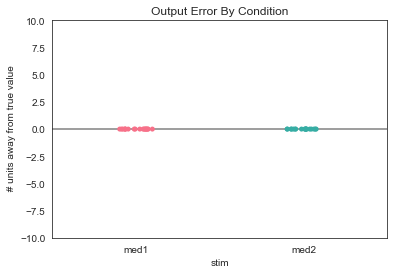

<Figure size 432x288 with 0 Axes>

In [104]:
def plot_error(data) :
    plt.clf()
    is_post = data['time'] == 'post'

    subset_data = data[is_post ]

    sns.stripplot(x='stim', y = 'rev_error',data = subset_data)
    plt.axhline(0, ls = '-', color ='gray')
    title = 'Output Error By Condition'
    plt.title(title)
    plt.ylim([-10,10])
    plt.ylabel(' # units away from true value')
    plt.show()
    plt.savefig(results_fig_dir + title + '.png')


plot_error(output_center_of_mass_df)
    

#### Order effects

In [105]:
output_center_of_mass_df.head()

,run,time,type,stim,layer,c_o_m,true_c_o_m,raw_error,rev_error
2,0,pre,raw,med1,output,26.0,26,0.0,0.0
3,0,pre,raw,med2,output,26.0,26,0.0,0.0
8,0,post,raw,med1,output,26.0,26,0.0,0.0
9,0,post,raw,med2,output,26.0,26,0.0,0.0
14,1,pre,raw,med1,output,26.0,26,0.0,0.0


In [106]:
hidden_center_of_mass_df.head()

,run,time,type,stim,layer,c_o_m
2,0,pre,raw,med1,hidden,24.516846
3,0,pre,raw,med2,hidden,28.453456
8,0,post,raw,med1,hidden,26.499067
9,0,post,raw,med2,hidden,26.499615
14,1,pre,raw,med1,hidden,24.512298


In [107]:
output_center_of_mass_df

,run,time,type,stim,layer,c_o_m,true_c_o_m,raw_error,rev_error
2,0,pre,raw,med1,output,26.0,26,0.0,0.0
3,0,pre,raw,med2,output,26.0,26,0.0,0.0
8,0,post,raw,med1,output,26.0,26,0.0,0.0
9,0,post,raw,med2,output,26.0,26,0.0,0.0
14,1,pre,raw,med1,output,26.0,26,0.0,0.0
...,...,...,...,...,...,...,...,...,...
213,17,post,raw,med2,output,26.0,26,0.0,0.0
218,18,pre,raw,med1,output,26.0,26,0.0,0.0
219,18,pre,raw,med2,output,26.0,26,0.0,0.0
224,18,post,raw,med1,output,26.0,26,0.0,0.0


In [108]:
# output_center_of_mass_df[(output_center_of_mass_df['stim'].isin(['med1','med2'])) & (output_center_of_mass_df['run']==1)]

def find_order(row, data_train_order) :
    plt.clf()

    if parameter_values['blocked_interleaved'] == 'Blocked':
        if row['stim'] == 'med2':
            order = 'first'
        elif row['stim'] == 'med1':
            order = 'none'
            
        ;
    else :
        print('here')
        curr_stim = row['stim']
        curr_run = row['run']
        order = data_train_order[(data_train_order['|Run'] == curr_run) & (data_train_order['$TrialName'] == curr_stim)]['order']   
        order = order.iloc[0]
    return order

output_center_of_mass_df['order'] = output_center_of_mass_df.apply(lambda row : find_order(row, data_train_order), axis = 1)
hidden_center_of_mass_df['order'] = hidden_center_of_mass_df.apply(lambda row : find_order(row, data_train_order), axis = 1)




<Figure size 432x288 with 0 Axes>

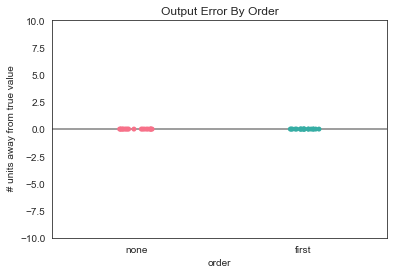

In [109]:
def plot_error_order(data) :
    plt.clf()
    is_post = data['time'] == 'post'

    subset_data = data[is_post]

    sns.stripplot(x='order', y = 'rev_error', data = subset_data)
    plt.axhline(0, ls = '-', color ='gray')
    title = 'Output Error By Order'
    plt.title(title)
    
    plt.ylim([-10,10])
    plt.ylabel(' # units away from true value')
    plt.savefig(results_fig_dir + title + '.png')
    plt.show()


plot_error_order(output_center_of_mass_df)

In [110]:
hidden_center_of_mass_df.head()

,run,time,type,stim,layer,c_o_m,order
2,0,pre,raw,med1,hidden,24.516846,none
3,0,pre,raw,med2,hidden,28.453456,first
8,0,post,raw,med1,hidden,26.499067,none
9,0,post,raw,med2,hidden,26.499615,first
14,1,pre,raw,med1,hidden,24.512298,none


#### Plot distance center of mass - can be done for both color and hidden

In [111]:
def calc_c_o_a_distance(center_of_mass_df, layer) :
    for run in range(data_train['|Run'].max()) :
        for time in ['pre', 'post'] :
            pair = 'med' #this is only for med right now
            is_run = center_of_mass_df['run']==run
            is_time = center_of_mass_df['time']== time

            item1 = pair + '1'
            item2 = pair + '2'

            val2 = center_of_mass_df[is_run & is_time  & (center_of_mass_df['stim'] == item2)][['c_o_m']].to_numpy()
            val1 = center_of_mass_df[is_run & is_time  & (center_of_mass_df['stim'] == item1)][['c_o_m']].to_numpy()

            diff = val2 - val1
            diff = diff[0][0]
            name = pair + '_diff'
            
            if layer != 'hidden' :
                temp = [run, time, 'diff', name, layer, diff, np.nan, np.nan, np.nan, np.nan]

            elif layer == 'hidden' :
                temp = [run, time, 'diff', name, layer, diff, np.nan]

            temp_series = pd.Series(temp, index = center_of_mass_df.columns)

            center_of_mass_df = center_of_mass_df.append(temp_series, ignore_index = True)# for item in ['post_low1', 'post_low2', 'post_med1', 'post_med2' ,'post_high1', 'post_high2'] :

    return center_of_mass_df


In [112]:
def plot_center_of_mass_dist(center_of_mass_df, layer) :
    ## Use try except block to not break the script if there's an error
    ## This is useful for the Post_analyses.py where sometimes we run test parameter searches 
    title = 'Distance Between Center of Masses: ' + layer 
    
    try:
        plt.clf()
#         temp = center_of_mass_df[center_of_mass_df['stim'].isin(['med_diff'])]

#         print(temp.head())
        if study_task_run == 1 :
            ax = sns.violinplot(x="stim", y="c_o_m", hue="time", data=center_of_mass_df, dodge=True)
        elif study_task_run ==0 :
            ax = sns.swarmplot(x = "stim", y="c_o_m", hue="time", data=center_of_mass_df, alpha = .2)

        ax = sns.pointplot(x = "stim", y="c_o_m", hue="time", data=center_of_mass_df, legend = False)
        # sns.swarmplot(x="key", y="value", hue="time", data=temp, color ='white', dodge=True)

        handles, labels = ax.get_legend_handles_labels()
        l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        plt.ylim(0,12)
        plt.ylabel('units apart')
        plt.title(title)
        plt.savefig(results_fig_dir + title + '.png')

        plt.show()

        print('this is assuming just medium overlap condition:')
        units_apart = center_of_mass_df.dropna()
        units_apart[units_apart['time'] == 'post']
#         tstat, pvalue = stats.ttest_1samp(units_apart[units_apart['time'] == 'post']['c_o_m'], 4)
#         print('is post-difference significantly different from 4 (pre training unit apart distance)?')
#         print('t = ' + str(tstat))
#         print('p = ' + str(pvalue))

#         print('pre: ' + str(units_apart[units_apart['time'] == 'pre'].c_o_m.mean()))
#         print('post: ' + str(units_apart[units_apart['time'] == 'post'].c_o_m.mean()))


#         if study_task_run == 1:
#             model = ols('c_o_m ~ C(time)*C(stim)', temp).fit()
#             print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
#             print('----')
#             print('MODEL SUMMARY: ')
#             print(model.summary())
#             print('----')
#             res = sm.stats.anova_lm(model, typ= 2)
#             print(res)

#             analyses_df = add_analysis_to_analyses_df(analyses_df, title, True) 

    except:
        traceback.print_exc()
        analyses_df = add_analysis_to_analyses_df(analyses_df, title, False) 

In [113]:
hidden_center_of_mass_df = calc_c_o_a_distance(hidden_center_of_mass_df, 'hidden')
hidden_distance_df = hidden_center_of_mass_df[hidden_center_of_mass_df['stim'].isin(['med_diff'])]
hidden_distance_df

,run,time,type,stim,layer,c_o_m,order
76,0,pre,diff,med_diff,hidden,3.936610,NaN
77,0,post,diff,med_diff,hidden,0.000547,NaN
78,1,pre,diff,med_diff,hidden,3.953900,NaN
79,1,post,diff,med_diff,hidden,-0.001537,NaN
80,2,pre,diff,med_diff,hidden,3.946265,NaN
81,2,post,diff,med_diff,hidden,0.026138,NaN
82,3,pre,diff,med_diff,hidden,3.943745,NaN
83,3,post,diff,med_diff,hidden,4.397237,NaN
84,4,pre,diff,med_diff,hidden,3.937579,NaN
85,4,post,diff,med_diff,hidden,0.001008,NaN


In [114]:
output_center_of_mass_df

,run,time,type,stim,layer,c_o_m,true_c_o_m,raw_error,rev_error,order
2,0,pre,raw,med1,output,26.0,26,0.0,0.0,none
3,0,pre,raw,med2,output,26.0,26,0.0,0.0,first
8,0,post,raw,med1,output,26.0,26,0.0,0.0,none
9,0,post,raw,med2,output,26.0,26,0.0,0.0,first
14,1,pre,raw,med1,output,26.0,26,0.0,0.0,none
...,...,...,...,...,...,...,...,...,...,...
213,17,post,raw,med2,output,26.0,26,0.0,0.0,first
218,18,pre,raw,med1,output,26.0,26,0.0,0.0,none
219,18,pre,raw,med2,output,26.0,26,0.0,0.0,first
224,18,post,raw,med1,output,26.0,26,0.0,0.0,none


In [115]:
output_center_of_mass_df = calc_c_o_a_distance(output_center_of_mass_df, 'layer')
output_distance_df = output_center_of_mass_df[output_center_of_mass_df['stim'].isin(['med_diff'])]

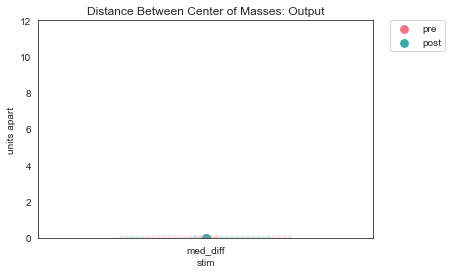

this is assuming just medium overlap condition:


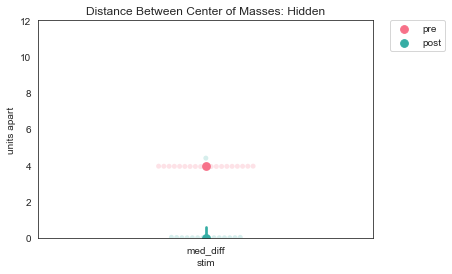

this is assuming just medium overlap condition:


In [116]:
plot_center_of_mass_dist(output_distance_df, 'Output')
plot_center_of_mass_dist(hidden_distance_df, 'Hidden')

In [117]:
def join_center_of_mass_DFs(output_c_m_DF, hidden_c_m_DF) :
    
    output_c_m_DF['layer'] = 'output'
    hidden_c_m_DF['layer'] = 'hidden'

    new_df = output_c_m_DF.append(hidden_c_m_DF)
    
    new_df['overlap'] = parameter_values['overlap']['overlapType']
    return new_df

center_of_mass_df = join_center_of_mass_DFs(output_center_of_mass_df,hidden_center_of_mass_df)


In [118]:
center_of_mass_df

,run,time,type,stim,layer,c_o_m,true_c_o_m,raw_error,rev_error,order,overlap
0,0,pre,raw,med1,output,26.000000,26.0,0.0,0.0,none,2/6
1,0,pre,raw,med2,output,26.000000,26.0,0.0,0.0,first,2/6
2,0,post,raw,med1,output,26.000000,26.0,0.0,0.0,none,2/6
3,0,post,raw,med2,output,26.000000,26.0,0.0,0.0,first,2/6
4,1,pre,raw,med1,output,26.000000,26.0,0.0,0.0,none,2/6
...,...,...,...,...,...,...,...,...,...,...,...
109,16,post,diff,med_diff,hidden,0.000321,NaN,NaN,NaN,NaN,2/6
110,17,pre,diff,med_diff,hidden,3.939042,NaN,NaN,NaN,NaN,2/6
111,17,post,diff,med_diff,hidden,0.023359,NaN,NaN,NaN,NaN,2/6
112,18,pre,diff,med_diff,hidden,3.952077,NaN,NaN,NaN,NaN,2/6


# Pre-Post Comparison

this is better for the Favila task, to see differentiation, since we can't look at distortion in the color layer. 

In [119]:
hidden_corr_long

,|Run,|Epoch,$CurrentTask,$CurrentTest,firstItem,secondItem,correlation,pair,pair_type
0,0,-1,TaskColorWOOsc,TestColorAll,med1,med1,1.000000,med1-med1,identity
1,0,-1,TaskColorWOOsc,TestColorAll,med1,med2,0.259312,med1-med2,med1-med2
2,0,-1,TaskColorWOOsc,TestColorAll,med2,med1,0.259312,med2-med1,redundant
3,0,-1,TaskColorWOOsc,TestColorAll,med2,med2,1.000000,med2-med2,identity
4,0,0,TaskColorRecall,TestColorAll,med1,med1,1.000000,med1-med1,identity
...,...,...,...,...,...,...,...,...,...
1675,19,18,TaskColorRecall,TestColorAll,med2,med2,1.000000,med2-med2,identity
1676,19,19,TaskColorRecall,TestColorAll,med1,med1,1.000000,med1-med1,identity
1677,19,19,TaskColorRecall,TestColorAll,med1,med2,1.000000,med1-med2,med1-med2
1678,19,19,TaskColorRecall,TestColorAll,med2,med1,1.000000,med2-med1,redundant


# Analyze Scene Layer in Association Task
<a id='Scene_Association_Task'></a>

In [120]:
def assign_type_scene(row) :
    scene_dict = {'med1': {'low1_ActM': 'other',
                      'low2_ActM': 'other',
                      'med1_ActM': 'target', 
                      'med2_ActM': 'competitor',
                      'high1_ActM': 'other', 
                      'high2_ActM': 'other'},
            'med2': {'low1_ActM': 'other',
                      'low2_ActM': 'other',
                      'med1_ActM': 'competitor', 
                      'med2_ActM': 'target',
                      'high1_ActM': 'other', 
                      'high2_ActM': 'other'}}
    
    if row['$TrialName'] in scene_dict :
        unit_type = scene_dict[row['$TrialName']][row['unit']]
    else :
        
        unit_type = np.NAN

    return unit_type

print('assuming only med1 and med2 -- every other trial type here set to NAN')



assuming only med1 and med2 -- every other trial type here set to NAN


In [121]:
scene_test = False

In [122]:
def get_scene_act_df() :
    plt.clf()
    scene_columns = [col for col in data_test.columns if col.startswith('#SceneActM')]
    columns = ['|Run', '|Epoch', '$CurrentTask', '$CurrentTest', '|Trial', '$TrialName']
    initial_columns = columns.copy()
    columns.extend(scene_columns)

    is_scene_test = data_test['$CurrentTest']=='TestSceneAll'
    is_Task = data_test['$CurrentTask'] == 'TaskColorRecall'
    is_med = data_test['$TrialName'].isin(['med1','med2'])

    relevant_data = data_test[is_scene_test & is_Task & is_med]
    relevant_data[columns]

    scene_data_df = relevant_data[columns].rename(columns = sceneKeyM)
    scene_data_df = scene_data_df.melt(id_vars = initial_columns, value_name = 'Act_M', var_name = 'unit', value_vars=['low1_ActM','low2_ActM', 'med1_ActM', 'med2_ActM', 'high1_ActM', 'high2_ActM'])
    print(scene_data_df)

    #     scene_data_df['type'] = scene_data_df.apply(lambda row: assign_type_scene(row), axis = 1)
    
    scene_data_df['overlap'] = parameter_values['overlap']['overlapType']
    
    sns.lineplot(x = '|Epoch', y = 'Act_M', hue='type', data = scene_data_df)
    title ='Scene Layer Activity Over Time'
    plt.title(title)
    plt.ylabel('Scene Unit Activity')
    plt.savefig(results_fig_dir + title + '.png')
    plt.show()

    return scene_data_df

if scene_test == True: 
    scene_data_df = get_scene_act_df()


In [123]:

def plot_error_scene_unit_relationship_specific(scene_data_df, center_of_mass_df, scene_unit_type): 

    palette = {'target': [.4 ,.6, .6], 'other': [.8, .4, .3], 'competitor': [.8, .4, .7]}
    final_scene = scene_data_df[scene_data_df['|Epoch'] == scene_data_df['|Epoch'].max()]
    final_scene_specific_unit = final_scene[final_scene['type'] == scene_unit_type]
    final_scene_specific_unit_ave = final_scene_specific_unit.groupby('|Run')['Act_M'].mean().reset_index()

    center_of_mass_post = center_of_mass_df[center_of_mass_df['time'] == 'post']

    center_of_mass_post = center_of_mass_post[center_of_mass_post['stim'].isin(['med_diff'])]
    center_of_mass_post = center_of_mass_post[center_of_mass_post['layer'] == 'output']
    merged_df_scene_error = pd.merge(center_of_mass_post, final_scene_specific_unit_ave, left_on=['run'], right_on=['|Run'])
    ax = sns.regplot(x = 'c_o_m', y = 'Act_M', data = merged_df_scene_error, label = scene_unit_type, color =palette[scene_unit_type])   
    ax.legend()

    #######

def plot_error_scene_unit_relationship(scene_data_df, center_of_mass_df) :
    plt.clf()
    plot_error_scene_unit_relationship_specific(scene_data_df,center_of_mass_df, 'target')
    plot_error_scene_unit_relationship_specific(scene_data_df,center_of_mass_df, 'competitor')
    plot_error_scene_unit_relationship_specific(scene_data_df,center_of_mass_df, 'other')
    ax = plt.gca()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax = plt.axhline(y = 0, ls = '--', color ='grey')

    plt.ylabel('Scene Unit Activity')
    plt.xlabel('# Units Apart')
    plt.ylim(-.1,1)
    title = 'Memory Repulsion and Scene Test'
    plt.title(title)
    plt.show()
    plt.savefig(results_fig_dir + title + '.png')

    #####
    
    for type_overlap in ['competitor', 'target', 'other']:
        plt.clf()
        plot_error_scene_unit_relationship_specific(scene_data_df,center_of_mass_df, type_overlap)
        ax = plt.gca()
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        plt.ylabel('Scene Unit Activity')
        plt.xlabel('# Units Apart')
        plt.ylim(-.1,1)
        plt.axhline(y = 0, ls = '--', color ='grey')

        title = 'Memory Repulsion and Scene Test: ' + type_overlap.capitalize()
        plt.title(title)
        plt.show()
    
    

    
if scene_test == True: 

    plot_error_scene_unit_relationship(scene_data_df, center_of_mass_df)

In [124]:
def get_probability_scene_unit(all_scene_df) :
    
    temp = all_scene_df.groupby(['|Run', '|Epoch', 'type'])['Act_M'].mean().reset_index()
    temp = temp.pivot(index=['|Run', '|Epoch'], columns='type', values='Act_M').reset_index()
    temp['Selected_Scene'] = temp[['competitor', 'other', 'target']].idxmax(axis = 1)
    
    indiv_amounts = temp.groupby(['|Epoch'])['Selected_Scene'].value_counts()
    total_amounts = temp.groupby(['|Epoch']).size()
    probability_scene_df = indiv_amounts.div(total_amounts).reset_index()
    probability_scene_df= probability_scene_df.rename(columns={0: 'probability'})
    return probability_scene_df
    

if scene_test == True: 
    probability_scene_df = get_probability_scene_unit(scene_data_df)

In [125]:
def plot_probability_all(probability_scene_df):
    plt.clf()
    sns.lineplot(x = '|Epoch', y = 'probability', hue='Selected_Scene', data = probability_scene_df)
    title = 'Probability of Choosing Correct Scene Unit'
    plt.title(title)
    plt.ylabel('% trials Unit was chosen')
    plt.xlabel('Epoch')
    plt.show()
    plt.savefig(results_fig_dir + title + '.png')

if scene_test == True: 

    plot_probability_all(probability_scene_df)

# Analyze Pop Up Over Time
<a id='Analyze_Pop_Up_Over_Time'></a>

### Define functions to plot cycles
<a id='Define_functions_to_plot_cycles'></a>

In [126]:

def cycleByEpoch(sceneLayerCycle, selectedEpoch, selectedTrial, ciType, type, scene_palette, numPairs) :
    plt.clf()
    title = 'Scene Layer Cycle ' + type + ': Epoch #' + str(selectedEpoch)

    #CHANGE THIS SO IT's NOT HARD CODED AS 6
    tdata = sceneLayerCycle[sceneLayerCycle['|Epoch'] == selectedEpoch]

    if (numPairs == 2) :
        if (type == 'Ge') : 
            scene_order = ['small1 Ge','small2 Ge','small3 Ge','small4 Ge']

        elif (type == 'Act') :
            scene_order = ['small1','small2','small3','small4']
    elif (numPairs == 3) :
        if (type == 'Ge') : 
            scene_order = ['low1 Ge','low2 Ge','med1 Ge','med2 Ge', 'high1 Ge', 'high2 Ge']

        elif (type == 'Act') :
            scene_order = ['low1', 'low2', 'med1', 'med2', 'high1', 'high2']

    g = sns.lineplot(x="|Cycle", y=selectedTrial,
                 hue="Scene Unit", ci = ciType, palette = scene_palette,hue_order = scene_order,
                 data=tdata)

    g.set_xlabel('Time: Cycle #')

    if (type == 'Act') :
        g.set_ylim(-1, 1.3)
    elif (type == 'Ge') :
        g.set_ylim(-1, 2.5)


    plt.title(title)
    g.axhline(0, ls='-', color ='gray')

    plt.savefig(checkpoint_fig_dir + 'cycle_plots/' + title, bbox_inches = "tight")
    plt.show()
        
    
    
def plotEveryCycle(sceneLayerCycle, selectedTrial, scene_palette, type, numPairs, analyses_df, ciType = 95) :
    
    title = f"plotEveryCycle in {selectedTrial} trial of {type} units"
    try:
        print(ciType)
        for i in range(max(sceneLayerCycle['|Epoch'])) :   
            cycleByEpoch(sceneLayerCycle, i, selectedTrial, ciType, type, scene_palette, numPairs)
        analyses_df = add_analysis_to_analyses_df(analyses_df, title, True) 
    except:
        traceback.print_exc()
        analyses_df = add_analysis_to_analyses_df(analyses_df, title, False) 
    return analyses_df


#### This takes a long time, so default to having it uncommented. It prints out every cycle for each epoch. It takes a while because of the confidence intervals-- So set ciType to be none if you want to speed up, or leave it out to have it be 95% confidence interval.


In [127]:
def prep_cycle_data(data, unit_start, unit_end, layer, key = sceneKey) :

    LayerCycle = data_trn_cyc_stacked.loc[(slice(None),  slice(None), slice(None), slice(None), slice(unit_start, unit_end)),:]

    LayerCycle.head()

    LayerCycle.reset_index(inplace=True) 
    
    if (layer == 'Scene') :
        LayerCycle = LayerCycle.rename(columns={"key": "Scene Unit"})
        LayerCycle["Scene Unit"].replace(key, inplace = True)
    
    return LayerCycle

##### train cycles

In [128]:
# if train_cycle_done == 1 :

#     sceneLayerCycle = prep_cycle_data(data_trn_cyc_stacked, scene_ge_start, scene_ge_end, 'Scene', key = sceneKey_ge)

#     sceneLayerCycle.head()
#     plotEveryCycle(sceneLayerCycle, 'low1', scene_palette_ge, 'Ge', numPairs, ciType= 95) 
    # plotEveryCycle(sceneLayerCycle, 'small2') 
    #plotEveryCycle(sceneLayerCycle, 'small3') 
    #plotEveryCycle(sceneLayerCycle, 'small4') 

In [129]:
if train_cycle_done == 1 :

    sceneLayerCycle = prep_cycle_data(data_trn_cyc_stacked, scene_Start, scene_End, 'Scene', key = sceneKey)

    analyses_df = plotEveryCycle(sceneLayerCycle, 'med1', scene_palette, 'Act', numPairs, analyses_df, ciType= None) 
    # plotEveryCycle(sceneLayerCycle, 'small2') 
    #plotEveryCycle(sceneLayerCycle, 'small3') 
    #plotEveryCycle(sceneLayerCycle, 'small4') 

In [130]:
if train_cycle_done == 1 :
    analyses_df = plotEveryCycle(sceneLayerCycle, 'high1', scene_palette, 'Act', numPairs, analyses_df, ciType= None) 

In [131]:
if train_cycle_done == 1 :
    analyses_df = plotEveryCycle(sceneLayerCycle, 'low1', scene_palette, 'Act', numPairs, analyses_df, ciType= None) 

##### Test cycles

In [132]:
if test_cycle_done == 1 :
    sceneLayerCycle = prep_cycle_data(data_tst_cyc_stacked, scene_Start, scene_End, sceneKey)
    analyses_df = plotEveryCycle(sceneLayerCycle, 'small1', scene_palette, 'Act', analyses_df, ciType= 1) 
    # plotEveryCycle(sceneLayerCycle, 'small2') 
    #plotEveryCycle(sceneLayerCycle, 'small3') 
    #plotEveryCycle(sceneLayerCycle, 'small4') 

## checkpoint for scene layer pop up. 
<a id='checkpoint_for_scene_layer_pop_up.'></a>

In [133]:
if train_cycle_done == 1 :
    is_epoch_start_recall = data_trn_cyc['|Epoch'] == epoch_end_initial + 1
    is_Q1 = data_trn_cyc['|Cycle'].between(0, 24)
    is_Q2 = data_trn_cyc['|Cycle'].between(25, 49)
    is_Q3 = data_trn_cyc['|Cycle'].between(50, 74)
    is_Q4 = data_trn_cyc['|Cycle'].between(75, 99)

    Q1_cycles = data_trn_cyc[is_epoch_start_recall & is_Q1]
    Q2_cycles = data_trn_cyc[is_epoch_start_recall & is_Q2]
    Q3_cycles = data_trn_cyc[is_epoch_start_recall & is_Q3]
    Q4_cycles = data_trn_cyc[is_epoch_start_recall & is_Q4]

    #check that in Q1, only correct unit is active: Q1_just_trial_unit
    Q1_cycles.head()
    Q1_just_trial_unit_list = []
    Q2_just_trial_unit_list = []
    Q3_trial_and_competitor_list = []
    Q3_no_other_unit = [];

    temp = Q1_cycles.groupby(['|Run', '|Epoch', '$TrialName']).mean()[filter_scene]

    for i, v in temp.iterrows() :
        currentTrial = i[2]
        scene_unit_currentTrial = getKeysByValue(sceneKey, currentTrial)
        scene_unit_currentTrial = scene_unit_currentTrial[0]
        if v[scene_unit_currentTrial] > .8 and v.drop(scene_unit_currentTrial).sum() < .1 : 
            Q1_just_trial_unit_list == Q1_just_trial_unit_list.append(True)
        else :
            Q1_just_trial_unit_list == Q1_just_trial_unit_list.append(False)

    if False in Q1_just_trial_unit_list : 
        Q1_just_trial_unit = False
    else :
        Q1_just_trial_unit = True


    Q1_just_trial_unit


    # same thing again for quarter 2: Q2_just_trial_unit

    temp = Q2_cycles.groupby(['|Run', '|Epoch', '$TrialName']).mean()[filter_scene]

    for i, v in temp.iterrows() :
        currentTrial = i[2]
        scene_unit_currentTrial = getKeysByValue(sceneKey, currentTrial)
        scene_unit_currentTrial = scene_unit_currentTrial[0]
        if v[scene_unit_currentTrial] > .8 and v.drop(scene_unit_currentTrial).sum() < .1 : 
            Q2_just_trial_unit_list == Q2_just_trial_unit_list.append(True)
        else :
            Q2_just_trial_unit_list == Q2_just_trial_unit_list.append(False)

    if False in Q2_just_trial_unit_list : 
        Q2_just_trial_unit = False
    else :
        Q2_just_trial_unit = True

    # Q3 - only trial unit and competitor: Q3_trial_and_competitor

    temp = Q3_cycles.groupby(['|Epoch', '$TrialName']).mean()[filter_scene]

    for i, v in temp.iterrows() :
        currentTrial = i[1]
        scene_unit_currentTrial = getKeysByValue(sceneKey, currentTrial)
        scene_unit_currentTrial = scene_unit_currentTrial[0]
        competitor = competitor_trial(currentTrial)
        scene_unit_competitor = getKeysByValue(sceneKey, competitor)
        scene_unit_competitor = scene_unit_competitor[0]
        if v[scene_unit_currentTrial] > .8 and v[scene_unit_competitor] > .1 and v.drop(scene_unit_currentTrial).drop(scene_unit_competitor).sum() < .1 : 
            Q3_trial_and_competitor_list == Q3_trial_and_competitor_list.append(True)
        else :
            Q3_trial_and_competitor_list == Q3_trial_and_competitor_list.append(False)

    if False in Q3_trial_and_competitor_list : 
        Q3_pop_up = False
    else :
         Q3_pop_up = True


    if Q1_just_trial_unit and Q2_just_trial_unit and Q3_pop_up :
        pop_up_ok = True

    else :
        pop_up_ok = False

        # Checkpoint ?? #: is the pop up ok


    temp = ['competitor pop up: scene layer', pop_up_ok, 0, 'is the scene layer pop up correct']
    temp_series = pd.Series(temp, index = checkpoints_df.columns)
    checkpoints_df = checkpoints_df.append(temp_series, ignore_index = True)


### Output Layer: Pop Up
<a id='Output_Layer:_Pop_Up'></a>

In [134]:
def get_output_classification_dictionary():
    output_classes = []
    
    unit_names = list(data_train_stacked.loc[idx[0,0,:,outputM_Start:outputM_End],:].reset_index()['key'])
    for unit in range(50):
        if unit < 6:
            output_classes.append("low1")
        elif unit == 6:
            output_classes.append("low1+2")
        elif unit < 13:
            output_classes.append("low2")
        elif unit < 19:
            output_classes.append("not_active")
        elif unit < 23:
            output_classes.append("med1")
        elif unit < 26:
            output_classes.append("med1+2")
        elif unit < 30:
            output_classes.append("med2")
        elif unit < 36:
            output_classes.append("not_active")
        elif unit < 38:
            output_classes.append("high1")
        elif unit < 43:
            output_classes.append("high1+2")
        elif unit < 45:
            output_classes.append("high2")
        else:
            output_classes.append("not_active")
    output_dict = {unit_names[idx]: unit for idx, unit in enumerate(output_classes)}
    return output_dict

output_classification_dict = get_output_classification_dictionary()
output_classification_dict_Act = {key.replace("ActM", "Act"): value for key, value in output_classification_dict.items()}

output_classification_dict_AvgSLrn = {key.replace("ActM", "AvgSLrn"): value for key, value in output_classification_dict.items()}

output_classification_dict_AvgS = {key.replace("ActM", "AvgS"): value for key, value in output_classification_dict.items()}

output_classification_dict_AvgM = {key.replace("ActM", "AvgM"): value for key, value in output_classification_dict.items()}



In [135]:
if train_cycle_done == 1 :
    #prep the output data 
    output_temp = prep_cycle_data(data_trn_cyc_stacked, output_Start, output_End, 'Color')
    output_temp_multi = output_temp.set_index(['|Run', '|Epoch', '|Cycle', '$CurrentTask', 'key'])
    output_temp_multi = output_temp_multi.stack().unstack(level='key')
    output_cycle = output_temp_multi.reset_index()


    def image_output_cycle(data,epoch,trial, filter_out, analyses_df, run = 'all'):

        plt.clf()
        temp = data[(data['$TrialName'] == trial) & (data['|Epoch'] == epoch)]
        try:
            if (run != 'all') :
                temp = temp[temp['|Run'] == run]
            elif (run == 'all') :
                temp = temp.groupby(['|Cycle', '$TrialName']).mean().drop(['|Run', '|Epoch'],axis = 1)
            temp=temp[filter_out]


            plt.imshow(temp)
            title = 'Output Layer Cycle Act: ' + trial.capitalize() + ' Epoch #' + str(epoch)
            plt.title(title)
            plt.ylabel('Cycle #')
            plt.xlabel('Output Unit #')
            plt.savefig(checkpoint_fig_dir + 'cycle_plots/' + title +'.png', bbox_inches = "tight")

            plt.show()
            analyses_df = add_analysis_to_analyses_df(analyses_df, title, True) 
        except:
            traceback.print_exc()
            analyses_df = add_analysis_to_analyses_df(analyses_df, title, False) 
        return analyses_df



In [136]:
if train_cycle_done == 1:
    for epoch in range(nepochs + 1) :
        analyses_df = image_output_cycle(output_cycle,epoch,'low1', filter_out, analyses_df, run ='all')

In [137]:
if train_cycle_done == 1:
    for epoch in range(nepochs + 1) :
        analyses_df = image_output_cycle(output_cycle,epoch,'med1', filter_out, analyses_df, run = 'all')

In [138]:
if train_cycle_done == 1:
    for epoch in range(nepochs + 1) :
        analyses_df = image_output_cycle(output_cycle,epoch,'high1', filter_out, analyses_df, run = 'all')

In [139]:
## set up output layer cycle data with the output category labels for analysis:
if train_cycle_done == 1 :
    def prepCycleDataOutput(data_trn_cyc_stacked, unit_dict_list, output_S, output_E) :

        outputLayerCycle = data_trn_cyc_stacked.loc[(slice(None),  slice(None), slice(None), slice(None), slice(output_S, output_E)),:]

        outputLayerCycle.reset_index(inplace = True)

        # Categorize the units in each run
        def unitmapper(row):

            try:
                return unit_dict_list[row['key']]

            except:
                ;


        outputLayerCycle.loc[slice(None),"Categorization"] = outputLayerCycle.apply(unitmapper, axis = 1) # use the dictionary to set the category

        # hiddenLayerCycle.head()
        return outputLayerCycle

    outputLayerCycle_act = prepCycleDataOutput(data_trn_cyc_stacked, output_classification_dict_Act, output_Start, output_End)


In [140]:

def plot_categorized_cycle(selectedEpoch, dataLayerCycle, analysisType, Layer, analyses_df, selectedTrial = 'small1', selectedRun = 'all') :
    #if selectedRun is 'all', then it will be an aggragate of all runs. otherwise, set to be a specific run. 
    title = Layer + ' Layer Cycle ' + analysisType + ' ' + selectedTrial.capitalize() + ' Epoch #' + str(selectedEpoch)
    try:
        tdata = dataLayerCycle[dataLayerCycle['|Epoch'] == selectedEpoch]
        plt.clf()
        if (selectedRun != 'all') :

            tdata = tdata[tdata['|Run'] == selectedRun]

        else:
            ;

        g = sns.lineplot(x="|Cycle", y=selectedTrial,
                         hue="Categorization", hue_order = hidd_order, palette = hidden_palette,
                         data=tdata)

        g.set_xlabel('Time')
        g.set_ylim(-1, 1)

        
    #     if analysisType == 'Act':
    #         title = 'Hidden Layer Cycle Activation: ' + selectedTrial.capitalize() + ' Epoch #' + str(selectedEpoch)

    #     elif analysisType == 'AvgM':
    #         title = 'Hidden Layer Cycle AvgM: ' + selectedTrial.capitalize() + ' Epoch #' + str(selectedEpoch)

    #     elif analysisType == 'Ge':
    #         title = 'Hidden Layer Cycle Ge: ' + selectedTrial.capitalize() + ' Epoch #' + str(selectedEpoch)

        plt.title(title)
        g.axhline(0, ls='-', color ='gray')
        g.axhline(0, ls='-', color ='gray')

        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        plt.savefig(checkpoint_fig_dir + 'cycle_plots/' + title + '.png', bbox_inches = "tight")
        plt.show()
        
        analyses_df = add_analysis_to_analyses_df(analyses_df, title, True) 
    except:
        traceback.print_exc()
        analyses_df = add_analysis_to_analyses_df(analyses_df, title, False) 
        
    return analyses_df


In [141]:
if train_cycle_done ==1 :
    analyses_df = plot_categorized_cycle(epoch_end_initial+1, outputLayerCycle_act, 'Act', 'Color', analyses_df, selectedTrial = 'low1', selectedRun='all')
    analyses_df = plot_categorized_cycle(epoch_end_initial+1, outputLayerCycle_act, 'Act', 'Color', analyses_df, selectedTrial = 'med1', selectedRun='all')
    analyses_df = plot_categorized_cycle(epoch_end_initial+1, outputLayerCycle_act, 'Act', 'Color', analyses_df, selectedTrial = 'high1', selectedRun='all')



### Hidden Layer: Pop Up
<a id='Hidden_Layer:_Pop_Up'></a>
##### First, Assign units by initial activation
<a id='First,_Assign_units_by_initial_activation'></a>

NOTES FOR THIS: 
final test epoch in the TaskColorWOOsc task, a hidden unit will get classified depending on activation. That classification get's applied on a per-run basis (since the activation patterns will be different each time)

"active" means minus phase activation above .01. 

* same1 = units only active for same1
* same2 = units only active for same2
* same12 = units active for same 1 and same 2 (but not same 3 or same 4)
* same3 = units only active for same 3
* same4 = units only active for same 4
* same34 = units active for same 3 and same 4 (but not same 1 or same 2)
* not active = units that have no activity for same1, 2, 3, or 4
* cross-pair = units that don't fall into the above (i.e. active for same 1 and same 3)

Eventually will use with hiddenData, stacked dataframe, to get average activation and cycle over time for each of the above groups. Maybe best for now to have the above categories as keys in a dictionary?

Note -- this process has to be done *separately* for each 'run', since the units active for each trial will change for each run. 

The data to look at this is in the variable 'hiddenData', which is just a subset of data_test_stacked, but only includes the hiddenActM rows. We want to specifically categorize based on activation from the final epoch run in TaskColorWOOsc. So, if the highest epoch number in that task is 5, you get just those trials with the following line of code (where .loc takes an input for each of index of the hierarchical)

hiddenData.loc[(slice(None), 5, 'TaskColorWOOsc', slice(None)), :]

### classify units

In [142]:
# Get a list of the names of columns storing hidden unit values
hiddenunitnames = []

for rowname in hiddenData.loc[(0, epoch_end_initial, slice(None), 'TestColorAll', slice(None)), :]["low1"].index.values:
    hiddenunitnames.append(rowname[-1])
    
def get_hidden_id(unit_name, hidden_dimensions = hidden_dimensions):
    if hidden_dimensions == 1:
        xy = (unit_name.split(":")[1].split(",")[-1].split("]")[0] )
        return int(xy)  
    elif hidden_dimensions == 2:
        xy = list(unit_name.split(":")[1][:3])
        return int(xy[0]) * 10 + int(xy[2])

def get_scene_id(unit_name):
    xy = list(unit_name.split(":")[1][:7])
    return int(xy[0]) * 3 + int(xy[6])

In our previous scheme, units that were active in [high1, high2, med1] trials were classified as cross-pair. I classified these as [high1, high2] because they are active in both similar trials. We can remove this, but I think this removes a lot of the noise in the cross-pair hidden units.



In [143]:
def classify_units(activeunits, unit_dict, name):
    def are_units_active(units, where): # units have to be active in all of these trials to return True
        for unit in units:
            if unit not in units:
                return False
        return True 
    if hidden_dimensions == 1:
        hidden_unit_id = get_hidden_id(name)
        if 22 <= hidden_unit_id <= 25:
            unit_dict['med1'].append(name)
        elif 26 <= hidden_unit_id <= 27:
            unit_dict['med1+2'].append(name)
        elif 28 <= hidden_unit_id <= 31:
            unit_dict['med2'].append(name)
        else:
            unit_dict['not active'].append(name)
    elif hidden_dimensions == 2:
        where = list(np.where(np.array(activeunits.iloc[0]))[0])
        if numPairs == 3:
            if where == [0]:
                unit_dict['high1'].append(name)
            elif where == [1]:
                unit_dict['high2'].append(name)
            elif where == [0,1]:
                unit_dict['high1+2'].append(name)
            elif where == [2]:
                unit_dict['low1'].append(name)
            elif where == [3]:
                unit_dict['low2'].append(name)
            elif where == [2,3]:
                unit_dict['low1+2'].append(name)
            elif where == [4]:
                unit_dict['med1'].append(name)
            elif where == [5]:
                unit_dict['med2'].append(name)
            elif where == [4,5]:
                unit_dict['med1+2'].append(name)
            elif where == []:
                unit_dict['not active'].append(name)
            else:
                unit_dict["cross-pair"].append(name)
    #             if are_units_active([0, 1], where):
    #                 unit_dict['high1+2'].append(name)
    #             elif are_units_active([2, 3], where):
    #                 unit_dict['low1+2'].append(name)
    #             elif are_units_active([4, 5], where):
    #                 unit_dict['med1+2'].append(name)
    #             else:
    #                 print(where)
    #                 unit_dict["cross-pair"].append(name)

        elif numPairs == 2:
            if where == [0]:
                unit_dict['small1'].append(name)
            elif where == [1]:
                unit_dict['small2'].append(name)
            elif where == [0,1]:
                unit_dict['small12'].append(name)
            elif where == [2]:
                unit_dict['small3'].append(name)
            elif where == [3]:
                unit_dict['small4'].append(name)
            elif where == [2,3]:
                unit_dict['small34'].append(name)
            elif where == []:
                unit_dict['not active'].append(name)
            else:
                unit_dict["cross-pair"].append(name)
    return unit_dict

In [144]:
if train_trial_done == 1:
    unit_dict_list = [] # a list of all unit dictionaries for every run

    threshold_hid_act = .5 #threshold above which to consider activity. was .1 initially.
    for run in range(nruns +1): # because we index from 0 and nruns = Max Run (9)

        unit_dict = defaultdict(list) # a dictionary for every run
        for name in hiddenunitnames:
    #         name_noM = name.replace('M', '') #because for cycle activity, there's no M

            activeunits = hiddenData.loc[(run, epoch_end_initial+1, slice(None), 'TestColorAll', name), :] > threshold_hid_act
            unit_dict = classify_units(activeunits, unit_dict, name)
        unit_dict_list.append(unit_dict)
    #     for k in ['small1', 'small2', 'small12', 'small3', 'small4', 'small34','not active','cross-pair']:
    #          print(k, unit_dict[k])
    #     break


    #["$TrialName",:]

    unit_dict_list_2 = [] # reverse key, so each unit is the key and the value is the category
    for run in range(nruns +1) : 

        temp = {v_0:k for k, v in unit_dict_list[run].items() for v_0 in v}
        unit_dict_list_2.append(temp)

In [145]:
def new_unit_dict(nruns, unit_dict_list_2, to_be_replaced, to_replace): #iterates over each run
    new_dict_list =  [None] * (nruns+1)

    for n in range(nruns+1) :
        new_dict_list[n] = print_dict(unit_dict_list_2[n], to_be_replaced, to_replace)
    
    return new_dict_list

def print_dict(d, to_be_replaced, to_replace): #iterates over each unit, within one run. 
    new = {}
    for k, v in d.items():
        if isinstance(v, dict):
            v = print_dict(v)
        new[k.replace(to_be_replaced, to_replace)] = v
    return new


#replace the keys for the relevant analyses
unit_dict_list_act = new_unit_dict(nruns, unit_dict_list_2, 'M', '')   #because in cycle data, there's no actM, it's just Act
unit_dict_list_actM = new_unit_dict(nruns, unit_dict_list_2, '', '')   #because in cycle data, there's no actM, it's just Act
unit_dict_list_avgM = new_unit_dict(nruns, unit_dict_list_2, 'ActM', 'AvgM')   #because in cycle data, there's no actM, it's just Act
unit_dict_list_avgS = new_unit_dict(nruns, unit_dict_list_2, 'ActM', 'AvgS')   #because in cycle data, there's no actM, it's just Act
unit_dict_list_ge = new_unit_dict(nruns, unit_dict_list_2, 'ActM', 'Ge')
unit_dict_list_AvgSLrn = new_unit_dict(nruns, unit_dict_list_2, 'ActM', 'AvgSLrn')   #because in cycle data, there's no actM, it's just Act



In [146]:
unit_dict_list_AvgSLrn

[{'#HiddenAvgSLrn[2:0,0]<2:1,50>': 'not active',
  '#HiddenAvgSLrn[2:0,1]': 'not active',
  '#HiddenAvgSLrn[2:0,2]': 'not active',
  '#HiddenAvgSLrn[2:0,3]': 'not active',
  '#HiddenAvgSLrn[2:0,4]': 'not active',
  '#HiddenAvgSLrn[2:0,5]': 'not active',
  '#HiddenAvgSLrn[2:0,6]': 'not active',
  '#HiddenAvgSLrn[2:0,7]': 'not active',
  '#HiddenAvgSLrn[2:0,8]': 'not active',
  '#HiddenAvgSLrn[2:0,9]': 'not active',
  '#HiddenAvgSLrn[2:0,10]': 'not active',
  '#HiddenAvgSLrn[2:0,11]': 'not active',
  '#HiddenAvgSLrn[2:0,12]': 'not active',
  '#HiddenAvgSLrn[2:0,13]': 'not active',
  '#HiddenAvgSLrn[2:0,14]': 'not active',
  '#HiddenAvgSLrn[2:0,15]': 'not active',
  '#HiddenAvgSLrn[2:0,16]': 'not active',
  '#HiddenAvgSLrn[2:0,17]': 'not active',
  '#HiddenAvgSLrn[2:0,18]': 'not active',
  '#HiddenAvgSLrn[2:0,19]': 'not active',
  '#HiddenAvgSLrn[2:0,20]': 'not active',
  '#HiddenAvgSLrn[2:0,21]': 'not active',
  '#HiddenAvgSLrn[2:0,32]': 'not active',
  '#HiddenAvgSLrn[2:0,33]': 'not act

### How Many in each category
<a id='How_Many_in_each_category'></a>

['cross-pair', 'high1', 'high1+2', 'high2', 'low1', 'low1+2', 'low2', 'med1', 'med1+2', 'med2', 'not active']


<Figure size 432x288 with 0 Axes>

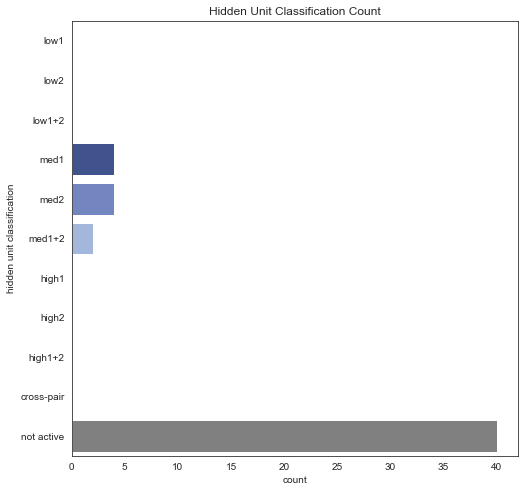

In [147]:
def plot_number_of_units_per_category(analyses_df):
    title = 'Hidden Unit Classification Count'
    try:
        plt.clf()
        ## how many in each category?
        catList = []
        catNames = ['low1','low2', 'low1+2', 'med1','med2', 'med1+2', 'high1','high2', 'high1+2', 'not active' ,'cross-pair']
        for cat in catNames:
            catList.append(cat)

        catList.sort()

        print(catList)

        hiddCountDf = pd.DataFrame(columns = catList, index = range(nruns) )

        for r in range(nruns+1) : 

            count_dict = defaultdict(int)

            for cat in unit_dict_list[r] :


                count = len(unit_dict_list[r][cat])


                count_dict[cat] = count
        #     print(pd.Series(count_dict))
            hiddCountDf.loc[r] = pd.Series(count_dict)

        hiddCountDf = hiddCountDf.reset_index()
        hiddCountDf = hiddCountDf.rename(columns={'index':'run'})

        pd.set_option('display.max_columns', 30)

        # hiddCountDf.set_index('run').stack().unstack(level = 'run')

        # b = hiddCountDf.set_index('run').stack()

        # b = pd.DataFrame(b)
        # b
        plt.clf

        hiddCountDf_melt = hiddCountDf.melt(id_vars =['run']).sort_values(by=['run'])

        hiddCountDf_melt
        fig = plt.figure(figsize=(8,8))
        ax = sns.barplot(x="value", y="variable", data=hiddCountDf_melt, palette = hidden_palette, order = hidd_order)
        ax.set_xlabel('count')
        ax.set_ylabel('hidden unit classification')
        
        plt.title(title)
        plt.savefig(checkpoint_fig_dir + title + '.png', bbox_inches = "tight")
        plt.show()
        
        analyses_df = add_analysis_to_analyses_df(analyses_df, title, True) 
        return hiddCountDf_melt, analyses_df
    except:
        analyses_df = add_analysis_to_analyses_df(analyses_df, title, False) 
        return "error", analyses_df 

if train_trial_done == 1:
    hiddCountDf_melt, analyses_df = plot_number_of_units_per_category(analyses_df)

In [148]:
## checkpoint # ? Check that hidden layer has minimum units assigned to each category
if train_trial_done == 1:
    hiddCountDf_melt['threshold'] = hiddCountDf_melt.value >= 0

    #just conditions we care about
    hiddCountDf_melt2 = hiddCountDf_melt[~hiddCountDf_melt['variable'].isin(['cross-pair', 'not active'])]
    
    #for each run, is the condition met fully (i.e. threshold = 1)
    percent_condition_met_by_run = hiddCountDf_melt2.groupby('run').mean()
    
    runs_condition_not_met = percent_condition_met_by_run[percent_condition_met_by_run['threshold']!=1]
    runs_condition_met = percent_condition_met_by_run[percent_condition_met_by_run['threshold']==1]

    num_runs_condition_not_met = len(runs_condition_not_met)
    num_runs_condition_met = len(runs_condition_met)
    #acrosss all runs, what percent of runs had some units assigned to each category?
    percent_conditions = num_runs_condition_met / (num_runs_condition_met + num_runs_condition_not_met)
    print('runs with units assigned to each category:\n ' + str(percent_conditions * 100) + '%')
    threshold_not_met = sum(hiddCountDf_melt2['threshold']==False) # number of times the minimum wasn't met. 

    if threshold_not_met >0 :
        checkpoint_TF = False
    else :
        checkpoint_TF = True
    temp = ['hidden unit count ', checkpoint_TF, percent_conditions * 100, 'Check that hidden layer has some units assigned to each category. Value is the percent of runs that have units for each category']
    temp_series = pd.Series(temp, index = checkpoints_df.columns)
    checkpoints_df = checkpoints_df.append(temp_series, ignore_index = True)


runs with units assigned to each category:
 0.0%


In [149]:
## set up hidden layer cycle data with the hidden category labels for analysis:

def prepCycleDataHidden(data_trn_cyc_stacked, unit_dict_list, hidden_S, hidden_E) :
    
    hiddenLayerCycle = data_trn_cyc_stacked.loc[(slice(None),  slice(None), slice(None), slice(None), slice(hidden_S, hidden_E)),:]

    hiddenLayerCycle.reset_index(inplace = True)

    # Categorize the units in each run
    def unitmapper(row):
        
        try:
            return unit_dict_list[row["|Run"]][row['key']]

        except:
            ;

    
    hiddenLayerCycle.loc[slice(None),"Categorization"] = hiddenLayerCycle.apply(unitmapper, axis = 1) # use the dictionary to set the category
    # hiddenLayerCycle.head()
    return hiddenLayerCycle


In [150]:
if train_cycle_done == 1 :
    print('prepping activity for hidden layer')
    hiddenLayerCycle_act = prepCycleDataHidden(data_trn_cyc_stacked, unit_dict_list_act, hidden_Start, hidden_End)

    print('prepping AvgM for hidden layer')
#     hiddenLayerCycle_ge = prepCycleDataHidden(data_trn_cyc_stacked, unit_dict_list_ge, hidden_ge_start, hidden_ge_end)
    hiddenLayerCycle_AvgM = prepCycleDataHidden(data_trn_cyc_stacked, unit_dict_list_avgM, hidden_Start_AvgM, hidden_End_AvgM)
    print('prepping AvgS for hidden layer')

    hiddenLayerCycle_AvgS = prepCycleDataHidden(data_trn_cyc_stacked, unit_dict_list_avgS, hidden_Start_AvgS, hidden_End_AvgS)


### Plot the hidden layer pop up
<a id='Plot_the_hidden_layer_pop_up'></a>

In [151]:

if train_cycle_done == 1 :
    for epoch in range(10) :
        analyses_df = plot_categorized_cycle(epoch, hiddenLayerCycle_act, 'Act', 'Hidden', analyses_df, selectedTrial = 'med1', selectedRun=0)


In [152]:

if train_cycle_done == 1 :
    for epoch in range(10) :
        analyses_df = plot_categorized_cycle(epoch, hiddenLayerCycle_act, 'Act', 'Hidden', analyses_df, selectedTrial = 'med1', selectedRun='all')

In [153]:
if train_cycle_done == 1 :
    

    analyses_df = plot_categorized_cycle(epoch_end_initial+1, hiddenLayerCycle_AvgM, 'AvgM', 'Hidden', analyses_df, selectedTrial = 'low1', selectedRun='all')
    analyses_df = plot_categorized_cycle(epoch_end_initial+1, hiddenLayerCycle_AvgS, 'AvgS', 'Hidden', analyses_df, selectedTrial = 'low1', selectedRun='all')

    analyses_df = plot_categorized_cycle(epoch_end_initial+1, hiddenLayerCycle_AvgM, 'AvgM', 'Hidden', analyses_df, selectedTrial = 'med1', selectedRun='all')
    analyses_df = plot_categorized_cycle(epoch_end_initial+1, hiddenLayerCycle_AvgS, 'AvgS', 'Hidden', analyses_df, selectedTrial = 'med1', selectedRun='all')

    analyses_df = plot_categorized_cycle(epoch_end_initial+1, hiddenLayerCycle_AvgM, 'AvgM', 'Hidden', analyses_df, selectedTrial = 'high1', selectedRun='all')
    analyses_df = plot_categorized_cycle(epoch_end_initial+1, hiddenLayerCycle_AvgS, 'AvgS', 'Hidden', analyses_df, selectedTrial = 'high1', selectedRun='all')

## Hidden Layer Pop Up over cycles PROPORTIONALLY -- 
#### i.e. each value on the y axis is that hidden layer unit types proportion of total activity during that cycle. This is useful to account for each type having different number of units. Also, we can see if the pop up is happening for all categories, or specifically the pairmate category of units. 
<a id='Hidden_Layer_Pop_Up_over_cycles_PROPORTIONALLY'></a>

In [154]:
# ### Analyze hidden pop up relatively-- so that fewer units are taken into account. 
# temp = hiddenLayerCycle
# temp = temp.set_index(['|Run', '|Epoch', '|Cycle', 'key'])
# temp = temp.drop(columns = ['$CurrentTask'])
# temp.head()

# #get the sum activity for each hidden category, at each cycle
# sumEachCategory = temp.groupby(['|Run', '|Epoch', '|Cycle','hiddenCat']).sum();
# sumEachCategory.head()

# #get the sum activity for all units at each cycle
# sumEachCycle = sumEachCategory.groupby(['|Run', '|Epoch', '|Cycle']).sum()

# #divide to get each hidden category percentage of total activity. 
# percentHiddenAct = sumEachCategory.div(sumEachCycle)

# percentHiddenAct = percentHiddenAct.reset_index()

# percentHiddenAct

In [155]:
# percentHiddenAct

## XCAL
<a id='XCAL'></a>

### AvgSLrn

#### some necessary set up for avgslrn


In [156]:
#some necessary set up for avgslrn
data_train['pair'] = data_train['$TrialName'].apply(lambda x: x[:-1])
    
#which trial in each pair comes first in train trials?
first_each_epoch_train = data_train.loc[data_train.groupby(['|Run', '|Epoch','pair'])['|Trial'].idxmin()][['|Run','|Epoch', 'pair', '$TrialName']]
first_each_epoch_train = first_each_epoch_train.sort_values(by=['|Run', '|Epoch'])


#### function definitions


In [157]:
# def get_selected_output_activity(run, data, epoch, trial_type, first_unit_type, printvals = False) :

#     run_activity_df = pd.DataFrame(columns = ['run', 'trial', 'unit_assignment', 'activity'])
    
#     activity_runs = np.empty(0);

#     if run == 'all' :
#         runs_to_do = range(data_train_stacked.index.get_level_values(0).max() + 1)
#     else : 
#         runs_to_do = [run]

#     for r in runs_to_do :
#         #get units we care about:
#         first_units = getKeysByValue(output_classification_dict_AvgSLrn, first_unit_type) # med 2 units
        
#         #get activations for these units during the first trial of trial_type during the recall task
#         trial_first_units =data.loc[idx[r,epoch,:,first_units], [trial_type]]

#         #reshape these to be nx1 and 1xn so we can do dot products
#         trial_first_units_reshape = trial_first_units[[trial_type]].values

#         if printvals == True :
#             print('run = ' + str(r))
#             print(first_unit_type + ' activations:\n')
#             print(trial_first_units_reshape)
        
#         temp_series = pd.Series([r, trial_type, first_unit_type, np.mean(trial_first_units_reshape)], index = run_activity_df.columns)
#         run_activity_df = run_activity_df.append(temp_series, ignore_index = True)
#         #activity_runs = np.append(activity_runs, trial_first_units)
#     return (run_activity_df)

# def get_selected_hidden_activity(run, data,  epoch,trial_type, first_unit_type, printvals = False) :

#     run_activity_df = pd.DataFrame(columns = ['run', 'trial', 'unit_assignment', 'activity'])
    
#     activity_runs = np.empty(0);

#     if run == 'all' :
#         runs_to_do = range(data_train_stacked.index.get_level_values(0).max() + 1)
#     else : 
#         runs_to_do = [run]

#     for r in runs_to_do :
#         #get units we care about:
#         first_units = getKeysByValue(unit_dict_list_AvgSLrn[r], first_unit_type) # med 2 units

#         #get activations for these units during the first trial of trial_type during the recall task
#         trial_first_units =data.loc[idx[r,epoch,:,first_units], [trial_type]]

#         #reshape these to be nx1 and 1xn so we can do dot products
#         trial_first_units_reshape = trial_first_units[[trial_type]].values

#         if printvals == True :
#             print('run = ' + str(r))
#             print(first_unit_type + ' activations:\n')
#             print(trial_first_units_reshape)
        
#         temp_series = pd.Series([r, trial_type, first_unit_type, np.mean(trial_first_units_reshape)], index = run_activity_df.columns)
#         run_activity_df = run_activity_df.append(temp_series, ignore_index = True)
#         #activity_runs = np.append(activity_runs, trial_first_units)
#     return (run_activity_df)

In [158]:
def plot_selected_AvgSLrn(Layer, data, epoch, analyses_df) :
    title = 'Competitor AvgSLrn in ' + Layer + ' layer, epoch #' + str(epoch)
    try:
        if Layer == 'Color' :
            med, med_all = get_selected_output_activity_first_trial('all', data_train_stacked, epoch, 'med', 'Color', printvals = False)
            low, low_all = get_selected_output_activity_first_trial('all', data_train_stacked,  epoch,'low', 'Color',printvals = False)
            high, high_all = get_selected_output_activity_first_trial('all', data_train_stacked,  epoch,'high', 'Color', printvals = False)
        elif Layer == 'Hidden' :
            med, med_all = get_selected_output_activity_first_trial('all', data_train_stacked, epoch, 'med', 'Hidden', printvals = False)
            low, low_all = get_selected_output_activity_first_trial('all', data_train_stacked,  epoch,'low', 'Hidden',printvals = False)
            high, high_all = get_selected_output_activity_first_trial('all', data_train_stacked,  epoch,'high', 'Hidden', printvals = False)
        elif Layer == 'Scene' :
            med, med_all = get_selected_output_activity_first_trial('all', data_train_stacked, epoch, 'med', 'Scene', printvals = False)
            low, low_all = get_selected_output_activity_first_trial('all', data_train_stacked,  epoch,'low', 'Scene',printvals = False)
            high, high_all = get_selected_output_activity_first_trial('all', data_train_stacked,  epoch,'high', 'Scene', printvals = False)

        all_competitors = pd.concat([low,med,high], axis = 0)
        all_AvgSLrn_connections = pd.concat([low_all, med_all, high_all], axis = 0 )
        if study_task_run == 1 :
            sns.boxplot(x = 'pair', hue = 'targ', y = 'activity', data = all_competitors)
        
        elif study_task_run == 0 :
        
            sns.barplot(x = 'pair', hue = 'targ', y = 'activity', data = all_competitors)

#         sns.swarmplot(x = 'pair', hue = 'targ', y = 'activity', data = all_competitors)
        plt.title(title)
        plt.ylim(0,1)
        plt.ylabel('AvgSLrn')
        plt.savefig(checkpoint_fig_dir + title + '.png', bbox_inches = "tight")
        plt.show()


        analyses_df = add_analysis_to_analyses_df(analyses_df, title, True) 

        return all_competitors, all_AvgSLrn_connections, analyses_df

    except Exception as e:
        analyses_df = add_analysis_to_analyses_df(analyses_df, title, False) 
        traceback.print_exc()

        return "error", "error", analyses_df



In [159]:

def get_selected_output_activity_first_trial(run, data,  epoch,pair, Layer, printvals = False) :
    run_activity_df = pd.DataFrame(columns = ['run', 'epoch', 'pair', 'trial', 'unit', 'targ', 'activity'])

    activity_runs = np.empty(0);

    if run == 'all' :
        runs_to_do = range(data_train_stacked.index.get_level_values(0).max() + 1)
    else : 
        runs_to_do = [run]

    all_connections_df = pd.DataFrame()
    
    for r in runs_to_do  :
        is_run = first_each_epoch_train['|Run'] == r
        is_epoch = first_each_epoch_train['|Epoch'] == epoch
        is_pair = first_each_epoch_train['pair'] == pair
        
        
        curr_first_trial = first_each_epoch_train[is_run & is_epoch & is_pair]['$TrialName'].to_string(index=False)
        if curr_first_trial[0] == ' ': #weird bug where there's a space first...
            curr_first_trial = curr_first_trial[1:]


        if curr_first_trial[-1:] == '1' :
            target = curr_first_trial
            competitor = pair + '2' 

        elif curr_first_trial[-1:] == '2' :
            target = curr_first_trial
            competitor = pair + '1'

        shared = pair +'1+2'
        
        if Layer == 'Color' :
            u_dict = output_classification_dict_AvgSLrn
        elif Layer == 'Hidden' :
            u_dict = unit_dict_list_AvgSLrn[r]
        elif Layer == 'Scene' :
            u_dict = sceneKey_AvgSLrn
            
        #get units we care about:
        competitor_units = getKeysByValue(u_dict, competitor) # med 2 units
        target_units = getKeysByValue(u_dict, target) # med 2 units
        
        if Layer != 'Scene' :
            shared_units = getKeysByValue(u_dict, shared) # med 2 units
            
        #get activations for these units during the first trial of trial_type during the recall task
        trial_competitor_act =data.loc[idx[r,epoch,:,competitor_units], [curr_first_trial]]

        trial_target_act =data.loc[idx[r,epoch,:,target_units], [curr_first_trial]]

        if Layer != 'Scene' :
            trial_shared_act =data.loc[idx[r,epoch,:,shared_units], [curr_first_trial]]

        list_of_non_pair_units = []
        for k, v in u_dict.items() :
            if v == target or v == competitor or v == shared:
                continue;
            else:
#                 if Layer == 'Hidden' :
                list_of_non_pair_units.append(k)


            
        trial_non_pair_act =data.loc[idx[r,epoch,:,list_of_non_pair_units], [curr_first_trial]]
        trial_non_pair_act = trial_non_pair_act[curr_first_trial].mean()

        #reshape these to be nx1 and 1xn so we can do dot products
        trial_competitor_act_reshape = trial_competitor_act[[curr_first_trial]].values

        trial_target_act_reshape = trial_target_act[[curr_first_trial]].values
        if Layer != 'Scene' :
            trial_shared_act_reshape = trial_shared_act[[curr_first_trial]].values

        if printvals == True :
            print('run = ' + str(r))
            print(competitor + ' activations:\n')
            print(trial_competitor_act_reshape)
            print(target + ' activations:\n')
            print(trial_target_act_reshape)


        temp_series = pd.Series([r, epoch, pair, curr_first_trial, competitor, 'competitor', np.mean(trial_competitor_act_reshape)], index = run_activity_df.columns)
        run_activity_df = run_activity_df.append(temp_series, ignore_index = True)
        temp_series = pd.Series([r, epoch, pair, curr_first_trial, target, 'target', np.mean(trial_target_act_reshape)], index = run_activity_df.columns)
        run_activity_df = run_activity_df.append(temp_series, ignore_index = True)
        
        if Layer != 'Scene' :
            temp_series = pd.Series([r, epoch, pair, curr_first_trial, shared, 'shared', np.mean(trial_shared_act_reshape)], index = run_activity_df.columns)
            run_activity_df = run_activity_df.append(temp_series, ignore_index = True)
        

        temp_series = pd.Series([r, epoch, pair, curr_first_trial, 'non_pair', 'non_pair', trial_non_pair_act], index = run_activity_df.columns)
        run_activity_df = run_activity_df.append(temp_series, ignore_index = True)


        for type in ['competitor', 'target', 'shared'] :
            if type == 'competitor' :
                stim = competitor
                specific_activity = trial_competitor_act_reshape.reshape(1, len(trial_competitor_act_reshape))[0]
            elif type == 'target' :
                stim = target
                specific_activity = trial_target_act_reshape.reshape(1, len(trial_target_act_reshape))[0]
            elif type == 'shared' :
                if Layer != 'Scene' :
                    stim = shared
                    specific_activity = trial_shared_act_reshape.reshape(1, len(trial_shared_act_reshape))[0]

            t_df = pd.DataFrame({'AvgSLrn': specific_activity})
            t_df['run'] = r
            t_df['epoch'] = epoch
            t_df['pair'] = pair
            t_df['curr_first_trial'] = curr_first_trial
            t_df['competitor'] = stim
            t_df['type'] = type
            all_connections_df = all_connections_df.append(t_df)
    
    all_connections_df = all_connections_df.reset_index(drop=True)
        #activity_runs = np.append(activity_runs, trial_first_units)
    return run_activity_df, all_connections_df



#### plot the AvgSLrn in each layer for target, competitor, and shared units in first epoch of Output Recall Task
<a id='Plot_the_AvgSLrn_in_each_layer_for_target,_competitor,_and_shared_units_in_first_epoch_of_Color_Recall_Task'></a>

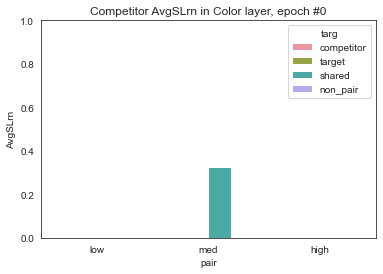

/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dt

/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dt

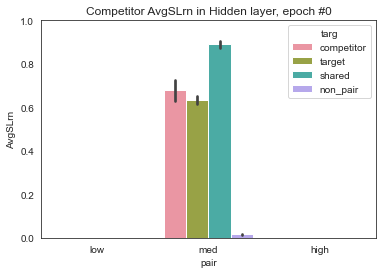

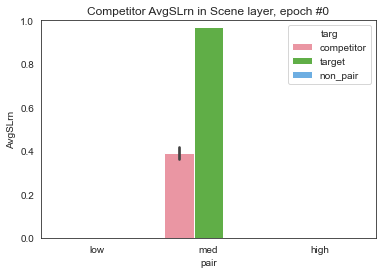

In [160]:

if train_trial_done == 1:
    plt.clf()
    output_competitor_AvgSLrn, all_output_AvgSLrn_df, analyses_df = plot_selected_AvgSLrn('Color', data_train_stacked, epoch_end_initial+1, analyses_df)
    plt.clf()
    hidden_competitor_AvgSLrn, all_hidden_AvgSLrn_df, analyses_df = plot_selected_AvgSLrn('Hidden', data_train_stacked, epoch_end_initial+1,analyses_df)
    plt.clf()
    scene_competitor_AvgSLrn, all_scene_AvgSLrn_df, analyses_df = plot_selected_AvgSLrn('Scene', data_train_stacked, epoch_end_initial+1,analyses_df)


#### Checkpoint for avgSLrn
<a id='Checkpoint_for_avgSLrn'></a>

In [161]:
def AvgSLrn_checkpoint(Layer, AvgSLrn_data, checkpoints_df):
    
    if AvgSLrn_data.sum != 'error' :
        #output layer:
        is_low = AvgSLrn_data['pair'] == 'low'
        is_med = AvgSLrn_data['pair'] == 'med'
        is_high = AvgSLrn_data['pair'] == 'high'

        is_competitor = AvgSLrn_data['targ'] == 'competitor'
        is_target = AvgSLrn_data['targ'] == 'target'

        low = AvgSLrn_data[is_low & is_competitor]['activity'].mean()
        med = AvgSLrn_data[is_med & is_competitor]['activity'].mean()
        high = AvgSLrn_data[is_high & is_competitor]['activity'].mean()

        if low< med < high:
            checkpoint_TF = True
        else :
            checkpoint_TF = False
        description = Layer + ' Layer: is AvgSLrn for competitor the first trial of the second task in correct low-med-high order'
        temp = [Layer + ' AvgSLrn l-m-h', checkpoint_TF, 0, description]
        temp_series = pd.Series(temp, index = checkpoints_df.columns)
        checkpoints_df = checkpoints_df.append(temp_series, ignore_index = True)

        mean_values = dict(low=low, med=med, high=high)

        for type_overlap, mean_avgSLrn in mean_values.items() :

            description = Layer + ' Layer: ' + type_overlap + ' competitor value of AvgSLrn (ignore true/false)'
            temp = [Layer + ' ' + type_overlap +' ' + 'compet AvgSLrn VALUE', True, mean_avgSLrn, description]
            temp_series = pd.Series(temp, index = checkpoints_df.columns)
            checkpoints_df = checkpoints_df.append(temp_series, ignore_index = True)

        temp = [Layer + ' AvgSLrn range', True, high - low, 'range of high competitor avgSlrn - low competitor avgslrn']
        temp_series = pd.Series(temp, index = checkpoints_df.columns)
        checkpoints_df = checkpoints_df.append(temp_series, ignore_index = True)


        low_targ = AvgSLrn_data[is_low & is_target]['activity'].mean()
        med_targ = AvgSLrn_data[is_med & is_target]['activity'].mean()
        high_targ = AvgSLrn_data[is_high & is_target]['activity'].mean()

        mean_values = dict(low=low_targ, med=med_targ, high=high_targ)

        for type_overlap, mean_avgSLrn in mean_values.items() :

            description = Layer + ' Layer: ' + type_overlap + ' target value of AvgSLrn (ignore true/false)'
            temp = [Layer + ' ' + type_overlap +' ' + 'targ AvgSLrn VALUE', True, mean_avgSLrn, description]
            temp_series = pd.Series(temp, index = checkpoints_df.columns)
            checkpoints_df = checkpoints_df.append(temp_series, ignore_index = True)

        is_non_pair = AvgSLrn_data['targ'] == 'non_pair'
        low_non_pair = AvgSLrn_data[is_low & is_non_pair]['activity'].mean()
        med_non_pair = AvgSLrn_data[is_med & is_non_pair]['activity'].mean()
        high_non_pair = AvgSLrn_data[is_high & is_non_pair]['activity'].mean()

        mean_values = dict(low=low_non_pair, med=med_non_pair, high=high_non_pair)

        for type_overlap, mean_avgSLrn in mean_values.items() :
            description = Layer + ' Layer: ' + type_overlap + ' non-pair value of AvgSLrn (ignore true/false)'
            temp = [Layer + ' ' + type_overlap +' ' + 'nonPair AvgSLrn VALUE', True, mean_avgSLrn, description]
            temp_series = pd.Series(temp, index = checkpoints_df.columns)
            checkpoints_df = checkpoints_df.append(temp_series, ignore_index = True)

        return(checkpoints_df)


checkpoints_df = AvgSLrn_checkpoint('Color', output_competitor_AvgSLrn, checkpoints_df)
checkpoints_df = AvgSLrn_checkpoint('Hidden', hidden_competitor_AvgSLrn, checkpoints_df)
checkpoints_df = AvgSLrn_checkpoint('Scene', scene_competitor_AvgSLrn, checkpoints_df)


## FIGURE OUT NMPH LEARNING FUNCTION FOR EACH PROJECTION
<a id='calc NMPH curve'></a>

## Calculate Learning Curve based on Trial 1 Activity

In [162]:
if calculate_learning_curve == 1 :

    def calc_coproduct_layer(layer1_act, layer2_act, same_or_different):

        if same_or_different == 'same' :
            # if the two AvgSLRn sets of units are the same, only multiply pairs of units one time, and don't multiply same units. 
            coproducts = [layer1_act[a1] * layer2_act[b1] for a1 in range(len(layer1_act)) for b1 in range(len(layer2_act)) if a1 < b1]

        elif same_or_different == 'different' :
            coproducts =[layer1_act[a1] * layer2_act[b1] for a1 in range(len(layer1_act)) for b1 in range(len(layer2_act))]

        return coproducts

    def filter_runs_for_coproducts(first_layer_AvgSLrn, second_layer_AvgSLrn, first_layer, second_layer, percentile_give) :
        #percentile_give gives the percentile flexibility. If 100, then it will be strict. if 95, then it takes the 95% percentile.


        epoch = epoch_end_initial + 1
        all_coact = pd.DataFrame()

        if first_layer == second_layer :
            within_layer = 1
        else :
            within_layer = 0

        #strict filters:
        filter_run_list = {'Max_compet_shared_MED_less_Min_target_shared_MED' :[]}
        filter_run_list['Max_compet_shared_MED_less_Min_target_target_MED'] = []
        filter_run_list['Max_compet_target_MED_less_Min_target_shared_MED'] = []
        filter_run_list['Max_compet_target_MED_less_Min_target_target_MED'] = []

    #     filter_run_list['Max_compet_shared_LOW_less_Min_compet_shared_MED'] = []
    #     filter_run_list['Max_compet_shared_MED_less_Min_compet_shared_HIGH'] = []
    #     filter_run_list['Max_compet_shared_MED_less_Min_target_shared_HIGH'] = []
        filter_run_list['Max_compet_compet_MED_less_Min_compet_shared_MED'] = []



        filter_run_list['all filters'] = []
        for run in range(nruns + 1):
            run_coact = pd.DataFrame()
            currentRun_L1 = first_layer_AvgSLrn[first_layer_AvgSLrn['run'] == run]
            currentRun_L2 = second_layer_AvgSLrn[second_layer_AvgSLrn['run'] == run]

            for pair in ['low', 'med', 'high'] : 
                compet_act_1 = currentRun_L1[(currentRun_L1['type'] == 'competitor') & (currentRun_L1['pair'] == pair)]['AvgSLrn'].reset_index(drop = True)
                targ_act_1 = currentRun_L1[(currentRun_L1['type'] == 'target') & (currentRun_L1['pair'] == pair)]['AvgSLrn'].reset_index(drop = True)
                shared_act_1 = currentRun_L1[(currentRun_L1['type'] == 'shared') & (currentRun_L1['pair'] == pair)]['AvgSLrn'].reset_index(drop = True)

                compet_act_2 = currentRun_L2[(currentRun_L2['type'] == 'competitor') & (currentRun_L2['pair'] == pair)]['AvgSLrn'].reset_index(drop = True)
                targ_act_2 = currentRun_L2[(currentRun_L2['type'] == 'target') & (currentRun_L2['pair'] == pair)]['AvgSLrn'].reset_index(drop = True)
                shared_act_2 = currentRun_L2[(currentRun_L2['type'] == 'shared') & (currentRun_L2['pair'] == pair)]['AvgSLrn'].reset_index(drop = True)


                temp_DF = pd.DataFrame()


                if within_layer == 1 :
                    coprod_compet_compet = calc_coproduct_layer(compet_act_1, compet_act_2, 'same')
                else :
                    coprod_compet_compet = calc_coproduct_layer(compet_act_1, compet_act_2, 'different')
                coprod_compet_targ = calc_coproduct_layer(compet_act_1, targ_act_2, 'different')

                coprod_compet_shared = calc_coproduct_layer(compet_act_1, shared_act_2, 'different')

                coprod_targ_compet = calc_coproduct_layer(targ_act_1, compet_act_2, 'different')
                if within_layer == 1 :
                    coprod_targ_targ = calc_coproduct_layer(targ_act_1, targ_act_2, 'same')
                else :
                    coprod_targ_targ = calc_coproduct_layer(targ_act_1, targ_act_2, 'different')
                coprod_targ_shared = calc_coproduct_layer(targ_act_1, shared_act_2, 'different')

                coprod_shared_compet = calc_coproduct_layer(shared_act_1, compet_act_2, 'different')
                coprod_shared_targ = calc_coproduct_layer(shared_act_1, targ_act_2, 'different')
                if within_layer == 1 :
                    coprod_shared_shared = calc_coproduct_layer(shared_act_1, shared_act_2, 'same')
                else:
                    coprod_shared_shared = calc_coproduct_layer(shared_act_1, shared_act_2, 'different')

                for coact_type in ['coprod_compet_compet', 'coprod_compet_targ', 'coprod_compet_shared', 
                                  'coprod_targ_compet', 'coprod_targ_targ', 'coprod_targ_shared',
                                  'coprod_shared_compet', 'coprod_shared_targ', 'coprod_shared_shared'] :
                    coact = eval(coact_type)
                    temp_df= pd.DataFrame({'coproduct' : coact})
                    temp_df['run'] = run
                    temp_df['epoch'] = epoch
                    temp_df['pair'] = pair
                    temp_df['coact_type'] = coact_type
                    run_coact = run_coact.append(temp_df)



            all_coact = all_coact.append(run_coact)

            #############################
            #######FILTERS:

            ###### Flag for if this run satisfies all the filters for this projection. 
            ###### If any filter fails, it gets set to 0. 
            all_filters_passed = 1;

            low = run_coact['pair'] == 'low'
            med = run_coact['pair'] == 'med'
            high = run_coact['pair'] == 'high'

            #---------------------
            # FILTER #1
            ## 'max of compet_shared LOW < min compet_shared MED')
    #         try: 

    #             a = np.percentile(run_coact[low & (run_coact['coact_type'] == 'coprod_compet_shared')]['coproduct'], percentile_give) #max
    #             b = np.percentile(run_coact[med & (run_coact['coact_type'] == 'coprod_compet_shared')]['coproduct'], 100 - percentile_give) #min   

    #             if a < b : 
    #                 filter_run_list['Max_compet_shared_LOW_less_Min_compet_shared_MED'].append(run)
    #             else : 
    #                 all_filters_passed = 0;
    #         except:
    #             all_filters_passed = 0;
            #---------------------
            # FILTER #2
            ## 'max of compet_shared MED < min compet_shared HIGH')

    #         try:

    #             a = np.percentile(run_coact[med & (run_coact['coact_type'] == 'coprod_compet_shared')]['coproduct'], percentile_give) #max
    #             b = np.percentile(run_coact[high & (run_coact['coact_type'] == 'coprod_compet_shared')]['coproduct'], 100 - percentile_give)#min

    #             if a < b : 
    #                 filter_run_list['Max_compet_shared_MED_less_Min_compet_shared_HIGH'].append(run)
    #             else : 
    #                 all_filters_passed = 0;
    #         except: 
    #             all_filters_passed = 0;


            #---------------------
    #         # FILTER #3

    #             a = np.percentile(run_coact[med & (run_coact['coact_type'] == 'coprod_compet_shared')]['coproduct'], percentile_give)
    #             b = np.percentile(run_coact[high & (run_coact['coact_type'] == 'coprod_target_shared')]['coproduct'], 100 - percentile_give)

    #             if a < b : 
    #                 filter_run_list['Max_compet_shared_MED_less_Min_target_shared_HIGH'].append(run)
    #             else : 
    #                 all_filters_passed = 0;

    #         except :
    #             all_filters_passed = 0


            #---------------------
            # FILTER #4
            try:

                a = np.percentile(run_coact[med & (run_coact['coact_type'] == 'coprod_compet_compet')]['coproduct'], percentile_give) #max
                b = np.percentile(run_coact[med & (run_coact['coact_type'] == 'coprod_compet_shared')]['coproduct'], 100 - percentile_give) #min

                if a < b : 
                    filter_run_list['Max_compet_compet_MED_less_Min_compet_shared_MED'].append(run)
                else : 
                    all_filters_passed = 0;
            except:
                all_filters_passed = 0;

                    #---------------------
            # FILTER #5
            try:

                # we want this one to be strict, so not using percentile:
                a = run_coact[med & (run_coact['coact_type'] == 'coprod_compet_shared')]['coproduct'].max() #max
                b = run_coact[med & (run_coact['coact_type'] == 'coprod_targ_shared')]['coproduct'].min() #min

                if a < b : 
                    filter_run_list['Max_compet_shared_MED_less_Min_target_shared_MED'].append(run)
                else : 
                    all_filters_passed = 0;
            except:
                all_filters_passed = 0;

            ##---------------------
            # FILTER #6
            try:

                # we want this one to be strict, so not using percentile:
                a = run_coact[med & (run_coact['coact_type'] == 'coprod_compet_shared')]['coproduct'].max() #max
                b = run_coact[med & (run_coact['coact_type'] == 'coprod_targ_targ')]['coproduct'].min() #min

                if a < b : 
                    print(a)
                    print(b)
                    filter_run_list['Max_compet_shared_MED_less_Min_target_target_MED'].append(run)
                else : 
                    all_filters_passed = 0;
            except:
                all_filters_passed = 0;

                    #---------------------
            # FILTER #7
            try:

                # we want this one to be strict, so not using percentile:
                a = run_coact[med & (run_coact['coact_type'] == 'coprod_compet_targ')]['coproduct'].max() #max
                b = run_coact[med & (run_coact['coact_type'] == 'coprod_targ_shared')]['coproduct'].min() #min

                if a < b : 
                    filter_run_list['Max_compet_target_MED_less_Min_target_shared_MED'].append(run)
                else : 
                    all_filters_passed = 0;
            except:
                all_filters_passed = 0;

            ##---------------------
            # FILTER #8
            try:

                # we want this one to be strict, so not using percentile:
                a = run_coact[med & (run_coact['coact_type'] == 'coprod_compet_targ')]['coproduct'].max() #max
                b = run_coact[med & (run_coact['coact_type'] == 'coprod_targ_targ')]['coproduct'].min() #min

                if a < b : 
                    filter_run_list['Max_compet_target_MED_less_Min_target_target_MED'].append(run)
                else : 
                    all_filters_passed = 0;
            except:
                all_filters_passed = 0;

            #DONE!
            if all_filters_passed == 1:
                filter_run_list['all filters'].append(run)

        return all_coact, filter_run_list



    all_coact_hidd_hidd, filter_hidd_hidd = filter_runs_for_coproducts(all_hidden_AvgSLrn_df, all_hidden_AvgSLrn_df, 'Hidden', 'Hidden', 70)
    all_coact_hidd_col, filter_hidd_col = filter_runs_for_coproducts(all_hidden_AvgSLrn_df, all_output_AvgSLrn_df, 'Hidden', 'Output',0)
    all_coact_scene_hidd, filter_scene_hidd = filter_runs_for_coproducts(all_scene_AvgSLrn_df, all_hidden_AvgSLrn_df, 'Scene', 'Hidden',0)


    # to get seed:
    # run = ___
    # seed = data_run[data_run['|Run'] == run]['$Seed']

    print(' ')
    print('filter_hidd_hidd')
    pp.pprint(filter_hidd_hidd)
    print(' ')
    print('filter_hidd_col')
    pp.pprint(filter_hidd_col)
    print(' ')
    print('filter_scene_hidd')
    pp.pprint(filter_scene_hidd)
    
    def find_common_run(list1, list2) :
        intersection_set = set.intersection(set(list1), set(list2))
        intersection_list = list(intersection_set)
        return intersection_list



    allruns = np.arange(nruns+1)

    # for curr_prjn in [filter_hidd_hidd, filter_scene_hidd, filter_hidd_col] :
    for curr_prjn in [filter_hidd_hidd] :
        all_common_runs = find_common_run(allruns, curr_prjn['all filters'])

    print('\n\n***********\n***********\n')
    print('THE ONLY RUNS THAT SATISFY ALL THE FILTERS FOR EACH PROJECTION' )

    print(all_common_runs)
    print('\n')

In [163]:

if calculate_learning_curve == 1 :

    chosen_run = 0

    if chosen_run not in all_common_runs :
        raise ValueError('you need to manually set "chosen run" to be one of the runs that satisfy all the filters above')

    else :
        seed = data_run[data_run['|Run'] == chosen_run]['$Seed']
        print(seed)




In [164]:
# ##TEMPORARY CODE TO JUST CHECK THAT THESE COACTIVITIES ARE THE SAME
# # AS THE ONES WE PLOTTED IN TEH XCAL FUNCTION. 

# data_t = all_coact_hidd_col
# low = data_t['pair'] == 'low'
# med = data_t['pair'] == 'med'
# high = data_t['pair'] == 'high'

# run = data_t['run'] == 0
# overlap = med
# prjn_name = 'coprod_compet_shared'
# prjn = data_t['coact_type'] == prjn_name


# print(len(data_t[run & overlap & prjn]['coproduct']))
# print(data_t[run & overlap & prjn]['coproduct'].min())
# print(data_t[run & overlap & prjn]['coproduct'].max())
# print(sorted(data_t[run & overlap & prjn]['coproduct']))

# # for coact_type in ['coprod_compet_compet', 'coprod_compet_targ', 'coprod_compet_shared', 
# #                   'coprod_targ_compet', 'coprod_targ_targ', 'coprod_targ_shared',
# #                   'coprod_shared_compet', 'coprod_shared_targ', 'coprod_shared_shared'] :
    
# #     prjn = data_t['coact_type'] == coact_type
# #     sns.swarmplot(x = 'pair', hue = 'pair', y = 'coproduct', data = data_t[run & prjn])
# #     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# #     plt.title(coact_type)
# #     plt.show()

In [165]:
## select correct boundaries:

if calculate_learning_curve == 1 :
    def select_NMPH_boundaries(projection, run) :
        med = projection['pair'] == 'med'
        run = projection['run'] == run

        min_compet_shared_val = projection[run & med & (projection['coact_type'] == 'coprod_compet_shared')]['coproduct'].min()
        max_compet_compet_val = projection[run & med & (projection['coact_type'] == 'coprod_compet_compet')]['coproduct'].max()
        max_compet_shared_val = projection[run & med & (projection['coact_type'] == 'coprod_compet_shared')]['coproduct'].max()

        min_targ_targ_val = projection[run &med & (projection['coact_type'] == 'coprod_targ_targ')]['coproduct'].min()
        min_targ_shared_val = projection[run &med & (projection['coact_type'] == 'coprod_targ_shared')]['coproduct'].min()

        #get D_Thr first

        if max_compet_compet_val < min_compet_shared_val :#if it's easy, and there's a clean divide:

            left_boundary_left = min(.0001, np.mean([min_compet_shared_val, max_compet_compet_val]))
            boundary_Dthr = max_compet_compet_val + left_boundary_left
        else :
            left_boundary_right = .0001
            boundary_Dthr = min_compet_shared_val - left_boundary_right

        #get ThrP:

        min_integration_values = min(min_targ_targ_val, min_targ_shared_val)

        boundary_ThrP = np.mean([min_integration_values, max_compet_shared_val])    


        boundary_DRev = np.median(projection[run & med & (projection['coact_type'] == 'coprod_compet_shared')]['coproduct'])

        if boundary_DRev > boundary_ThrP :
            boundary_DRev = np.mean([boundary_ThrP, boundary_Dthr])

    #     print('DThr: ' + str(boundary_Dthr))
    #     print('DRev: ' + str(boundary_DRev))
    #     print('ThrP: ' + str(boundary_ThrP))

        return boundary_Dthr, boundary_DRev, boundary_ThrP


    print ('chosen run is ' + str(chosen_run))
    h_h_boundary = {}
    h_h_boundary['DThr'], h_h_boundary['DRev'], h_h_boundary['ThrP'] = select_NMPH_boundaries(all_coact_hidd_hidd, chosen_run)
    h_h_boundary['ProjectionName'] = 'HiddenToHidden'

    h_c_boundary = {}
    h_c_boundary['DThr'], h_c_boundary['DRev'], h_c_boundary['ThrP'] = select_NMPH_boundaries(all_coact_hidd_col, chosen_run)
    h_c_boundary['ProjectionName'] = 'HiddenToOutput'

    f_h_boundary = {}
    f_h_boundary['DThr'], f_h_boundary['DRev'], f_h_boundary['ThrP'] = select_NMPH_boundaries(all_coact_scene_hidd, chosen_run)
    f_h_boundary['ProjectionName'] = 'SceneToHidden'

    h_h_boundary

## Print out param sheet for each projection type to easily paste into output_diff.go
<a id='Print_out_param_sheet_for_each_projection_type_to_easily_paste_into_output_diff.go'></a>

In [166]:
if calculate_learning_curve == 1 :
    for projection in [h_h_boundary, h_c_boundary, f_h_boundary] :

        this_projection = projection['ProjectionName']
        Layers = this_projection.split('To')
        reverse_projection = Layers[1] + 'To' + Layers[0]

        if this_projection == reverse_projection :
            projection_list = [this_projection]

        else :
            projection_list = [this_projection, reverse_projection]

        for prjn_direction_name in projection_list :

            print('{Sel: "#' + prjn_direction_name + '", "default connection (will change for non-shape learning task).", \
            \n\tParams: params.Params{\n \
            \t\t"Prjn.Learn.XCal.DThr_NMPH" : "' + str(projection['DThr']) +'",\n\
            \t\t"Prjn.Learn.XCal.DRev_NMPH" : "' + str(projection['DRev']) +'",\n\
            \t\t"Prjn.Learn.XCal.DRevMag_NMPH" : "-0.3",\n\
            \t\t"Prjn.Learn.XCal.DMaxMag_NMPH" : "0.3",\n\
            \t\t"Prjn.Learn.XCal.ThrP_NMPH" : "' + str(projection['ThrP']) +'",\n\
            }},')




## Plot scatter plot of DWt vs. AvgSLrn coproducts
<a id='plot_scatter_plot_DWt_vs_AvgSLrn_coproducts'></a>

In [167]:
hidden_competitor_AvgSLrn[hidden_competitor_AvgSLrn['pair']=='med']

,run,epoch,pair,trial,unit,targ,activity
0,0,0,med,med2,med1,competitor,0.755275
1,0,0,med,med2,med2,target,0.631537
2,0,0,med,med2,med1+2,shared,0.896050
3,0,0,med,med2,non_pair,non_pair,0.016720
4,1,0,med,med2,med1,competitor,0.774225
...,...,...,...,...,...,...,...
75,18,0,med,med2,non_pair,non_pair,0.011790
76,19,0,med,med2,med1,competitor,0.564975
77,19,0,med,med2,med2,target,0.578700
78,19,0,med,med2,med1+2,shared,0.839200


In [168]:
import traceback
from matplotlib.lines import Line2D


def get_unit_key_from_id(idx, layer):
    
    if layer == 'Scene':
        x, y = [idx // 3, idx % 3]
        if (x == 0) & (y == 0):
            extra = '<4:2,1,1,3>'
        else:
            extra = ''

        return f'#SceneAvgSLrn[4:{x},0,0,{y}]{extra}'
    elif layer == 'Output':
        x, y = [idx // 50, idx % 50]
        
        if (x == 0) & (y == 0):
            extra = '<2:1,50>'
        else:
            extra = ''

        return f'#OutAvgSLrn[2:{x},{y}]{extra}'
    elif layer == 'Hidden':
        if hidden_dimensions == 1 :
            x, y = [idx // 50, idx % 50]
#             print(idx, x, y)
            if (x == 0) & (y == 0):
                extra ='<2:1,50>' 
            else:
                extra = ''

            return f'#HiddenAvgSLrn[2:{x},{y}]{extra}'
        
        elif hidden_dimensions == 2 :
            x, y = [idx // 10, idx % 10]
            if (x == 0) & (y == 0):
                extra ='<2:10,10>' 
            else:
                extra = ''

            return f'#HiddenAvgSLrn[2:{x},{y}]{extra}'

def get_unit_type_dict_for_layer(layer, run = 0):
    # Get dictionary classifying unit type by layer
    if layer == 'Hidden':
        return unit_dict_list_AvgSLrn[run]
    elif layer == 'Output':
        return output_classification_dict_AvgSLrn
    elif layer == 'Scene':
        return sceneKey_AvgSLrn

def analyze_DWt_AvgSLrn_by_trial_type(data, run, epoch, trial_type, 
                                      first_layer, second_layer, plot_all_combinations, pdf):
    """
    data: data_train_stacked 
    trial_type: one of ['low', 'med', 'high']
    """  
    
    # Define target, competitor, and shared unit types
    target_first_trial_type = list(hidden_competitor_AvgSLrn[(hidden_competitor_AvgSLrn['run'] == run) & (hidden_competitor_AvgSLrn['pair'] == trial_type)]['trial'])
    target_first_trial_type = target_first_trial_type[0]
    competitor_unit_first_trial_type = competitor_trial(target_first_trial_type)
    shared_unit_first_trial_type = trial_type + '1+2'
    analyzed_units = [target_first_trial_type, competitor_unit_first_trial_type, shared_unit_first_trial_type]
    num_units_sender_layer = parameter_values['Num_units_per_layer'][first_layer]
    num_units_receiver_layer = parameter_values['Num_units_per_layer'][second_layer]
#     print(num_units_sender_layer, num_units_sender_layer)
    
    
    
    # get AvgSLrn values into trial_first_units 
    def get_layer_start_and_end_indices_AvgSLrn(layer):
        if layer == "Hidden":
            start_index = hidden_Start_AvgSLrn
            end_index = hidden_End_AvgSLrn
        elif layer == "Scene":
            start_index = scene_Start_AvgSLrn
            end_index = scene_End_AvgSLrn
        elif layer == "Output":
            start_index = output_Start_AvgSLrn
            end_index = output_End_AvgSLrn
        return start_index, end_index
    
    start_index, end_index = get_layer_start_and_end_indices_AvgSLrn(first_layer)
    trial_first_units = data.loc[idx[run,epoch,slice(None),slice(start_index, end_index)], [target_first_trial_type]]
    trial_first_units = trial_first_units.values
    
    start_index, end_index = get_layer_start_and_end_indices_AvgSLrn(second_layer)
    trial_second_units = data.loc[idx[run,epoch,slice(None),slice(start_index, end_index)], [target_first_trial_type]]
    trial_second_units = trial_second_units.values
    
    # get saved DWt
    if first_layer == "Hidden" and second_layer == "Hidden":
        start_index = hidden_to_hidden_DWt_Start
        end_index = hidden_to_hidden_DWt_End
    elif first_layer == "Hidden" and second_layer == "Scene":
        start_index = hidden_to_scene_DWt_Start
        end_index = hidden_to_scene_DWt_End
    elif first_layer == "Scene" and second_layer == "Hidden":
        start_index = scene_to_hidden_DWt_Start
        end_index = scene_to_hidden_DWt_End
    elif first_layer == "Hidden" and second_layer == "Output":
        start_index = hidden_to_output_DWt_Start
        end_index = hidden_to_output_DWt_End
    elif first_layer == "Output" and second_layer == "Hidden":
        start_index = output_to_hidden_DWt_Start
        end_index = output_to_hidden_DWt_End
    run_dwt = np.array(data.loc[(run, epoch, slice(None), slice(start_index, end_index)), 
                                target_first_trial_type]) 
    
    
    # connection_type holds the type of connection (one of compet-compet, compet-shared, target-shared)
    connection_type = []
    
    # coprods holds the coproducts of AvgSLrn values for different connection types
    coprods = []
    
    # dwts holds the dwt values for different connection types
    dwts = []
    
    
        
    def infer_receiving_unit_type(sender_unit_type):
        if plot_all_combinations:
            return [shared_unit_first_trial_type, competitor_unit_first_trial_type, target_first_trial_type]
        else:
            if sender_unit_type == competitor_unit_first_trial_type:
                return [shared_unit_first_trial_type, competitor_unit_first_trial_type]
            elif sender_unit_type == target_first_trial_type:
                return [shared_unit_first_trial_type]
        
    classify_sending_layer_units_dict = get_unit_type_dict_for_layer(first_layer, run)
    classify_receiving_layer_units_dict = get_unit_type_dict_for_layer(second_layer, run)
#     print(classify_receiving_layer_units_dict)
    for i in range(num_units_sender_layer):
        sender_unit = get_unit_key_from_id(i, first_layer)
        sender_unit_type =  classify_sending_layer_units_dict[sender_unit]
        if sender_unit_type in [competitor_unit_first_trial_type, target_first_trial_type]:
            for j in range(num_units_receiver_layer):
                if i == j:
                    continue
                receiver_unit = get_unit_key_from_id(j, second_layer)
                receiver_unit_type = classify_receiving_layer_units_dict[receiver_unit]
                if receiver_unit_type in infer_receiving_unit_type(sender_unit_type):
                    coprods.append(trial_first_units[i] * trial_second_units[j])
                    connection_type.append(f"{sender_unit_type}-{receiver_unit_type}")
                    # Hidden units don't connect to themselves: this affects how we access DWt
                    if first_layer == "Hidden" and second_layer == "Hidden":
                        weight_id = i * (num_units_receiver_layer - 1) + j - int(j > i) 
                    else:
                        weight_id = i * (num_units_receiver_layer) + j 
                    
                    dwts.append(run_dwt[weight_id])
                    
#     print(len(coprods), len(connection_type), len(dwts))
    print((coprods))
    print(connection_type)
    print(dwts)
    print(competitor_unit_first_trial_type, shared_unit_first_trial_type, target_first_trial_type)
#     print(connection_type)
#     print(dwts)

    output_dictionary = {f"{competitor_unit_first_trial_type}-{competitor_unit_first_trial_type}": "red",
                        f"{competitor_unit_first_trial_type}-{shared_unit_first_trial_type}": "black",
                        f"{competitor_unit_first_trial_type}-{target_first_trial_type}": "orange",
                        f"{target_first_trial_type}-{shared_unit_first_trial_type}": "blue",
                        f"{target_first_trial_type}-{competitor_unit_first_trial_type}": "green",
                        f"{target_first_trial_type}-{target_first_trial_type}": "purple",
                       }
    connection_color =[output_dictionary[conn] for conn in connection_type]


    title = f"{first_layer}_to_{second_layer}: First trial ({target_first_trial_type}) DWt vs. AvgSLrn from {first_layer} to {second_layer}"   
    fig, ax = plt.subplots(figsize=(6,6))

    ax.scatter(coprods, dwts, c = connection_output, alpha = .3)

    ax.set_xlabel('Coproducts', fontsize=25)
    ax.set_xlim(0,1)
    ax.set_ylabel(f'DWt', fontsize=25)
    ax.set_ylim(-1.1,0.4)

    ax.set_title(f"{title} Run {run} Epoch {epoch}")
    ax.axhline()
    legend_elements = [
                   Line2D([0], [0], marker='o', color='w', markerscenecolor=('red'), label=f"{competitor_unit_first_trial_type}-{competitor_unit_first_trial_type}", markersize=8),
                   Line2D([0], [0], marker='o', color='w', markerscenecolor='black', label=f"{competitor_unit_first_trial_type}-{shared_unit_first_trial_type}", markersize=8),
                   Line2D([0], [0], marker='o', color='w', markerscenecolor='orange', label=f"{competitor_unit_first_trial_type}-{target_first_trial_type}", markersize=8),
                   Line2D([0], [0], marker='o', color='w', markerscenecolor='green', label=f"{target_first_trial_type}-{competitor_unit_first_trial_type}", markersize=8),
                   Line2D([0], [0], marker='o', color='w', markerscenecolor='blue', label=f"{target_first_trial_type}-{shared_unit_first_trial_type}", markersize=8),
                   Line2D([0], [0], marker='o', color='w', markerscenecolor='purple', label=f"{target_first_trial_type}-{target_first_trial_type}", markersize=8)
    ]
    ax.legend(handles=legend_elements, loc='lower right')

    pdf.savefig(fig, bbox_inches = "tight")

def plot_scatter_plot_DWt_vs_AvgSLrn_coproducts(data, first_layer, second_layer, plot_all_combinations, analyses_df):
    # trial_types = ['low', 'med', 'high']
    trial_types = ['med']
    
    try:
        pdf = PdfPages(checkpoint_fig_dir + f"{first_layer}_to_{second_layer}:AvgSLrn_vs_DWt_scatter_plots.pdf")
#         runs_to_do = range(nruns + 1)
        runs_to_do = range(1)
        epochs_to_do = [epoch_end_initial + 1] #range(max_final_epoch)
        print("epoch_end_initial", epoch_end_initial)
        for run in runs_to_do :
            for epoch in epochs_to_do:
                for trial_type in trial_types:
                    coprods = analyze_DWt_AvgSLrn_by_trial_type(data, run, epoch, trial_type, 
                                                                first_layer, second_layer, 
                                                                plot_all_combinations=plot_all_combinations, pdf=pdf)

        pdf.close()
        #analyses_df = add_analysis_to_analyses_df(analyses_df, title, True) 
    except:
        analyses_df = add_analysis_to_analyses_df(analyses_df, title, False) 
        traceback.print_exc()
    return analyses_df
    


epoch_end_initial -1
[array([0.49559297]), array([0.46413882]), array([0.65085895]), array([0.65085895]), array([0.58801978]), array([0.59721407]), array([0.55587433]), array([0.59320453]), array([3.366631e-05]), array([0.49559297]), array([0.48132666]), array([0.67496135]), array([0.67496135]), array([0.60979514]), array([0.61932991]), array([0.57645929]), array([0.61517189]), array([3.491303e-05]), array([0.46413882]), array([0.48132666]), array([0.6321231]), array([0.6321231]), array([0.57109284]), array([0.58002246]), array([0.53987274]), array([0.57612834]), array([3.269718e-05]), array([0.65085895]), array([0.67496135]), array([0.6321231]), array([0.88642225]), array([0.8008399]), array([0.81336185]), array([0.75706015]), array([0.80790115]), array([4.585105e-05]), array([0.59721407]), array([0.61932991]), array([0.58002246]), array([0.81336185]), array([0.81336185]), array([0.73483334]), array([0.69466199]), array([0.74131259]), array([4.207193e-05]), array([0.55587433]), array(

Traceback (most recent call last):
  File "<ipython-input-168-907c84d86f7b>", line 213, in plot_scatter_plot_DWt_vs_AvgSLrn_coproducts
    plot_all_combinations=plot_all_combinations, pdf=pdf)
  File "<ipython-input-168-907c84d86f7b>", line 177, in analyze_DWt_AvgSLrn_by_trial_type
    ax.scatter(coprods, dwts, c = connection_output, alpha = .3)
NameError: name 'connection_output' is not defined


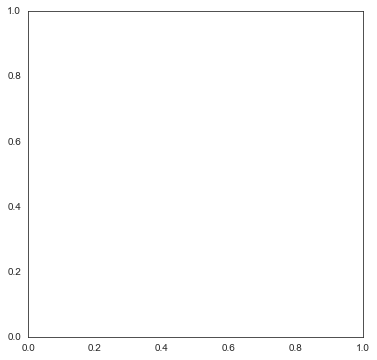

epoch_end_initial -1
[array([0.67035361]), array([0.69517793]), array([0.65105658]), array([0.91297255]), array([0.91297255]), array([0.82482682]), array([0.83772383]), array([0.77973577]), array([0.83209957]), array([4.722439e-05]), array([0.29926377]), array([0.31034601]), array([0.29064906]), array([0.40757535]), array([0.40757535]), array([0.36822474]), array([0.37398231]), array([0.34809489]), array([0.37147149]), array([2.108223e-05])]
['med2-med1', 'med2-med1', 'med2-med1', 'med2-med1', 'med2-med1+2', 'med2-med1+2', 'med2-med2', 'med2-med2', 'med2-med2', 'med2-med2', 'med1-med1', 'med1-med1', 'med1-med1', 'med1-med1', 'med1-med1+2', 'med1-med1+2', 'med1-med2', 'med1-med2', 'med1-med2', 'med1-med2']
[0.4507, 0.492, 0.4184, 0.855, 0.855, 0.7082, 0.7296, 0.633, 0.7202, 0.0, -0.8887, -0.791, -0.9649, 0.01264, 0.01264, -0.28, -0.2295, -0.4577, -0.2516, 0.0]
med1 med1+2 med2


Traceback (most recent call last):
  File "<ipython-input-168-907c84d86f7b>", line 213, in plot_scatter_plot_DWt_vs_AvgSLrn_coproducts
    plot_all_combinations=plot_all_combinations, pdf=pdf)
  File "<ipython-input-168-907c84d86f7b>", line 177, in analyze_DWt_AvgSLrn_by_trial_type
    ax.scatter(coprods, dwts, c = connection_output, alpha = .3)
NameError: name 'connection_output' is not defined


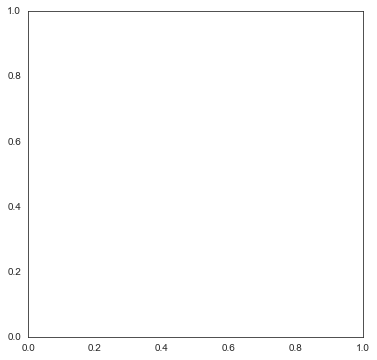

epoch_end_initial -1
[array([0.67035361]), array([0.29926377]), array([0.69517793]), array([0.31034601]), array([0.65105658]), array([0.29064906]), array([0.91297255]), array([0.40757535]), array([0.83772383]), array([0.37398231]), array([0.77973577]), array([0.34809489]), array([0.83209957]), array([0.37147149]), array([4.722439e-05]), array([2.108223e-05])]
['med1-med2', 'med1-med1', 'med1-med2', 'med1-med1', 'med1-med2', 'med1-med1', 'med1-med2', 'med1-med1', 'med2-med2', 'med2-med1', 'med2-med2', 'med2-med1', 'med2-med2', 'med2-med1', 'med2-med2', 'med2-med1']
[0.4507, -0.8887, 0.492, -0.791, 0.4184, -0.9649, 0.855, 0.01264, 0.7296, -0.2295, 0.633, -0.4577, 0.7202, -0.2516, 0.0, 0.0]
med1 med1+2 med2


Traceback (most recent call last):
  File "<ipython-input-168-907c84d86f7b>", line 213, in plot_scatter_plot_DWt_vs_AvgSLrn_coproducts
    plot_all_combinations=plot_all_combinations, pdf=pdf)
  File "<ipython-input-168-907c84d86f7b>", line 177, in analyze_DWt_AvgSLrn_by_trial_type
    ax.scatter(coprods, dwts, c = connection_output, alpha = .3)
NameError: name 'connection_output' is not defined


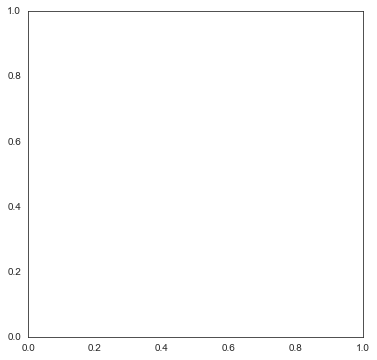

epoch_end_initial -1
[array([4.1478e-29]), array([4.1478e-29]), array([4.1478e-29]), array([4.1478e-29]), array([4.1478e-29]), array([0.67802704]), array([4.1478e-29]), array([4.1478e-29]), array([4.1478e-29]), array([4.1478e-29]), array([4.3014e-29]), array([4.3014e-29]), array([4.3014e-29]), array([4.3014e-29]), array([4.3014e-29]), array([0.70313552]), array([4.3014e-29]), array([4.3014e-29]), array([4.3014e-29]), array([4.3014e-29]), array([4.0284e-29]), array([4.0284e-29]), array([4.0284e-29]), array([4.0284e-29]), array([4.0284e-29]), array([0.65850912]), array([4.0284e-29]), array([4.0284e-29]), array([4.0284e-29]), array([4.0284e-29]), array([5.649e-29]), array([5.649e-29]), array([5.649e-29]), array([5.649e-29]), array([5.649e-29]), array([5.649e-29]), array([5.649e-29]), array([5.649e-29]), array([5.649e-29]), array([5.649e-29]), array([5.1834e-29]), array([5.1834e-29]), array([5.1834e-29]), array([5.1834e-29]), array([5.1834e-29]), array([5.1834e-29]), array([0.84731312]), a

Traceback (most recent call last):
  File "<ipython-input-168-907c84d86f7b>", line 213, in plot_scatter_plot_DWt_vs_AvgSLrn_coproducts
    plot_all_combinations=plot_all_combinations, pdf=pdf)
  File "<ipython-input-168-907c84d86f7b>", line 177, in analyze_DWt_AvgSLrn_by_trial_type
    ax.scatter(coprods, dwts, c = connection_output, alpha = .3)
NameError: name 'connection_output' is not defined


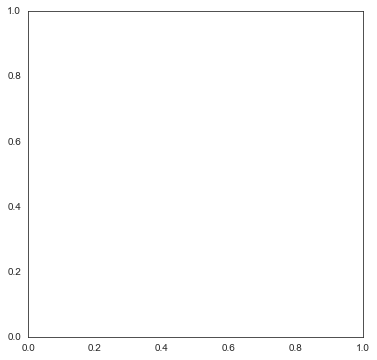

epoch_end_initial -1
[array([4.1478e-29]), array([4.3014e-29]), array([4.0284e-29]), array([5.649e-29]), array([5.649e-29]), array([5.1036e-29]), array([5.1834e-29]), array([4.8246e-29]), array([5.1486e-29]), array([2.922e-33]), array([4.1478e-29]), array([4.3014e-29]), array([4.0284e-29]), array([5.649e-29]), array([5.649e-29]), array([5.1036e-29]), array([5.1834e-29]), array([4.8246e-29]), array([5.1486e-29]), array([2.922e-33]), array([4.1478e-29]), array([4.3014e-29]), array([4.0284e-29]), array([5.649e-29]), array([5.649e-29]), array([5.1036e-29]), array([5.1834e-29]), array([4.8246e-29]), array([5.1486e-29]), array([2.922e-33]), array([4.3014e-29]), array([4.0284e-29]), array([5.649e-29]), array([5.649e-29]), array([5.1036e-29]), array([5.1834e-29]), array([4.8246e-29]), array([5.1486e-29]), array([2.922e-33]), array([4.1478e-29]), array([4.3014e-29]), array([4.0284e-29]), array([5.649e-29]), array([5.1036e-29]), array([5.1834e-29]), array([4.8246e-29]), array([5.1486e-29]), arra

Traceback (most recent call last):
  File "<ipython-input-168-907c84d86f7b>", line 213, in plot_scatter_plot_DWt_vs_AvgSLrn_coproducts
    plot_all_combinations=plot_all_combinations, pdf=pdf)
  File "<ipython-input-168-907c84d86f7b>", line 177, in analyze_DWt_AvgSLrn_by_trial_type
    ax.scatter(coprods, dwts, c = connection_output, alpha = .3)
NameError: name 'connection_output' is not defined


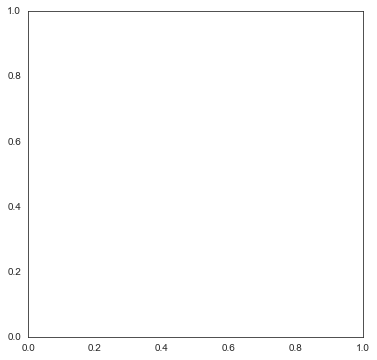

In [169]:
analyses_df = plot_scatter_plot_DWt_vs_AvgSLrn_coproducts(data_train_stacked, "Hidden", "Hidden", plot_all_combinations=True, analyses_df=analyses_df)
plt.show()
analyses_df = plot_scatter_plot_DWt_vs_AvgSLrn_coproducts(data_train_stacked, "Scene", "Hidden", plot_all_combinations=True, analyses_df=analyses_df)
plt.show()
analyses_df = plot_scatter_plot_DWt_vs_AvgSLrn_coproducts(data_train_stacked, "Hidden", "Scene", plot_all_combinations=True, analyses_df=analyses_df)
plt.show()
analyses_df = plot_scatter_plot_DWt_vs_AvgSLrn_coproducts(data_train_stacked, "Hidden", "Output", plot_all_combinations=True, analyses_df=analyses_df)
plt.show()
analyses_df = plot_scatter_plot_DWt_vs_AvgSLrn_coproducts(data_train_stacked, "Output", "Hidden", plot_all_combinations=True, analyses_df=analyses_df)
plt.show()

In [170]:
import traceback
from matplotlib.lines import Line2D


def get_unit_key_from_id(id):
    x, y = [id // 10, id % 10]
    if (x == 0) & (y == 0):
        extra = '<2:10,10>'
    else:
        extra = ''

    return f'#HiddenAvgSLrn[2:{x},{y}]{extra}'

def analyze_DWt_AvgSLrn_by_trial_type(data, run, epoch, trial_type, pdf, 
                                      first_layer = "Hidden", second_layer = "Hidden"):
    """
    data: data_train_stacked 
    trial_type: one of ['low', 'med', 'high']
    """  
    
    # Define target, competitor, and shared unit types
    target_first_trial_type = list(hidden_competitor_AvgSLrn[(hidden_competitor_AvgSLrn['run'] == run) & (hidden_competitor_AvgSLrn['pair'] == trial_type)]['trial'])
    target_first_trial_type = target_first_trial_type[0]
    competitor_unit_first_trial_type = competitor_trial(target_first_trial_type)
    shared_unit_first_trial_type = trial_type + '1+2'
    analyzed_units = [target_first_trial_type, competitor_unit_first_trial_type, shared_unit_first_trial_type]
    
    # trial_first_units hold the AvgSLrn values  
    trial_first_units = data.loc[idx[run,epoch,slice(None),slice(hidden_Start_AvgSLrn, hidden_End_AvgSLrn)], [target_first_trial_type]]
    trial_first_units = trial_first_units.values
    
    # get saved DWt
    start_index, end_index = [hidden_to_hidden_DWt_Start, hidden_to_hidden_DWt_End]
    run_dwt = np.array(data.loc[(run, epoch, slice(None), slice(start_index, end_index)), 
                                target_first_trial_type]) 
    
    
    # connection_type holds the type of connection (one of compet-compet, compet-shared, target-shared)
    connection_type = []
    
    # coprods holds the coproducts of AvgSLrn values for different connection types
    coprods = []
    
    # dwts holds the dwt values for different connection types
    dwts = []
    
    def infer_receiving_unit_type(sender_unit_type):
        if sender_unit_type == competitor_unit_first_trial_type:
            return [shared_unit_first_trial_type, competitor_unit_first_trial_type]
        elif sender_unit_type == target_first_trial_type:
            return [shared_unit_first_trial_type]
        
    for i in range(100):
        sender_unit = get_unit_key_from_id(i)
        sender_unit_type = unit_dict_list_AvgSLrn[run][sender_unit]
        if sender_unit_type in [competitor_unit_first_trial_type, target_first_trial_type]:
            for j in range(100):
                if i == j:
                    continue
                receiver_unit = get_unit_key_from_id(j)
                receiver_unit_type = unit_dict_list_AvgSLrn[run][receiver_unit]
                if receiver_unit_type in infer_receiving_unit_type(sender_unit_type):
                    coprods.append(trial_first_units[i] * trial_first_units[j])
                    connection_type.append(f"{sender_unit_type}-{receiver_unit_type}")
                    weight_id = i * 99 + j - int(j > i) 
                    dwts.append(run_dwt[weight_id])
                    
#     print(len(coprods), len(connection_type), len(dwts))
#     print(connection_type)
#     print(dwts)

    output_dictionary = {f"{competitor_unit_first_trial_type}-{competitor_unit_first_trial_type}": "red",
                        f"{competitor_unit_first_trial_type}-{shared_unit_first_trial_type}": "black",
                        f"{target_first_trial_type}-{shared_unit_first_trial_type}": "blue"
                       }
    connection_color =[output_dictionary[conn] for conn in connection_type]


    title = f"First trial ({target_first_trial_type}) DWt vs. AvgSLrn from {first_layer} to {second_layer}"   
    fig, ax = plt.subplots(figsize=(6,6))

    ax.scatter(coprods, dwts, c = connection_output, alpha = .3)

    ax.set_xlabel('Coproducts', fontsize=25)
    ax.set_xlim(0,1)
    ax.set_ylabel(f'DWt', fontsize=25)
    ax.set_ylim(-0.1,0.1)

    ax.set_title(f"{title} Run {run} Epoch {epoch}")
    ax.axhline()
    legend_elements = [
                   Line2D([0], [0], marker='o', color='w', markerscenecolor='red', label=f"{competitor_unit_first_trial_type}-{competitor_unit_first_trial_type}", markersize=8),
                   Line2D([0], [0], marker='o', color='w', markerscenecolor='black', label=f"{competitor_unit_first_trial_type}-{shared_unit_first_trial_type}", markersize=8),
                   Line2D([0], [0], marker='o', color='w', markerscenecolor='blue', label=f"{target_first_trial_type}-{shared_unit_first_trial_type}", markersize=8)
    ]
    ax.legend(handles=legend_elements, loc='lower right')

    pdf.savefig(fig, bbox_inches = "tight")

def plot_scatter_plot_DWt_vs_AvgSLrn_coproducts(data, first_layer, second_layer, 
                                                first_unit_type, second_unit_type, 
                                                weight_or_dwt, analyses_df):
    
    try:
        pdf = PdfPages(checkpoint_fig_dir + f"AvgSLrn_vs_DWt_scatter_plots.pdf")
        runs_to_do = range(nruns + 1)
        epochs_to_do = [8] #range(max_final_epoch)
        for run in runs_to_do :
            for epoch in epochs_to_do:
                for trial_type in ['low', 'med', 'high']:
                    analyze_DWt_AvgSLrn_by_trial_type(data, run, epoch, trial_type, pdf)

        pdf.close()
        analyses_df = add_analysis_to_analyses_df(analyses_df, title, True) 
    except:
        analyses_df = add_analysis_to_analyses_df(analyses_df, title, False) 
        traceback.print_exc()
    return analyses_df
    
analyses_df = plot_scatter_plot_DWt_vs_AvgSLrn_coproducts(data_train_stacked, "Hidden", "Hidden", "med1+2", 
                                                          "med2", "dwt", analyses_df)
plt.show()


Traceback (most recent call last):
  File "<ipython-input-170-38b1f2ce699a>", line 111, in plot_scatter_plot_DWt_vs_AvgSLrn_coproducts
    analyze_DWt_AvgSLrn_by_trial_type(data, run, epoch, trial_type, pdf)
  File "<ipython-input-170-38b1f2ce699a>", line 55, in analyze_DWt_AvgSLrn_by_trial_type
    sender_unit_type = unit_dict_list_AvgSLrn[run][sender_unit]
KeyError: '#HiddenAvgSLrn[2:0,0]<2:10,10>'


In [171]:
# ## ######

## Add necessary checkpoint info
<a id='Add_necessary_checkpoint_info'></a>

In [197]:
if results_df['TF'].sum() == len(results_df['TF']) :
    all_results_true = True
    temp = ['ALL RESULTS MET', all_results_true, 1, 'Only add if all resulting predictions are met']
    temp_series = pd.Series(temp, index = results_df.columns)
    results_df = results_df.append(temp_series, ignore_index = True)

else :
    all_results_true = False



In [198]:
checkpoints_df['OscAmnt_Scene'] = parameter_values['OscAmnt']['Scene']
checkpoints_df['Gi_Scene'] = parameter_values['Gi']['Scene']
checkpoints_df['OscAmnt_Hidd'] = parameter_values['OscAmnt']['Hidden']
checkpoints_df['Gi_Hidd'] = parameter_values['Gi']['Hidden']
checkpoints_df['OscAmnt_Out'] = parameter_values['OscAmnt']['Output']
checkpoints_df['Gi_Out'] = parameter_values['Gi']['Output']
checkpoints_df['dir_name'] = data_file

checkpoints_df.to_csv(checkpoint_fig_dir + 'checkpoints.csv')

results_df['OscAmnt_Scene'] = parameter_values['OscAmnt']['Scene']
results_df['Gi_Scene'] = parameter_values['Gi']['Scene']
results_df['OscAmnt_Hidd'] = parameter_values['OscAmnt']['Hidden']
results_df['Gi_Hidd'] = parameter_values['Gi']['Hidden']
results_df['OscAmnt_Out'] = parameter_values['OscAmnt']['Output']
results_df['Gi_Out'] = parameter_values['Gi']['Output']
results_df['blocked_interleaved'] = parameter_values['blocked_interleaved']

results_df['dir_name'] = data_file
results_df.to_csv(results_fig_dir + 'results.csv')


analyses_df['dir_name'] = data_file
analyses_df.to_csv(figDir + 'analyses.csv')

center_of_mass_df['blocked_interleaved'] = parameter_values['blocked_interleaved']
center_of_mass_df.to_csv(results_fig_dir + 'center_of_mass.csv')

if scene_test == True:
    scene_data_df.to_csv(results_fig_dir + 'scene_data.csv')


## correlation df:
hidden_corr_long['layer'] = 'hidden'
output_corr_long['layer'] = 'output'
corr_df = hidden_corr_long.append(output_corr_long)
corr_df['blocked_interleaved'] = parameter_values['blocked_interleaved']
corr_df.to_csv(results_fig_dir + 'correlation.csv')

num_shared_units_df.to_csv(results_fig_dir + 'num_units.csv')
df_pre_post_corr.to_csv(results_fig_dir + 'pre_post_corr.csv')
with open(f"{dataDir}/codeprofiler.txt", "w", encoding="utf-8") as f:
    s = io.StringIO()
    ps = pstats.Stats(codeprofiler, stream=s).sort_stats("cumtime")
    ps.print_stats()
    f.write(s.getvalue())



## Save
<a id='Save'></a>

In [199]:
if from_cmdLine != 'cmd' :
    os.system('ipython nbconvert --to HTML Post_analyses.ipynb')
    os.system('mv Post_analyses.html ' + dataDir + data_file + '_analysis.html')
    print(data_file)

2022-02-02-16-49-35


In [200]:
print('done with analysis!')

done with analysis!
